# Age, gender, race recognition project

<a id="0"></a> <br>
 # Table of Contents
1. [Introduction](#1)\
&nbsp;&nbsp; 1.1 [Dataset description](#2)\
&nbsp;&nbsp; 1.2 [Project's scope and objectives](#3)
2. [Import essential libraries](#4)
3. [Prepare dataframe with filenames and age/gender/race labels](#5)
4. [Show sample images with labels](#6)
5. [Basic EDA](#7)\
&nbsp;&nbsp; 5.1 [Age](#8)\
&nbsp;&nbsp; 5.2 [Gender](#9)\
&nbsp;&nbsp; 5.3 [Race](#10)
6. [Divide data into age groups](#11)\
&nbsp;&nbsp; 6.1 [Three age groups](#12)\
&nbsp;&nbsp; 6.2 [Seven age groups](#13)\
&nbsp;&nbsp; 6.3 [Eight age groups](#14)
7. [Prepare data for training and testing using Keras ImageDataGenerator with flow_from_dataframe() method](#15)\
&nbsp;&nbsp; 7.1 [Three age groups](#16)\
&nbsp;&nbsp; 7.2 [Seven age groups](#17)\
&nbsp;&nbsp; 7.3 [Eight age groups](#18)\
&nbsp;&nbsp; 7.4 [Gender](#19)\
&nbsp;&nbsp; 7.5 [Race](#20)
8. [Build, train and test prediction models based on CNN](#21)\
&nbsp;&nbsp; 8.1 [Create methods for model's building, training and testing](#22)\
&nbsp;&nbsp; 8.2 [Build, train and test first sample models](#23)\
&emsp;&emsp; 8.2.1 [Three age groups](#24)\
&emsp;&emsp; 8.2.3 [Seven age groups](#25)\
&emsp;&emsp; 8.2.3 [Eight age groups](#26)\
&emsp;&emsp; 8.2.4 [Gender](#27)\
&emsp;&emsp; 8.2.5 [Race](#28)\
&nbsp;&nbsp; 8.3 [Hyperparameters tunning using Keras Tuner](#29)\
&emsp;&emsp; [Three age groups](#30)\
&emsp;&emsp; [Seven age groups](#31)\
&emsp;&emsp; 8.3.3 [Eight age groups](#32)\
&emsp;&emsp; 8.3.4 [Gender](#33)\
&emsp;&emsp; 8.3.5 [Race](#34)
9. [Transfer Learning](#35)\
&ensp; 9.1 [Create method for building transfer learning model](#36)\
&ensp; 9.2 [Keras Applications transfer models](#37)\
&emsp;&emsp; 9.2.1 [MobileNet model](#38)\
&ensp;&emsp;&emsp;&emsp;&emsp;&emsp;[Preprocess data for transfer learning](#39)\
&ensp;&emsp;&emsp;&emsp;&emsp;&emsp;[Import MobileNet model](#40)\
&ensp;&emsp;&emsp;&emsp;&emsp;&emsp;[Three age groups](#41)\
&ensp;&emsp;&emsp;&emsp;&emsp;&emsp;[Seven age groups](#42)\
&ensp;&emsp;&emsp;&emsp;&emsp;&emsp;[Eight age groups](#43)\
&ensp;&emsp;&emsp;&emsp;&emsp;&emsp;[Gender](#44)\
&ensp;&emsp;&emsp;&emsp;&emsp;&emsp;[Race](#60)\
&emsp;&emsp; 9.2.1 [VGG16 model](#52)\
&ensp;&emsp;&emsp;&emsp;&emsp;&emsp;[Preprocess data for transfer learning](#53)\
&ensp;&emsp;&emsp;&emsp;&emsp;&emsp;[Import VGG16 model](#54)\
&ensp;&emsp;&emsp;&emsp;&emsp;&emsp;[Three age groups](#55)\
&ensp;&emsp;&emsp;&emsp;&emsp;&emsp;[Seven age groups](#56)\
&ensp;&emsp;&emsp;&emsp;&emsp;&emsp;[Eight age groups](#57)\
&ensp;&emsp;&emsp;&emsp;&emsp;&emsp;[Gender](#58)\
&ensp;&emsp;&emsp;&emsp;&emsp;&emsp;[Race](#59)
10. [Results](#45)\
&ensp; 10.1 [Three age groups](#46)\
&ensp; 10.2 [Seven age groups](#47)\
&ensp; 10.3 [Eight age groups](#48)\
&ensp; 10.4 [Gender](#49)\
&ensp; 10.5 [Race](#50)
11. [Streamlit app](#51)

<a id="1"></a> 
# 1. Introduction

<a id="2"></a> 
## 1.1 Dataset description

[back to the top](#0)   

UTKFace dataset is a large-scale face dataset with long age span (range from 0 to 116 years old). The dataset consists of over 20,000 face images with annotations of age, gender, and ethnicity. The images cover large variation in pose, facial expression, illumination, occlusion, resolution, etc. This dataset could be used on a variety of tasks, e.g., face detection, age estimation, age progression/regression, landmark localization, etc.

The labels of each face image are embedded in the file name, formated like age_gender_race_ date&time.jpg

Labels:
* 'age' is an integer from 0 to 116, indicating the age
* 'gender' is either 0 (male) or 1 (female)
* 'race' is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).

Dataset obtained from https://susanqq.github.io/UTKFace/


<a id="3"></a> 
## 1.2 Projects scope and objectives
[back to the top](#0) 

This is final project summarizing a knowledge obtained during Data Science PRO bootcampby Kodołamacz (Sages).

Project scope consists of building the models for age, gender and race recognision beased on face images from UTKFace dataset. 

The objective is to try to find optimal parameters of convolutional neural network to achieve the best possible accuracy.

Technologies used in the project:
* Python
* Pandas
* Matplotlib
* Scikit-learn
* Tensorflow/Keras


<a id="4"></a> 
# 2. Import essential libraries
[back to the top](#0) 

In [47]:
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Resizing
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNet, EfficientNetV2B0, VGG16, Xception, MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch
from sklearn.metrics import roc_auc_score, accuracy_score
import random
import cv2
import os

<a id="5"></a> 
# 3. Prepare dataframe with filenames and age/gender/race labels
[back to the top](#0)

In [2]:
files = {"FileName": os.listdir('new_data/images')}

In [3]:
face_df = pd.DataFrame(files)

In [4]:
face_df['age'] = face_df['FileName'].apply(lambda x: int(x.split('_')[0]))

In [5]:
face_df['gender'] = face_df['FileName'].apply(lambda x: int(x.split('_')[1]))

In [6]:
face_df['race'] = face_df['FileName'].apply(lambda x: int(x.split('_')[2]))

In [7]:
face_df.head()

FileName  age  gender  race
0  100_0_0_20170112213500903.jpg.chip.jpg  100       0     0
1  100_0_0_20170112215240346.jpg.chip.jpg  100       0     0
2  100_1_0_20170110183726390.jpg.chip.jpg  100       1     0
3  100_1_0_20170112213001988.jpg.chip.jpg  100       1     0
4  100_1_0_20170112213303693.jpg.chip.jpg  100       1     0

In [8]:
face_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23350 entries, 0 to 23349
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FileName  23350 non-null  object
 1   age       23350 non-null  int64 
 2   gender    23350 non-null  int64 
 3   race      23350 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 729.8+ KB


<a id="6"></a> 
# 4. Show sample images with labels
[back to the top](#0) 

Data was not fully verified and corrected. After quick review it becomes obvious that some labels are incorrect what might affect performance of trained models.  

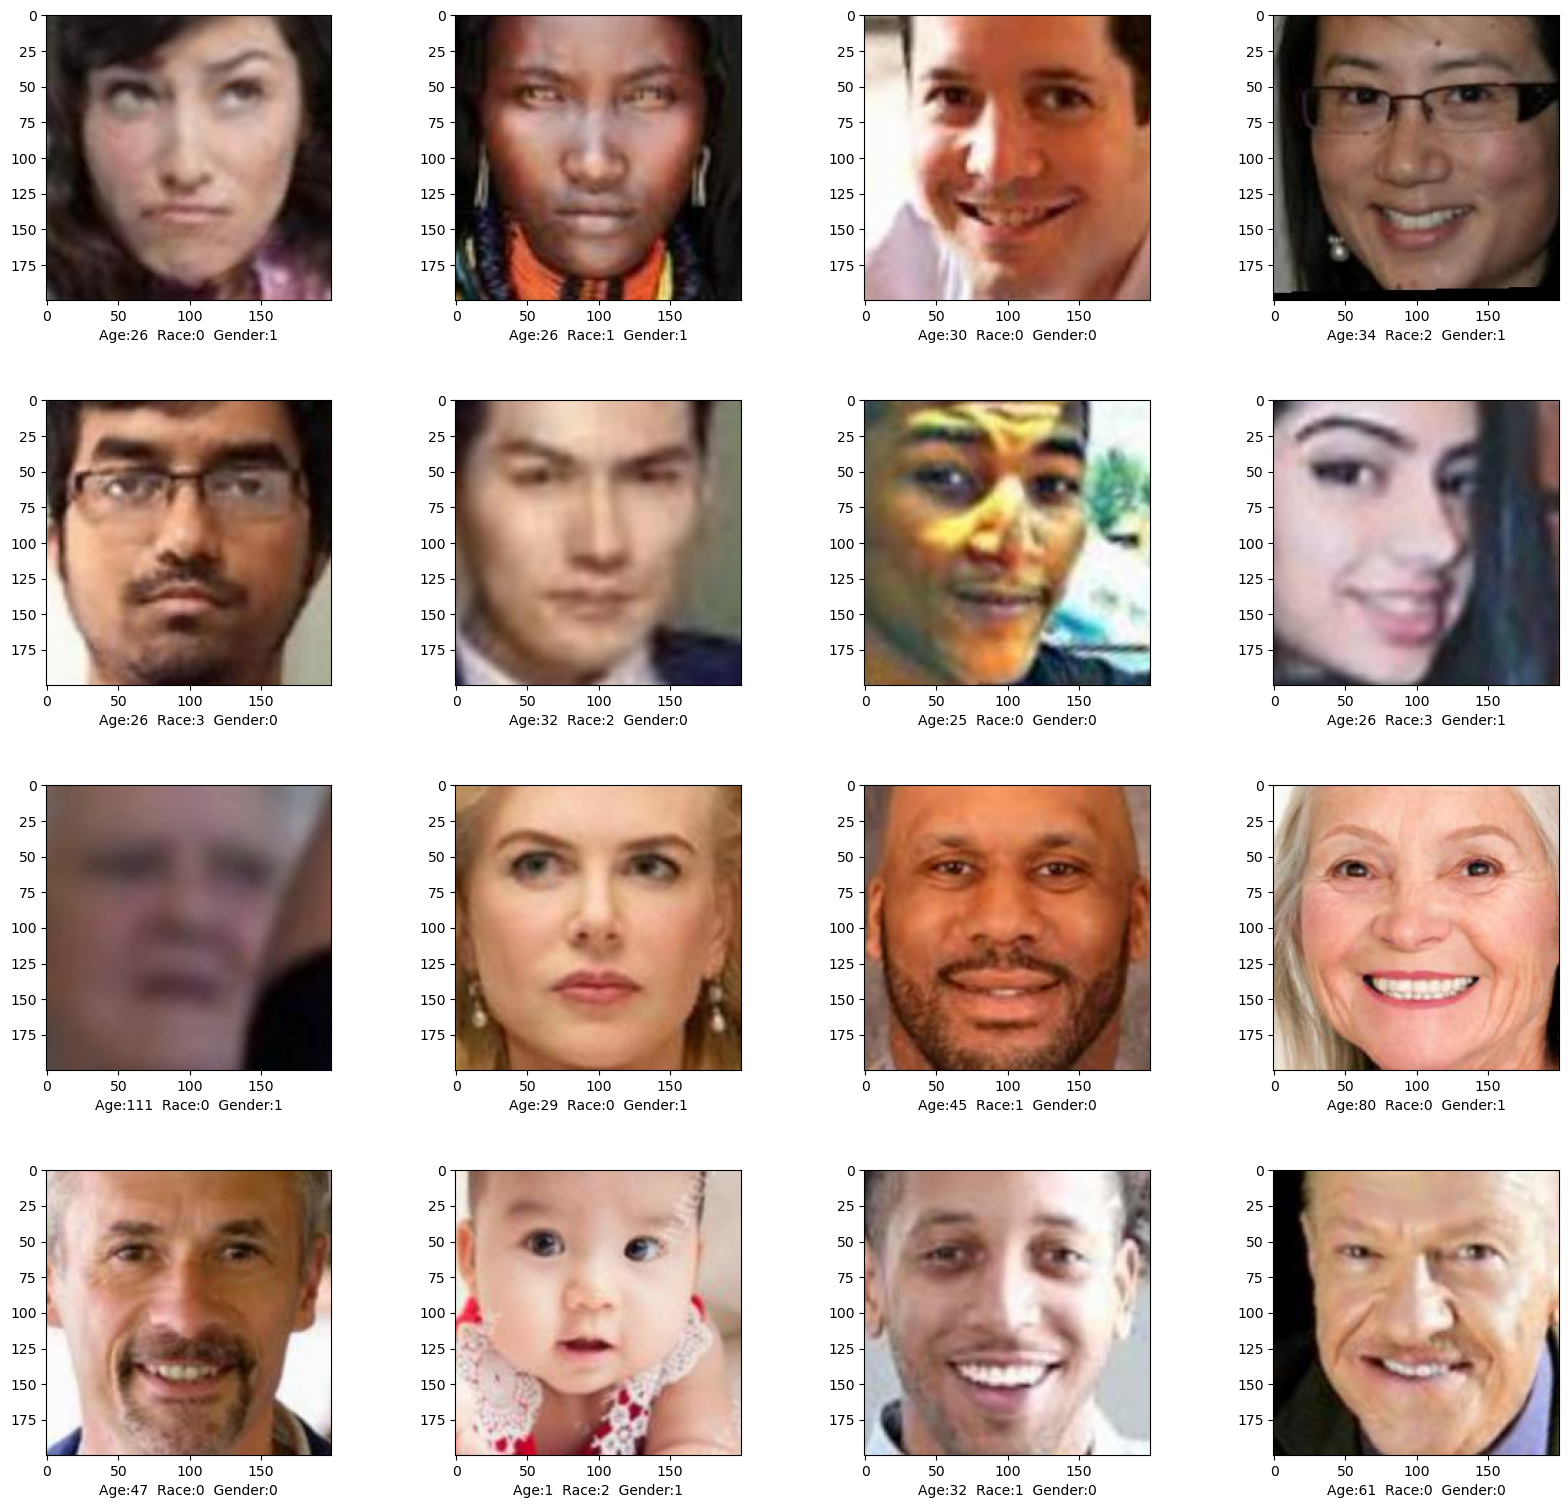

In [9]:
n_col = 4
n_row = 4
plt.figure(figsize=(16, 16))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
images_to_display = face_df.sample(16)
for i in range(n_row * n_col):
    image_to_display = images_to_display['FileName'].iloc[i]
    plt.subplot(n_row, n_col, i + 1)
    path = f'new_data/images/{image_to_display}'
    image = mpimg.imread(path)
    plt.imshow(image)
    plt.xlabel(
        "Age:"+str(images_to_display['age'].iloc[i])+
        "  Race:"+str(images_to_display['race'].iloc[i])+
        "  Gender:"+ str(images_to_display['gender'].iloc[i])
    )
    
plt.show()

<a id="7"></a> 
# 5. Basic EDA
[back to the top](#0) 

<a id="8"></a> 
## 5.1 Age
[back to the top](#0)

Most images are showing peaople in the age between 20 and 40 years with vast majority being between 25 and 30 years old.

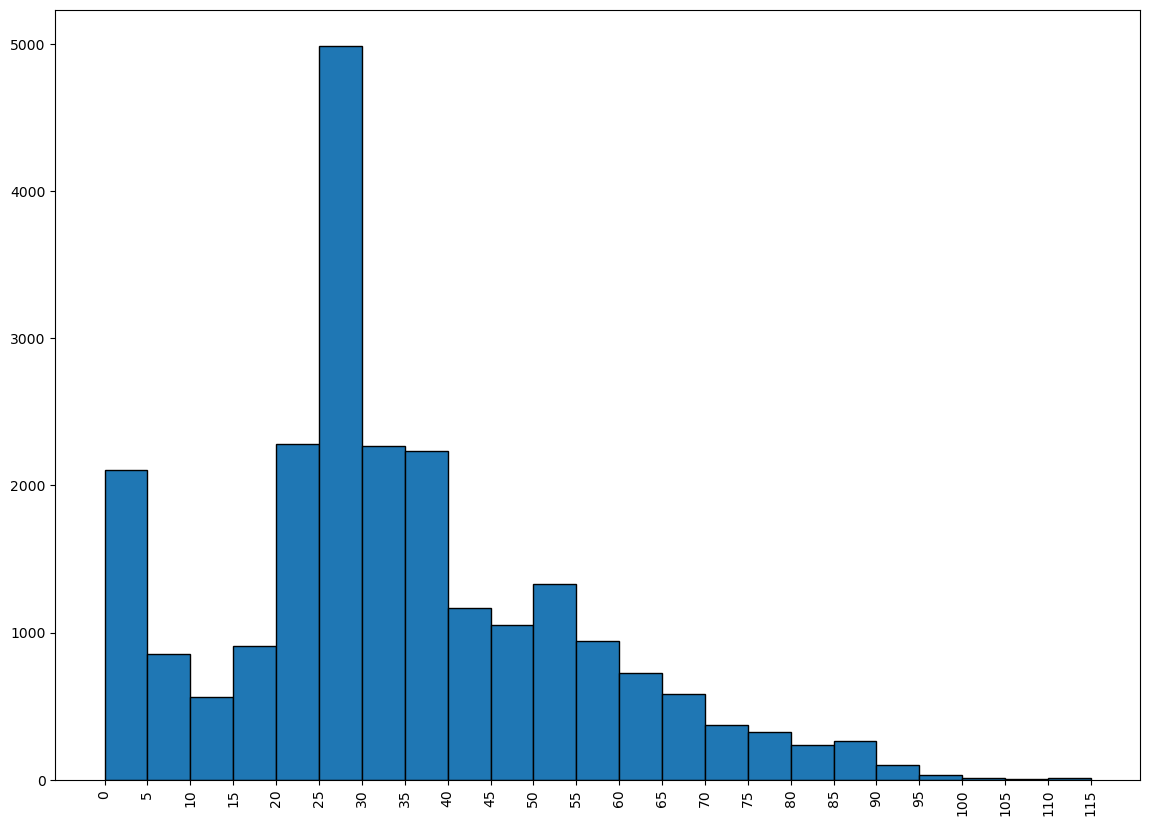

In [10]:
bins = range(0, 120, 5)
plt.figure(figsize=(14, 10))
plt.hist(face_df['age'], bins=bins, edgecolor='black')
plt.xticks(bins, rotation=90)
plt.show()

<a id="9"></a> 
## 5.2 Gender
[back to the top](#0)

There is close to 50/50 split between females and males.

<Axes: >

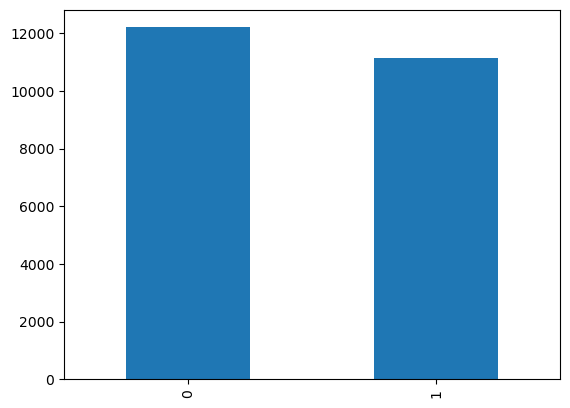

In [11]:
face_df['gender'].value_counts().plot(kind='bar')

<a id="10"></a> 
## 5.3 Race
[back to the top](#0)

Most images presents people of white race. The smallest group are Others.

<Axes: >

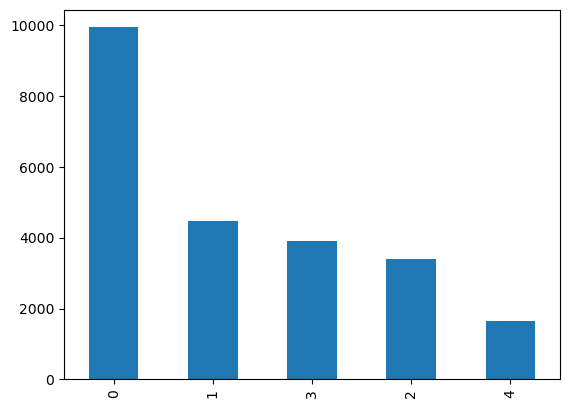

In [12]:
face_df['race'].value_counts().plot(kind='bar')

<a id="11"></a> 
# 6. Divide data into age groups
[back to the top](#0)

<a id="12"></a> 
### 6.1 Three age groups
[back to the top](#0)

Data was divided into 3 age groups: 
* 0: 0-17 years old 
* 1: 18-60 years old
* 2: above 60 years old

In [13]:
face_df['age_group_cat3'] = pd.cut(x=face_df['age'], 
                                   bins=[0, 17, 60, 120], 
                                   labels=[0, 1, 2], 
                                   include_lowest=True)

In [14]:
face_df.head()

FileName  age  gender  race age_group_cat3
0  100_0_0_20170112213500903.jpg.chip.jpg  100       0     0              2
1  100_0_0_20170112215240346.jpg.chip.jpg  100       0     0              2
2  100_1_0_20170110183726390.jpg.chip.jpg  100       1     0              2
3  100_1_0_20170112213001988.jpg.chip.jpg  100       1     0              2
4  100_1_0_20170112213303693.jpg.chip.jpg  100       1     0              2

<Axes: >

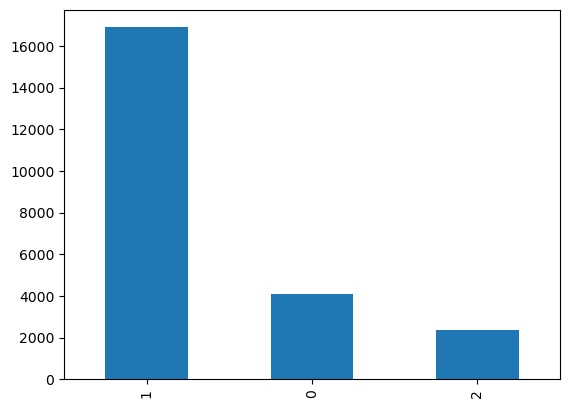

In [15]:
face_df['age_group_cat3'].value_counts().plot(kind='bar')

<a id="13"></a> 
### 6.2 Seven age groups
[back to the top](#0)

Data was divided into 7 age groups: 
* 0: 0-2 years old
* 1: 3-9 years old
* 2: 10-17 years old
* 3: 18-34 years old
* 4: 35-59 years old
* 5: 60-79 years old
* 6: 80 years old and above

In [16]:
face_df['age_group_cat7'] = pd.cut(x=face_df['age'], 
                                   bins=[0, 2, 9, 17, 34, 59, 79, 120], 
                                   labels=[0, 1, 2, 3, 4, 5, 6], 
                                   include_lowest=True)

In [17]:
face_df.head()

FileName  age  gender  race age_group_cat3  \
0  100_0_0_20170112213500903.jpg.chip.jpg  100       0     0              2   
1  100_0_0_20170112215240346.jpg.chip.jpg  100       0     0              2   
2  100_1_0_20170110183726390.jpg.chip.jpg  100       1     0              2   
3  100_1_0_20170112213001988.jpg.chip.jpg  100       1     0              2   
4  100_1_0_20170112213303693.jpg.chip.jpg  100       1     0              2   

  age_group_cat7  
0              6  
1              6  
2              6  
3              6  
4              6

<Axes: >

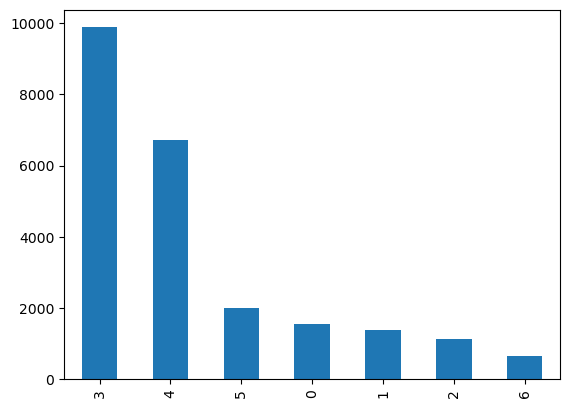

In [18]:
face_df['age_group_cat7'].value_counts().plot(kind='bar')

<a id="14"></a> 
### 6.3 Eight age groups
[back to the top](#0)

Data was divided into 8 age groups: 
* 0: 0-10 years old
* 1: 11-20 years old
* 2: 21-30 years old
* 3: 31-40 years old
* 4: 41-50 years old
* 5: 51-60 years old
* 6: 61-70 years old
* 7: 71 years old and above

In [19]:
face_df['age_group_cat8'] = pd.cut(x=face_df['age'], 
                                   bins=[0, 10, 20, 30, 40, 50, 60, 70, 120], 
                                   labels=[0, 1, 2, 3, 4, 5, 6, 7], 
                                   include_lowest=True)

In [20]:
face_df.head()

FileName  age  gender  race age_group_cat3  \
0  100_0_0_20170112213500903.jpg.chip.jpg  100       0     0              2   
1  100_0_0_20170112215240346.jpg.chip.jpg  100       0     0              2   
2  100_1_0_20170110183726390.jpg.chip.jpg  100       1     0              2   
3  100_1_0_20170112213001988.jpg.chip.jpg  100       1     0              2   
4  100_1_0_20170112213303693.jpg.chip.jpg  100       1     0              2   

  age_group_cat7 age_group_cat8  
0              6              7  
1              6              7  
2              6              7  
3              6              7  
4              6              7

<Axes: >

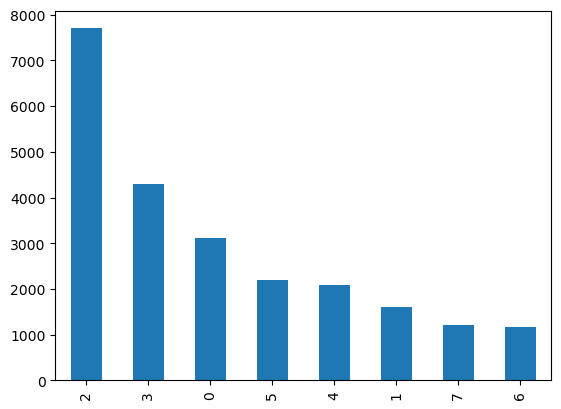

In [21]:
face_df['age_group_cat8'].value_counts().plot(kind='bar')

<a id="15"></a> 
## 7. Prepare data for training and testing using Keras ImageDataGenerator with flow_from_dataframe() method
[back to the top](#0)

All images are in one folder. To avoid manuallly creating train, test and validation folders I decided to use flow_from_dataframe() method from Keras ImageDataGenerator and split the data automatically to train and test data using train_test_split() method from Scikit-learn.

### Function to create data generators

In [22]:
def create_dataflow_from_dataframe(train_dataframe,
                                   test_dataframe,
                                   target_size, 
                                   preprocessing_function=None, 
                                   rescale=None, 
                                   validation_split=0.2,
                                   directory=None,
                                   x_col="x_col", 
                                   y_col="y_col",
                                   batch_size=64,
                                   seed=42,
                                   shuffle=True,
                                   class_mode="categorical"):
    
    train_datagen = ImageDataGenerator(preprocessing_function=preprocessing_function, 
                                     rescale=rescale,
                                     validation_split=validation_split)
    
    test_datagen = ImageDataGenerator(preprocessing_function=preprocessing_function, 
                                     rescale=rescale)
    
    train_generator = train_datagen.flow_from_dataframe(dataframe=train_dataframe, 
                                            directory=directory, 
                                            x_col=x_col, 
                                            y_col=y_col, 
                                            subset="training", 
                                            batch_size=batch_size, 
                                            seed=seed, 
                                            shuffle=shuffle, 
                                            class_mode=class_mode, 
                                            target_size=(h, w))
    
    valid_generator = train_datagen.flow_from_dataframe(dataframe=train_dataframe, 
                                            directory=directory, 
                                            x_col=x_col, 
                                            y_col=y_col, 
                                            subset="validation", 
                                            batch_size=batch_size, 
                                            seed=seed, 
                                            shuffle=shuffle, 
                                            class_mode=class_mode, 
                                            target_size=(h, w))
      
    test_generator = test_datagen.flow_from_dataframe(dataframe=test_dataframe, 
                                            directory=directory, 
                                            x_col=x_col, 
                                            y_col=y_col, 
                                            subset="training", 
                                            batch_size=batch_size, 
                                            seed=seed, 
                                            shuffle=shuffle, 
                                            class_mode=class_mode, 
                                            target_size=(h, w))
    
    return train_generator, valid_generator, test_generator

In [23]:
h, w = 200, 200
batch_size = 64

<a id="16"></a> 
### 7.1 Three age groups
[back to the top](#0)

#### Train and test data

In [24]:
X_age3 = face_df['FileName']
y_age3 = face_df['age_group_cat3']

In [25]:
# Divide into train and test data 
X_train_age3, X_test_age3, y_train_age3, y_test_age3 = train_test_split(X_age3, y_age3, test_size=0.2, stratify=y_age3)

In [26]:
# Create training dataframe from divided data
X_train_age3 = X_train_age3.reset_index(drop=True)
y_train_age3 = y_train_age3.reset_index(drop=True)
dict_train_age3 = {"x_col": X_train_age3, "y_col": y_train_age3}
df_train_age3 = pd.DataFrame(dict_train_age3)

In [27]:
# Create testing dataframe from divided data
X_test_age3 = X_test_age3.reset_index(drop=True)
y_test_age3 = y_test_age3.reset_index(drop=True)
dict_test_age3 = {"x_col": X_test_age3, "y_col": y_test_age3}
df_test_age3 = pd.DataFrame(dict_test_age3)

In [28]:
# Convert integer labels into string labels
df_train_age3['y_col'] = df_train_age3['y_col'].apply(lambda x: str(x))
df_test_age3['y_col'] = df_test_age3['y_col'].apply(lambda x: str(x))

In [29]:
df_train_age3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18680 entries, 0 to 18679
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   x_col   18680 non-null  object  
 1   y_col   18680 non-null  category
dtypes: category(1), object(1)
memory usage: 164.4+ KB


In [30]:
df_test_age3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4670 entries, 0 to 4669
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   x_col   4670 non-null   object  
 1   y_col   4670 non-null   category
dtypes: category(1), object(1)
memory usage: 41.3+ KB


#### Create train, validation and test dataflow

In [31]:
train_generator_age3, valid_generator_age3, test_generator_age3 = create_dataflow_from_dataframe(
                                    train_dataframe=df_train_age3,
                                    test_dataframe=df_test_age3,
                                    target_size=(h, w),
                                    rescale=1./255.,
                                    validation_split=0.2,
                                    directory="./new_data/images")

Found 14944 validated image filenames belonging to 3 classes.
Found 3736 validated image filenames belonging to 3 classes.
Found 4670 validated image filenames belonging to 3 classes.


<a id="17"></a> 
### 7.2 Seven age groups
[back to the top](#0)

In [31]:
X_age7 = face_df['FileName']
y_age7 = face_df['age_group_cat7']

In [32]:
# Divide into train and test data 
X_train_age7, X_test_age7, y_train_age7, y_test_age7 = train_test_split(X_age7, y_age7, test_size=0.2, stratify=y_age7)

In [33]:
# Create training dataframe from divided data
X_train_age7 = X_train_age7.reset_index(drop=True)
y_train_age7 = y_train_age7.reset_index(drop=True)
train_dict_age7 = {"x_col": X_train_age7, "y_col": y_train_age7}
df_train_age7 = pd.DataFrame(train_dict_age7)

In [34]:
# Create testing dataframe from divided data
X_test_age7 = X_test_age7.reset_index(drop=True)
y_test_age7 = y_test_age7.reset_index(drop=True)
test_dict_age7 = {"x_col": X_test_age7, "y_col": y_test_age7}
df_test_age7 = pd.DataFrame(test_dict_age7)

In [35]:
# Convert integer labels into string labels
df_train_age7['y_col'] = df_train_age7['y_col'].apply(lambda x: str(x))
df_test_age7['y_col'] = df_test_age7['y_col'].apply(lambda x: str(x))

In [36]:
df_train_age7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18680 entries, 0 to 18679
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   x_col   18680 non-null  object  
 1   y_col   18680 non-null  category
dtypes: category(1), object(1)
memory usage: 164.7+ KB


In [37]:
df_test_age7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4670 entries, 0 to 4669
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   x_col   4670 non-null   object  
 1   y_col   4670 non-null   category
dtypes: category(1), object(1)
memory usage: 41.5+ KB


#### Create train, validation and test dataflow

In [39]:
train_generator_age7, valid_generator_age7, test_generator_age7 = create_dataflow_from_dataframe(
                                    train_dataframe=df_train_age7,
                                    test_dataframe=df_test_age7,
                                    target_size=(h, w),
                                    rescale=1./255.,
                                    validation_split=0.2,
                                    directory="./new_data/images")

Found 14944 validated image filenames belonging to 7 classes.
Found 3736 validated image filenames belonging to 7 classes.
Found 4670 validated image filenames belonging to 7 classes.


<a id="18"></a> 
### 7.3 Eight age groups
[back to the top](#0)

In [38]:
X_age8 = face_df['FileName']
y_age8 = face_df['age_group_cat8']

In [39]:
# Divide into train and test data
X_train_age8, X_test_age8, y_train_age8, y_test_age8 = train_test_split(X_age8, y_age8, test_size=0.2, stratify=y_age8)

In [40]:
# Create training dataframe from divided data
X_train_age8 = X_train_age8.reset_index(drop=True)
y_train_age8 = y_train_age8.reset_index(drop=True)
train_dict_age8 = {"x_col": X_train_age8, "y_col": y_train_age8}
df_train_age8 = pd.DataFrame(train_dict_age8)

In [41]:
# Create testing dataframe from divided data
X_test_age8 = X_test_age8.reset_index(drop=True)
y_test_age8 = y_test_age8.reset_index(drop=True)
test_dict_age8 = {"x_col": X_test_age8, "y_col": y_test_age8}
df_test_age8 = pd.DataFrame(test_dict_age8)

In [42]:
# Convert integer labels into string labels
df_train_age8['y_col'] = df_train_age8['y_col'].apply(lambda x: str(x))
df_test_age8['y_col'] = df_test_age8['y_col'].apply(lambda x: str(x))

In [43]:
df_train_age8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18680 entries, 0 to 18679
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   x_col   18680 non-null  object  
 1   y_col   18680 non-null  category
dtypes: category(1), object(1)
memory usage: 164.7+ KB


In [44]:
df_test_age8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4670 entries, 0 to 4669
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   x_col   4670 non-null   object  
 1   y_col   4670 non-null   category
dtypes: category(1), object(1)
memory usage: 41.5+ KB


#### Create train, validation and test dataflow

In [47]:
train_generator_age8, valid_generator_age8, test_generator_age8 = create_dataflow_from_dataframe(
                                    train_dataframe=df_train_age8,
                                    test_dataframe=df_test_age8,
                                    target_size=(h, w),
                                    rescale=1./255.,
                                    validation_split=0.2,
                                    directory="./new_data/images")

Found 14944 validated image filenames belonging to 8 classes.
Found 3736 validated image filenames belonging to 8 classes.
Found 4670 validated image filenames belonging to 8 classes.


<a id="19"></a> 
### 7.4 Gender
[back to the top](#0)

In [45]:
X_gend = face_df['FileName']

In [46]:
y_gend = face_df['gender']

In [47]:
# Divide into train and test data
X_train_gend, X_test_gend, y_train_gend, y_test_gend = train_test_split(X_gend, y_gend, test_size=0.2, stratify=y_gend)

In [48]:
# Create training dataframe from divided data
X_train_gend = X_train_gend.reset_index(drop=True)
y_train_gend = y_train_gend.reset_index(drop=True)
train_dict_gend = {"x_col": X_train_gend, "y_col": y_train_gend}
df_train_gend = pd.DataFrame(train_dict_gend)

In [49]:
# Create testing dataframe from divided data
X_test_gend = X_test_gend.reset_index(drop=True)
y_test_gend = y_test_gend.reset_index(drop=True)
test_dict_gend = {"x_col": X_test_gend, "y_col": y_test_gend}
df_test_gend = pd.DataFrame(test_dict_gend)

In [50]:
# Convert integer labels into string labels
df_train_gend['y_col'] = df_train_gend['y_col'].apply(lambda x: str(x))
df_test_gend['y_col'] = df_test_gend['y_col'].apply(lambda x: str(x))

#### Create train, validation and test dataflow

In [54]:
train_generator_gend, valid_generator_gend, test_generator_gend = create_dataflow_from_dataframe(
                                    train_dataframe=df_train_gend,
                                    test_dataframe=df_test_gend,
                                    target_size=(h, w),
                                    rescale=1./255.,
                                    validation_split=0.2,
                                    class_mode="binary",
                                    directory="./new_data/images")

Found 14944 validated image filenames belonging to 2 classes.
Found 3736 validated image filenames belonging to 2 classes.
Found 4670 validated image filenames belonging to 2 classes.


<a id="20"></a> 
### 7.5 Race
[back to the top](#0)

In [51]:
X_race = face_df['FileName']

In [52]:
y_race = face_df['race']

In [53]:
# Divide into train and test data
X_train_race, X_test_race, y_train_race, y_test_race = train_test_split(X_race, y_race, test_size=0.2, stratify=y_race)

In [54]:
# Create training dataframe from divided data
X_train_race = X_train_race.reset_index(drop=True)
y_train_race = y_train_race.reset_index(drop=True)
train_dict_race = {"x_col": X_train_race, "y_col": y_train_race}
df_train_race = pd.DataFrame(train_dict_race)

In [55]:
# Create testing dataframe from divided data
X_test_race = X_test_race.reset_index(drop=True)
y_test_race = y_test_race.reset_index(drop=True)
test_dict_race = {"x_col": X_test_race, "y_col": y_test_race}
df_test_race = pd.DataFrame(test_dict_race)

In [56]:
# Convert integer labels into string labels
df_train_race['y_col'] = df_train_race['y_col'].apply(lambda x: str(x))
df_test_race['y_col'] = df_test_race['y_col'].apply(lambda x: str(x))

#### Create train, validation and test dataflow

In [61]:
train_generator_race, valid_generator_race, test_generator_race = create_dataflow_from_dataframe(
                                    train_dataframe=df_train_race,
                                    test_dataframe=df_test_race,
                                    target_size=(h, w),
                                    rescale=1./255.,
                                    validation_split=0.2, 
                                    directory="./new_data/images")

Found 14944 validated image filenames belonging to 5 classes.
Found 3736 validated image filenames belonging to 5 classes.
Found 4670 validated image filenames belonging to 5 classes.


<a id="21"></a> 
# 8. Build, train and test prediction models based on CNN
[back to the top](#0)

<a id="22"></a> 
## 8.1 Create methods for model's building, training and testing 
[back to the top](#0)

In [57]:
# method that build and compile new CNN model based on the parameters supplied
def create_model(input_shape, no_of_classes, 
                 optimizer=Adam, 
                 conv_filters=[(32, 3), (16, 3)], 
                 pooling=(), 
                 dense_layer_sizes=(32,), 
                 dropout_rate=0, 
                 batch_normalization=False,
                 conv_kernel_regularizer=None,
                 dense_kernel_regularizer=None,
                 activation_fun="relu", 
                 output_fun='softmax', 
                 learning_rate=0.001, 
                 loss="categorical_crossentropy", 
                 metrics=["categorical_accuracy"]):
      
    model = Sequential()
    #adding first convolution layer
    model.add(Conv2D(filters=conv_filters[0][0], 
                     kernel_size=conv_filters[0][1], 
                     activation=activation_fun, 
                     input_shape=input_shape))
    
    #adding MaxPool after first layer (if applicable)
    if len(pooling) > 0:
        model.add(MaxPool2D(pooling))
        
    #adding Dropout after first layer (if applicable)    
    if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
            
    #adding remaining convolution layers and MaxPool in A loop, 
    #conv_filters is list of tuples with parameters for each conv layer [(filters ,kernel_size)] 
    #pooling is list of tuples with paramaters of MaxPool for each layer 
    for f in range(1, len(conv_filters)):
        model.add(Conv2D(filters=conv_filters[f][0], kernel_size=conv_filters[f][1], 
                         kernel_regularizer=conv_kernel_regularizer, activation=activation_fun))
        if len(pooling) > 0:
            model.add(MaxPool2D(pooling))
        #adding Dropout after each layer (if applicable)    
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
        if batch_normalization:
            model.add(BatchNormalization())
            
    #flattening            
    model.add(Flatten())
    
    #adding Dense layer in the loop (layer_sizes is tupple with number of neurons in each layer)
    for s in range(len(dense_layer_sizes)):
        model.add(Dense(dense_layer_sizes[s], kernel_regularizer=dense_kernel_regularizer, activation=activation_fun))   
        
    #adding last Dense layer
    model.add(Dense(no_of_classes, activation=output_fun)) 
    
    print(model.summary())
    
    #model compiling
    model.compile(loss=loss, 
                  optimizer=optimizer(learning_rate = learning_rate), 
                  metrics=metrics) 
    
    return model

In [58]:
# method that trains the model with optional early stopping
def train_model(train_data, validation_data, model, es_patience=0, epochs=10, verbose='auto'):
    if es_patience>0:
        early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=es_patience, 
                               restore_best_weights=True)
    else:
        early_stopping = []
    
    history = model.fit(train_data,
                          validation_data=validation_data,
                          callbacks=[early_stopping],
                          epochs=epochs,
                          verbose=verbose)
    return history

In [59]:
# method that test the model and return accuracy score
def test_model(model, test_data):    
    score = model.evaluate(test_data)
    return score

In [60]:
# method that plots training history
def plot_history(history):
    
    fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(6, 4))
    fig.tight_layout(h_pad=4)
    ax0.plot(history.history[list(history.history.keys())[1]])
    ax0.plot(history.history[list(history.history.keys())[3]])
    ax1.plot(history.history[list(history.history.keys())[0]])
    ax1.plot(history.history[list(history.history.keys())[2]])
    ax0.set_title('model accuracy')
    ax0.set_ylabel('accuracy')
    ax0.set_xlabel('epoch')
    ax0.legend(['train', 'val'], loc='upper left')
    ax1.set_title('model loss')
    ax1.set_ylabel('loss')
    ax1.set_xlabel('epoch')
    ax1.legend(['train', 'val'], loc='lower left')
    plt.show()

In [61]:
n_classes_age3 = 3
n_classes_age7 = 7
n_classes_age8 = 8
n_classes_race = 5

<a id="23"></a> 
## 8.2 Build, train and test first sample models
[back to the top](#0)

<a id="24"></a>
### 8.2.1 Three age groups
[back to the top](#0)

#### Three age groups - model1

In [68]:
model1_age3 = create_model(conv_filters=[(32, 3), (16, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(24,),
                    dropout_rate=0,
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age3)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 24)                8

In [90]:
history1_age3 = train_model(train_generator_age3, valid_generator_age3, model1_age3, epochs=10, es_patience=5)

Epoch 1/10
234/234 [==============================] - 168s 714ms/step - loss: 0.6025 - categorical_accuracy: 0.7838 - val_loss: 0.4346 - val_categorical_accuracy: 0.8482
Epoch 2/10
234/234 [==============================] - 165s 706ms/step - loss: 0.3780 - categorical_accuracy: 0.8607 - val_loss: 0.3892 - val_categorical_accuracy: 0.8528
Epoch 3/10
234/234 [==============================] - 165s 704ms/step - loss: 0.3239 - categorical_accuracy: 0.8811 - val_loss: 0.3805 - val_categorical_accuracy: 0.8544
Epoch 4/10
234/234 [==============================] - 165s 706ms/step - loss: 0.2768 - categorical_accuracy: 0.9004 - val_loss: 0.3553 - val_categorical_accuracy: 0.8830
Epoch 5/10
234/234 [==============================] - 165s 706ms/step - loss: 0.2512 - categorical_accuracy: 0.9082 - val_loss: 0.3647 - val_categorical_accuracy: 0.8828
Epoch 6/10
234/234 [==============================] - 165s 707ms/step - loss: 0.2278 - categorical_accuracy: 0.9151 - val_loss: 0.3511 - val_categoric

In [91]:
model1_age3.save("model1_age3.h5")

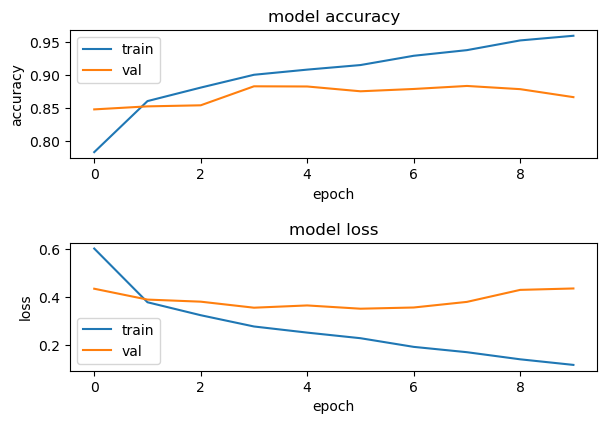

In [146]:
plot_history(history1_age3)

In [147]:
print("Accuracy: ", test_model(model1_age3, test_generator_age3)[1])

73/73 [==============================] - 16s 209ms/step - loss: 0.4483 - categorical_accuracy: 0.8767
Accuracy:  0.8766595125198364


***************************************************************************************************************************

#### Three age groups - model 2

In [71]:
model2_age3 = create_model(conv_filters=[(64, 3), (32, 3), (16, 3)], 
                            pooling=(2, 2), 
                            dense_layer_sizes=(24,),
                            input_shape=(h, w, 3), 
                            no_of_classes=n_classes_age3)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 99, 99, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 97, 97, 32)        18464     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 46, 46, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 16)      

In [72]:
history2_age3 = train_model(train_generator_age3, valid_generator_age3, model2_age3, epochs=10, es_patience=5)

Epoch 1/10
234/234 [==============================] - 692s 3s/step - loss: 0.5177 - categorical_accuracy: 0.8085 - val_loss: 0.3946 - val_categorical_accuracy: 0.8624
Epoch 2/10
234/234 [==============================] - 763s 3s/step - loss: 0.3628 - categorical_accuracy: 0.8684 - val_loss: 0.3877 - val_categorical_accuracy: 0.8581
Epoch 3/10
234/234 [==============================] - 754s 3s/step - loss: 0.3094 - categorical_accuracy: 0.8892 - val_loss: 0.3143 - val_categorical_accuracy: 0.8822
Epoch 4/10
234/234 [==============================] - 768s 3s/step - loss: 0.2826 - categorical_accuracy: 0.8962 - val_loss: 0.2841 - val_categorical_accuracy: 0.8932
Epoch 5/10
234/234 [==============================] - 733s 3s/step - loss: 0.2522 - categorical_accuracy: 0.9065 - val_loss: 0.2897 - val_categorical_accuracy: 0.8953
Epoch 6/10
234/234 [==============================] - 689s 3s/step - loss: 0.2281 - categorical_accuracy: 0.9154 - val_loss: 0.2816 - val_categorical_accuracy: 0.898

In [73]:
model2_age3.save("model2_age3.h5")

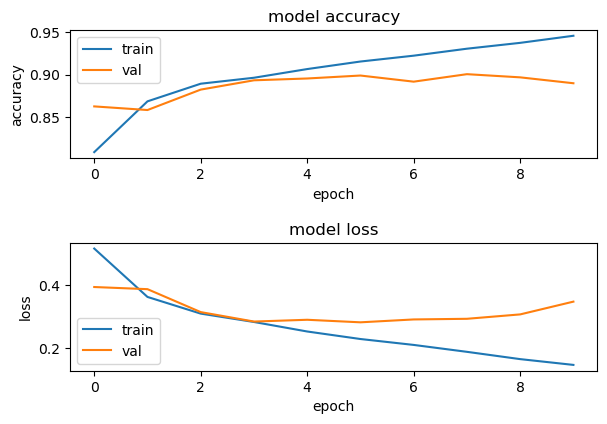

In [74]:
plot_history(history2_age3)

In [76]:
print("Accuracy: ", test_model(model2_age3, test_generator_age3)[1])

73/73 [==============================] - 41s 557ms/step - loss: 0.3595 - categorical_accuracy: 0.8869
Accuracy:  0.8869379162788391


***************************************************************************************************************************

#### Three age groups - model 3

In [79]:
model3_age3 = create_model(conv_filters=[(32, 3), (64, 3), (128, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(24,),
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age3)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 23, 23, 128)     

In [80]:
history3_age3 = train_model(train_generator_age3, valid_generator_age3, model3_age3, epochs=10, es_patience=5)

Epoch 1/10
234/234 [==============================] - 413s 2s/step - loss: 0.4985 - categorical_accuracy: 0.8226 - val_loss: 0.3716 - val_categorical_accuracy: 0.8579
Epoch 2/10
234/234 [==============================] - 391s 2s/step - loss: 0.3380 - categorical_accuracy: 0.8779 - val_loss: 0.3393 - val_categorical_accuracy: 0.8785
Epoch 3/10
234/234 [==============================] - 377s 2s/step - loss: 0.2810 - categorical_accuracy: 0.8976 - val_loss: 0.2905 - val_categorical_accuracy: 0.8932
Epoch 4/10
234/234 [==============================] - 365s 2s/step - loss: 0.2442 - categorical_accuracy: 0.9101 - val_loss: 0.2770 - val_categorical_accuracy: 0.8959
Epoch 5/10
234/234 [==============================] - 380s 2s/step - loss: 0.2079 - categorical_accuracy: 0.9222 - val_loss: 0.2795 - val_categorical_accuracy: 0.9066
Epoch 6/10
234/234 [==============================] - 374s 2s/step - loss: 0.1742 - categorical_accuracy: 0.9363 - val_loss: 0.2780 - val_categorical_accuracy: 0.907

In [81]:
model3_age3.save("model3_age3.h5")

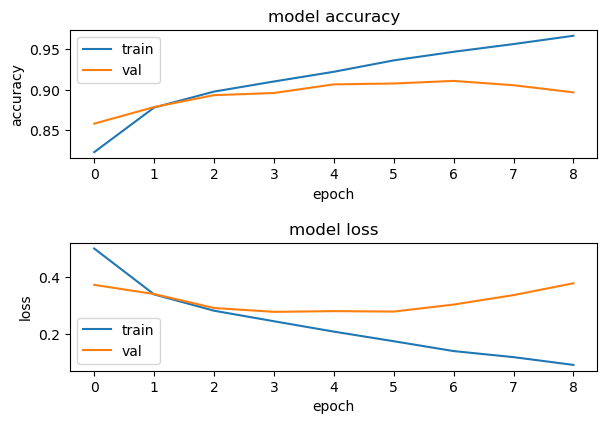

In [82]:
plot_history(history3_age3)

In [83]:
print("Accuracy: ", test_model(model3_age3, test_generator_age3)[1])

73/73 [==============================] - 38s 513ms/step - loss: 0.2943 - categorical_accuracy: 0.8910
Accuracy:  0.8910064101219177


***************************************************************************************************************************

#### Three age groups - model 4

In [67]:
model4_age3 = create_model(conv_filters=[(32, 3), (64, 3), (128, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(24,),
                    dropout_rate=0.25,
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age3)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 64)        0

In [68]:
history4_age3 = train_model(train_generator_age3, valid_generator_age3, model4_age3, epochs=10, es_patience=5)

Epoch 1/10
234/234 [==============================] - 471s 2s/step - loss: 0.6836 - categorical_accuracy: 0.7343 - val_loss: 0.6051 - val_categorical_accuracy: 0.7936
Epoch 2/10
234/234 [==============================] - 459s 2s/step - loss: 0.4561 - categorical_accuracy: 0.8368 - val_loss: 0.4615 - val_categorical_accuracy: 0.8314
Epoch 3/10
234/234 [==============================] - 461s 2s/step - loss: 0.3848 - categorical_accuracy: 0.8603 - val_loss: 0.3548 - val_categorical_accuracy: 0.8755
Epoch 4/10
234/234 [==============================] - 458s 2s/step - loss: 0.3401 - categorical_accuracy: 0.8739 - val_loss: 0.3312 - val_categorical_accuracy: 0.8782
Epoch 5/10
234/234 [==============================] - 458s 2s/step - loss: 0.3100 - categorical_accuracy: 0.8869 - val_loss: 0.3038 - val_categorical_accuracy: 0.8905
Epoch 6/10
234/234 [==============================] - 457s 2s/step - loss: 0.2826 - categorical_accuracy: 0.8946 - val_loss: 0.2918 - val_categorical_accuracy: 0.894

In [69]:
model4_age3.save("model4_age3.h5")

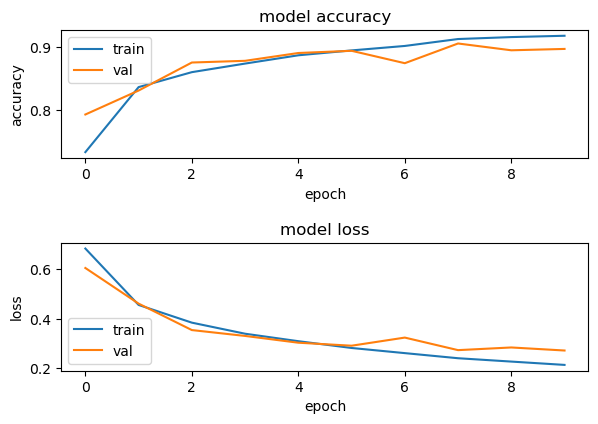

In [70]:
plot_history(history4_age3)

In [71]:
print("Accuracy: ", test_model(model4_age3, test_generator_age3)[1])

73/73 [==============================] - 39s 538ms/step - loss: 0.2742 - categorical_accuracy: 0.9006
Accuracy:  0.9006423950195312


***************************************************************************************************************************

#### Three age groups - model 5

In [72]:
model5_age3 = create_model(conv_filters=[(64, 3), (32, 3), (16, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(24,),
                    dropout_rate=0.25,
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age3)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 99, 99, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 48, 48, 32)       

In [73]:
history5_age3 = train_model(train_generator_age3, valid_generator_age3, model5_age3, epochs=10, es_patience=5)

Epoch 1/10
234/234 [==============================] - 531s 2s/step - loss: 0.6641 - categorical_accuracy: 0.7566 - val_loss: 0.5436 - val_categorical_accuracy: 0.8102
Epoch 2/10
234/234 [==============================] - 532s 2s/step - loss: 0.4789 - categorical_accuracy: 0.8213 - val_loss: 0.4629 - val_categorical_accuracy: 0.8456
Epoch 3/10
234/234 [==============================] - 532s 2s/step - loss: 0.4142 - categorical_accuracy: 0.8477 - val_loss: 0.4306 - val_categorical_accuracy: 0.8490
Epoch 4/10
234/234 [==============================] - 532s 2s/step - loss: 0.3745 - categorical_accuracy: 0.8636 - val_loss: 0.3649 - val_categorical_accuracy: 0.8699
Epoch 5/10
234/234 [==============================] - 533s 2s/step - loss: 0.3476 - categorical_accuracy: 0.8711 - val_loss: 0.3382 - val_categorical_accuracy: 0.8726
Epoch 6/10
234/234 [==============================] - 531s 2s/step - loss: 0.3257 - categorical_accuracy: 0.8811 - val_loss: 0.3347 - val_categorical_accuracy: 0.883

In [74]:
model5_age3.save("model5_age3.h5")

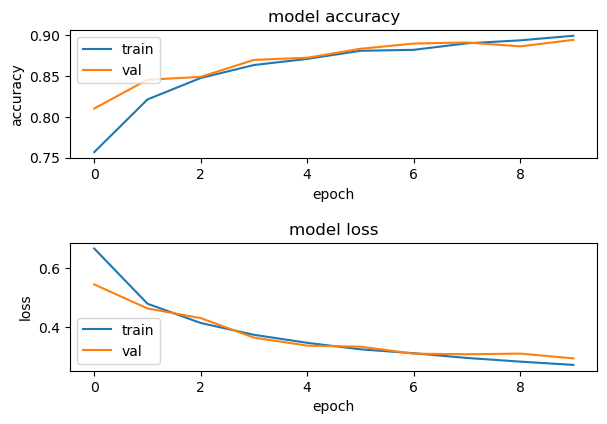

In [75]:
plot_history(history5_age3)

In [76]:
print("Accuracy: ", test_model(model5_age3, test_generator_age3)[1])

73/73 [==============================] - 34s 464ms/step - loss: 0.2899 - categorical_accuracy: 0.8972
Accuracy:  0.897216260433197


***************************************************************************************************************************

### Results - Three age groups

In [8]:
results_df = pd.read_excel('results.xlsx')

In [11]:
results_df[(results_df['category'] == 'age3') & (results_df['model'].str.startswith('model'))].sort_values('Accuracy', ascending=False)

model category               conv_layers Dropout BatchNormalization  \
3  model4_age3     age3  (32, 3) (64, 3) (128, 3)    0.25               None   
4  model5_age3     age3   (64, 3) (32, 3) (16, 3)    0.25               None   
2  model3_age3     age3  (32, 3) (64, 3) (128, 3)       0               None   
1  model2_age3     age3   (64, 3) (32, 3) (16, 3)       0               None   
0  model1_age3     age3           (32, 3) (16, 3)       0               None   

  Dense layers sizes Dense kernel reg  Accuracy Remarks  
3             (24, )             None    0.9006     NaN  
4             (24, )             None    0.8972     NaN  
2             (24, )             None    0.8910     NaN  
1             (24, )             None    0.8869     NaN  
0             (24, )             None    0.8766     NaN

***************************************************************************************************************************

<a id="25"></a>
### 8.2.2 Seven age groups
[back to the top](#0)

#### Seven age groups - model 1

In [78]:
model1_age7 = create_model(conv_filters=[(32, 3), (64, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(24,),
                    dropout_rate=0,
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age7)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 147456)            0         
                                                                 
 dense_6 (Dense)             (None, 24)               

In [79]:
history1_age7 = train_model(train_generator_age7, valid_generator_age7, model1_age7, epochs=15, es_patience=5)

Epoch 1/15
234/234 [==============================] - 281s 1s/step - loss: 1.6022 - categorical_accuracy: 0.4507 - val_loss: 1.1777 - val_categorical_accuracy: 0.5412
Epoch 2/15
234/234 [==============================] - 274s 1s/step - loss: 1.0837 - categorical_accuracy: 0.5753 - val_loss: 1.0060 - val_categorical_accuracy: 0.6022
Epoch 3/15
234/234 [==============================] - 274s 1s/step - loss: 0.9391 - categorical_accuracy: 0.6195 - val_loss: 0.9360 - val_categorical_accuracy: 0.6164
Epoch 4/15
234/234 [==============================] - 276s 1s/step - loss: 0.8419 - categorical_accuracy: 0.6562 - val_loss: 0.9262 - val_categorical_accuracy: 0.6159
Epoch 5/15
234/234 [==============================] - 277s 1s/step - loss: 0.7564 - categorical_accuracy: 0.6852 - val_loss: 0.9532 - val_categorical_accuracy: 0.6239
Epoch 6/15
234/234 [==============================] - 275s 1s/step - loss: 0.6874 - categorical_accuracy: 0.7136 - val_loss: 0.8942 - val_categorical_accuracy: 0.645

In [80]:
model1_age7.save("model1_age7.h5")

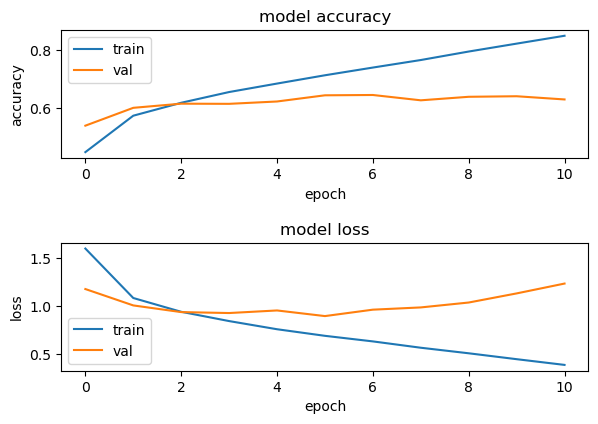

In [81]:
plot_history(history1_age7)

In [82]:
print("Accuracy: ", test_model(model1_age7, test_generator_age7)[1])

73/73 [==============================] - 25s 336ms/step - loss: 0.8632 - categorical_accuracy: 0.6456
Accuracy:  0.6456102728843689


***************************************************************************************************************************

#### Seven age groups - model 2

In [83]:
model2_age7 = create_model(conv_filters=[(32, 3), (64, 3), (128, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(24,),
                    dropout_rate=0,
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age7)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 23, 23, 128)     

In [84]:
history2_age7 = train_model(train_generator_age7, valid_generator_age7, model2_age7, epochs=15, es_patience=5)

Epoch 1/15
234/234 [==============================] - 405s 2s/step - loss: 1.3406 - categorical_accuracy: 0.4995 - val_loss: 1.1336 - val_categorical_accuracy: 0.5728
Epoch 2/15
234/234 [==============================] - 415s 2s/step - loss: 1.0507 - categorical_accuracy: 0.5966 - val_loss: 0.9962 - val_categorical_accuracy: 0.6047
Epoch 3/15
234/234 [==============================] - 405s 2s/step - loss: 0.9188 - categorical_accuracy: 0.6362 - val_loss: 0.9046 - val_categorical_accuracy: 0.6263
Epoch 4/15
234/234 [==============================] - 405s 2s/step - loss: 0.8301 - categorical_accuracy: 0.6613 - val_loss: 0.8595 - val_categorical_accuracy: 0.6306
Epoch 5/15
234/234 [==============================] - 408s 2s/step - loss: 0.7617 - categorical_accuracy: 0.6857 - val_loss: 0.8297 - val_categorical_accuracy: 0.6569
Epoch 6/15
234/234 [==============================] - 404s 2s/step - loss: 0.7086 - categorical_accuracy: 0.7014 - val_loss: 0.8279 - val_categorical_accuracy: 0.649

In [85]:
model2_age7.save("model2_age7.h5")

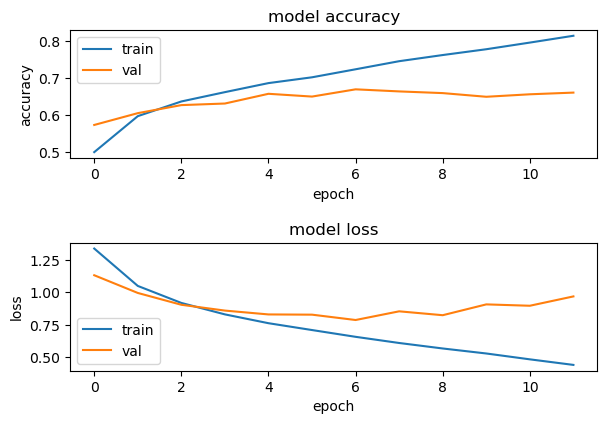

In [86]:
plot_history(history2_age7)

In [87]:
print("Accuracy: ", test_model(model2_age7, test_generator_age7)[1])

73/73 [==============================] - 39s 535ms/step - loss: 0.7766 - categorical_accuracy: 0.6773
Accuracy:  0.6773019433021545


***************************************************************************************************************************

#### Seven age groups - model 3

In [88]:
model3_age7 = create_model(conv_filters=[(64, 3), (32, 3), (16, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(24,),
                    dropout_rate=0,
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age7)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 99, 99, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 97, 97, 32)        18464     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 46, 46, 16)        4624      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 23, 23, 16)      

In [89]:
history3_age7 = train_model(train_generator_age7, valid_generator_age7, model3_age7, epochs=15, es_patience=5)

Epoch 1/15
234/234 [==============================] - 462s 2s/step - loss: 1.3105 - categorical_accuracy: 0.5125 - val_loss: 1.0580 - val_categorical_accuracy: 0.5953
Epoch 2/15
234/234 [==============================] - 459s 2s/step - loss: 0.9927 - categorical_accuracy: 0.6105 - val_loss: 0.9217 - val_categorical_accuracy: 0.6312
Epoch 3/15
234/234 [==============================] - 459s 2s/step - loss: 0.8535 - categorical_accuracy: 0.6584 - val_loss: 0.8649 - val_categorical_accuracy: 0.6413
Epoch 4/15
234/234 [==============================] - 460s 2s/step - loss: 0.7639 - categorical_accuracy: 0.6924 - val_loss: 0.8396 - val_categorical_accuracy: 0.6627
Epoch 5/15
234/234 [==============================] - 459s 2s/step - loss: 0.7034 - categorical_accuracy: 0.7156 - val_loss: 0.8589 - val_categorical_accuracy: 0.6552
Epoch 6/15
234/234 [==============================] - 463s 2s/step - loss: 0.6352 - categorical_accuracy: 0.7425 - val_loss: 0.8074 - val_categorical_accuracy: 0.668

In [90]:
model3_age7.save("model3_age7.h5")

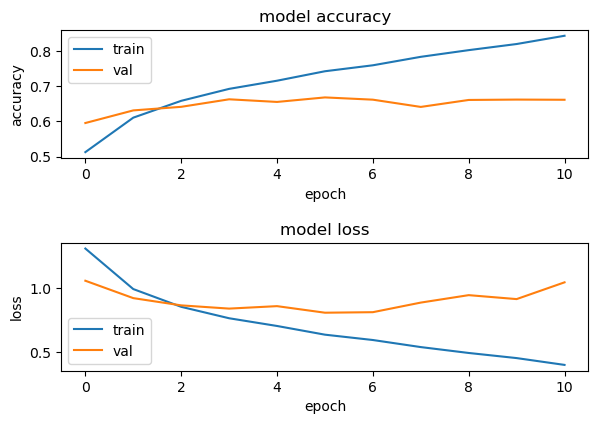

In [91]:
plot_history(history3_age7)

In [92]:
print("Accuracy: ", test_model(model3_age7, test_generator_age7)[1])

73/73 [==============================] - 35s 477ms/step - loss: 0.7939 - categorical_accuracy: 0.6792
Accuracy:  0.6792291402816772


***************************************************************************************************************************

#### Seven age groups - model 4

In [67]:
model4_age7 = create_model(conv_filters=[(32, 3), (64, 3), (128, 3)], 
                            pooling=(2, 2), 
                            dense_layer_sizes=(24,),
                            dropout_rate=0.25,
                            input_shape=(h, w, 3), 
                            no_of_classes=n_classes_age7)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 64)        0

In [68]:
history4_age7 = train_model(train_generator_age7, valid_generator_age7, model4_age7, epochs=15, es_patience=5)

Epoch 1/15
234/234 [==============================] - 529s 2s/step - loss: 1.4866 - categorical_accuracy: 0.4661 - val_loss: 1.2500 - val_categorical_accuracy: 0.5543
Epoch 2/15
234/234 [==============================] - 701s 3s/step - loss: 1.1437 - categorical_accuracy: 0.5579 - val_loss: 1.0909 - val_categorical_accuracy: 0.5851
Epoch 3/15
234/234 [==============================] - 603s 3s/step - loss: 1.0101 - categorical_accuracy: 0.5952 - val_loss: 1.0105 - val_categorical_accuracy: 0.6049
Epoch 4/15
234/234 [==============================] - 438s 2s/step - loss: 0.9039 - categorical_accuracy: 0.6340 - val_loss: 0.9338 - val_categorical_accuracy: 0.6445
Epoch 5/15
234/234 [==============================] - 429s 2s/step - loss: 0.8210 - categorical_accuracy: 0.6627 - val_loss: 0.8478 - val_categorical_accuracy: 0.6689
Epoch 6/15
234/234 [==============================] - 416s 2s/step - loss: 0.7691 - categorical_accuracy: 0.6802 - val_loss: 0.8198 - val_categorical_accuracy: 0.666

In [69]:
model4_age7.save("model4_age7.h5")

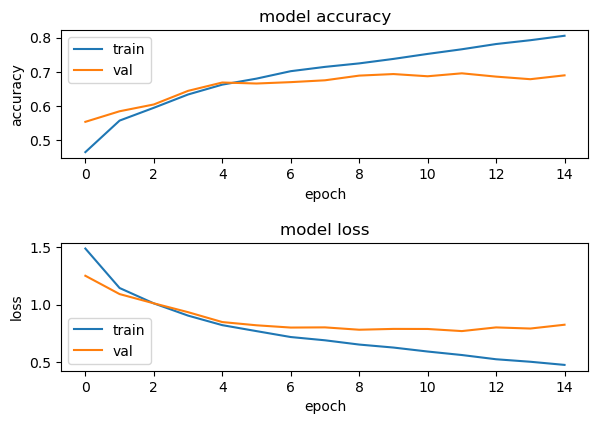

In [70]:
plot_history(history4_age7)

In [71]:
print("Accuracy: ", test_model(model4_age7, test_generator_age7)[1])

73/73 [==============================] - 38s 524ms/step - loss: 0.8316 - categorical_accuracy: 0.6846
Accuracy:  0.6845824122428894


***************************************************************************************************************************

#### Seven age groups - model 5

In [72]:
model5_age7 = create_model(conv_filters=[(64, 3), (32, 3), (16, 3)], 
                            pooling=(2, 2), 
                            dense_layer_sizes=(24,),
                            dropout_rate=0.25,
                            input_shape=(h, w, 3), 
                            no_of_classes=n_classes_age7)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 99, 99, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 48, 48, 32)       

In [73]:
history5_age7 = train_model(train_generator_age7, valid_generator_age7, model5_age7, epochs=15, es_patience=5)

Epoch 1/15
234/234 [==============================] - 551s 2s/step - loss: 1.4337 - categorical_accuracy: 0.4537 - val_loss: 1.2688 - val_categorical_accuracy: 0.5238
Epoch 2/15
234/234 [==============================] - 557s 2s/step - loss: 1.1503 - categorical_accuracy: 0.5510 - val_loss: 1.1347 - val_categorical_accuracy: 0.5699
Epoch 3/15
234/234 [==============================] - 555s 2s/step - loss: 1.0084 - categorical_accuracy: 0.5990 - val_loss: 1.0766 - val_categorical_accuracy: 0.5854
Epoch 4/15
234/234 [==============================] - 555s 2s/step - loss: 0.9122 - categorical_accuracy: 0.6275 - val_loss: 0.9440 - val_categorical_accuracy: 0.6408
Epoch 5/15
234/234 [==============================] - 570s 2s/step - loss: 0.8521 - categorical_accuracy: 0.6534 - val_loss: 0.8882 - val_categorical_accuracy: 0.6536
Epoch 6/15
234/234 [==============================] - 576s 2s/step - loss: 0.8033 - categorical_accuracy: 0.6677 - val_loss: 0.8681 - val_categorical_accuracy: 0.666

In [74]:
model5_age7.save("model5_age7.h5")

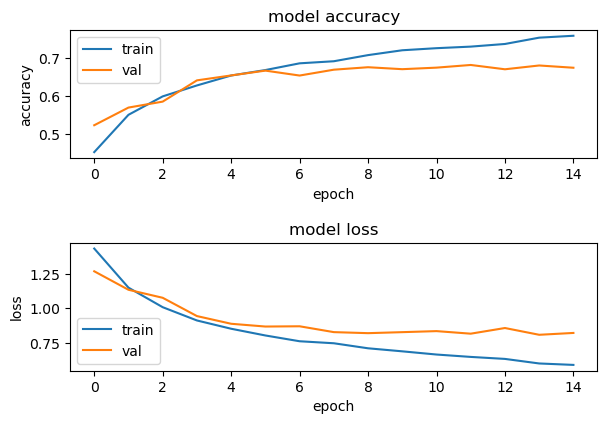

In [75]:
plot_history(history5_age7)

In [76]:
print("Accuracy: ", test_model(model5_age7, test_generator_age7)[1])

73/73 [==============================] - 33s 454ms/step - loss: 0.8023 - categorical_accuracy: 0.6726
Accuracy:  0.6725910305976868


***************************************************************************************************************************

### Results - Seven age groups

In [12]:
results_df[(results_df['category'] == 'age7') & (results_df['model'].str.startswith('model'))].sort_values('Accuracy', ascending=False)

model category               conv_layers Dropout BatchNormalization  \
8  model4_age7     age7  (32, 3) (64, 3) (128, 3)    0.25               None   
7  model3_age7     age7   (64, 3) (32, 3) (16, 3)       0               None   
6  model2_age7     age7  (32, 3) (64, 3) (128, 3)       0               None   
9  model5_age7     age7   (64, 3) (32, 3) (16, 3)    0.25               None   
5  model1_age7     age7           (32, 3) (64, 3)       0               None   

  Dense layers sizes Dense kernel reg  Accuracy Remarks  
8             (24, )             None    0.6846     NaN  
7             (24, )             None    0.6792     NaN  
6             (24, )             None    0.6773     NaN  
9             (24, )             None    0.6726     NaN  
5             (24, )             None    0.6456     NaN

***************************************************************************************************************************

<a id="26"></a>
### 8.2.3 Eight age groups
[back to the top](#0)

#### Eight age groups - model 1

In [79]:
model1_age8 = create_model(conv_filters=[(32, 3), (64, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(24,),
                    dropout_rate=0,
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age8)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 147456)            0         
                                                                 
 dense_6 (Dense)             (None, 24)               

In [80]:
history1_age8 = train_model(train_generator_age8, valid_generator_age8, model1_age8, epochs=15, es_patience=5)

Epoch 1/15
234/234 [==============================] - 251s 1s/step - loss: 1.7637 - categorical_accuracy: 0.3932 - val_loss: 1.5042 - val_categorical_accuracy: 0.4419
Epoch 2/15
234/234 [==============================] - 266s 1s/step - loss: 1.4112 - categorical_accuracy: 0.4724 - val_loss: 1.3529 - val_categorical_accuracy: 0.4925
Epoch 3/15
234/234 [==============================] - 294s 1s/step - loss: 1.2589 - categorical_accuracy: 0.5189 - val_loss: 1.2934 - val_categorical_accuracy: 0.5075
Epoch 4/15
234/234 [==============================] - 385s 2s/step - loss: 1.1420 - categorical_accuracy: 0.5586 - val_loss: 1.3101 - val_categorical_accuracy: 0.4877
Epoch 5/15
234/234 [==============================] - 368s 2s/step - loss: 1.0489 - categorical_accuracy: 0.5869 - val_loss: 1.2186 - val_categorical_accuracy: 0.5286
Epoch 6/15
234/234 [==============================] - 396s 2s/step - loss: 0.9695 - categorical_accuracy: 0.6121 - val_loss: 1.2369 - val_categorical_accuracy: 0.526

In [89]:
model1_age8.save("model1_age8.h5")

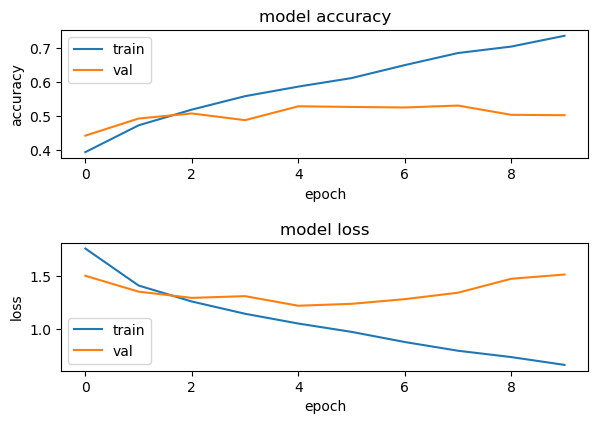

In [90]:
plot_history(history1_age8)

In [83]:
print("Accuracy: ", test_model(model1_age8, test_generator_age8)[1])

73/73 [==============================] - 26s 350ms/step - loss: 1.1969 - categorical_accuracy: 0.5298
Accuracy:  0.5297644734382629


***************************************************************************************************************************

#### Eight age groups - model 2

In [84]:
model2_age8 = create_model(conv_filters=[(32, 3), (64, 3), (128, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(24,),
                    dropout_rate=0,
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age8)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 23, 23, 128)     

In [85]:
history2_age8 = train_model(train_generator_age8, valid_generator_age8, model2_age8, epochs=15, es_patience=5)

Epoch 1/15
234/234 [==============================] - 417s 2s/step - loss: 1.6719 - categorical_accuracy: 0.3873 - val_loss: 1.4648 - val_categorical_accuracy: 0.4283
Epoch 2/15
234/234 [==============================] - 405s 2s/step - loss: 1.3629 - categorical_accuracy: 0.4787 - val_loss: 1.3115 - val_categorical_accuracy: 0.4917
Epoch 3/15
234/234 [==============================] - 405s 2s/step - loss: 1.2023 - categorical_accuracy: 0.5292 - val_loss: 1.2082 - val_categorical_accuracy: 0.5276
Epoch 4/15
234/234 [==============================] - 407s 2s/step - loss: 1.0910 - categorical_accuracy: 0.5690 - val_loss: 1.2648 - val_categorical_accuracy: 0.5233
Epoch 5/15
234/234 [==============================] - 402s 2s/step - loss: 1.0086 - categorical_accuracy: 0.5964 - val_loss: 1.1583 - val_categorical_accuracy: 0.5428
Epoch 6/15
234/234 [==============================] - 404s 2s/step - loss: 0.9371 - categorical_accuracy: 0.6224 - val_loss: 1.1502 - val_categorical_accuracy: 0.549

In [86]:
model2_age8.save("model2_age8.h5")

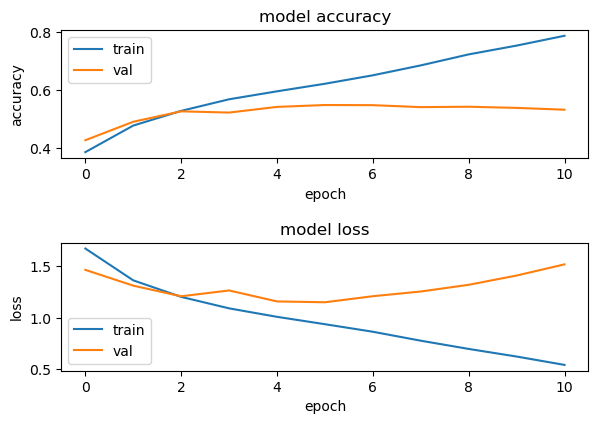

In [87]:
plot_history(history2_age8)

In [88]:
print("Accuracy: ", test_model(model2_age8, test_generator_age8)[1])

73/73 [==============================] - 49s 672ms/step - loss: 1.1280 - categorical_accuracy: 0.5587
Accuracy:  0.5586723685264587


***************************************************************************************************************************

#### Eight age groups - model 3

In [91]:
model3_age8 = create_model(conv_filters=[(64, 3), (32, 3), (16, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(24,),
                    dropout_rate=0,
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age8)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 99, 99, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 97, 97, 32)        18464     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 46, 46, 16)        4624      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 23, 23, 16)      

In [92]:
history3_age8 = train_model(train_generator_age8, valid_generator_age8, model3_age8, epochs=15, es_patience=5)

Epoch 1/15
234/234 [==============================] - 450s 2s/step - loss: 1.6988 - categorical_accuracy: 0.3696 - val_loss: 1.5129 - val_categorical_accuracy: 0.4339
Epoch 2/15
234/234 [==============================] - 442s 2s/step - loss: 1.3707 - categorical_accuracy: 0.4786 - val_loss: 1.3336 - val_categorical_accuracy: 0.4965
Epoch 3/15
234/234 [==============================] - 434s 2s/step - loss: 1.2172 - categorical_accuracy: 0.5270 - val_loss: 1.2455 - val_categorical_accuracy: 0.5118
Epoch 4/15
234/234 [==============================] - 435s 2s/step - loss: 1.1256 - categorical_accuracy: 0.5607 - val_loss: 1.2330 - val_categorical_accuracy: 0.5335
Epoch 5/15
234/234 [==============================] - 435s 2s/step - loss: 1.0703 - categorical_accuracy: 0.5778 - val_loss: 1.1756 - val_categorical_accuracy: 0.5383
Epoch 6/15
234/234 [==============================] - 433s 2s/step - loss: 1.0133 - categorical_accuracy: 0.5970 - val_loss: 1.1650 - val_categorical_accuracy: 0.539

In [93]:
model3_age8.save("model3_age8.h5")

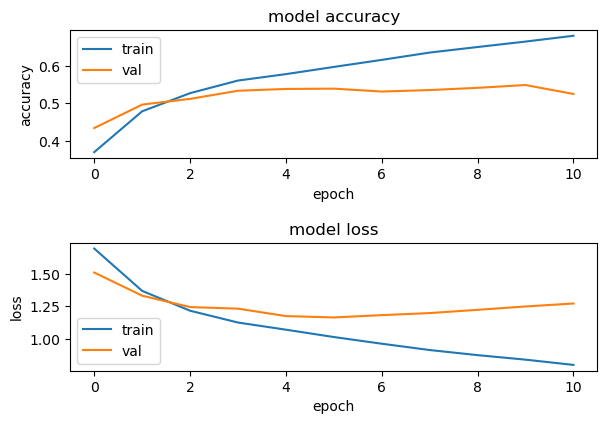

In [94]:
plot_history(history3_age8)

In [95]:
print("Accuracy: ", test_model(model3_age8, test_generator_age8)[1])

73/73 [==============================] - 32s 443ms/step - loss: 1.1436 - categorical_accuracy: 0.5510
Accuracy:  0.5509635806083679


***************************************************************************************************************************

#### Eight age groups - model 4

In [100]:
model4_age8 = create_model(conv_filters=[(32, 3), (64, 3), (128, 3)], 
                            pooling=(2, 2), 
                            dense_layer_sizes=(24,),
                            dropout_rate=0.25,
                            input_shape=(h, w, 3), 
                            no_of_classes=n_classes_age8)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 99, 99, 32)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 48, 48, 64)       

In [101]:
history4_age8 = train_model(train_generator_age8, valid_generator_age8, model4_age8, epochs=15, es_patience=5)

Epoch 1/15
234/234 [==============================] - 441s 2s/step - loss: 1.8151 - categorical_accuracy: 0.3583 - val_loss: 1.6684 - val_categorical_accuracy: 0.4004
Epoch 2/15
234/234 [==============================] - 464s 2s/step - loss: 1.4915 - categorical_accuracy: 0.4349 - val_loss: 1.4548 - val_categorical_accuracy: 0.4486
Epoch 3/15
234/234 [==============================] - 443s 2s/step - loss: 1.3975 - categorical_accuracy: 0.4577 - val_loss: 1.3781 - val_categorical_accuracy: 0.4732
Epoch 4/15
234/234 [==============================] - 433s 2s/step - loss: 1.3342 - categorical_accuracy: 0.4818 - val_loss: 1.3372 - val_categorical_accuracy: 0.4976
Epoch 5/15
234/234 [==============================] - 420s 2s/step - loss: 1.2899 - categorical_accuracy: 0.5108 - val_loss: 1.3147 - val_categorical_accuracy: 0.4984
Epoch 6/15
234/234 [==============================] - 419s 2s/step - loss: 1.2596 - categorical_accuracy: 0.5207 - val_loss: 1.2907 - val_categorical_accuracy: 0.511

In [102]:
model4_age8.save("model4_age8.h5")

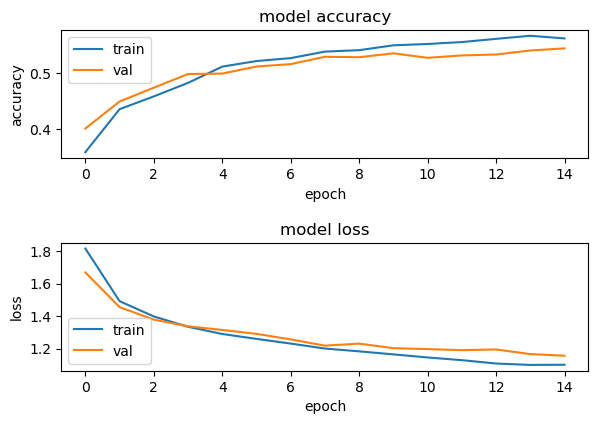

In [103]:
plot_history(history4_age8)

In [104]:
print("Accuracy: ", test_model(model4_age8, test_generator_age8)[1])

73/73 [==============================] - 40s 544ms/step - loss: 1.1449 - categorical_accuracy: 0.5450
Accuracy:  0.5449678897857666


***************************************************************************************************************************

#### Eight age groups - model 5

In [67]:
model5_age8 = create_model(conv_filters=[(64, 3), (32, 3), (16, 3)], 
                            pooling=(2, 2), 
                            dense_layer_sizes=(24,),
                            dropout_rate=0.25,
                            input_shape=(h, w, 3), 
                            no_of_classes=n_classes_age8)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 32)        0

In [68]:
history5_age8 = train_model(train_generator_age8, valid_generator_age8, model5_age8, epochs=15, es_patience=5)

Epoch 1/15
234/234 [==============================] - 581s 2s/step - loss: 1.8402 - categorical_accuracy: 0.3320 - val_loss: 1.7456 - val_categorical_accuracy: 0.3796
Epoch 2/15
234/234 [==============================] - 522s 2s/step - loss: 1.5640 - categorical_accuracy: 0.4249 - val_loss: 1.4837 - val_categorical_accuracy: 0.4518
Epoch 3/15
234/234 [==============================] - 511s 2s/step - loss: 1.4026 - categorical_accuracy: 0.4732 - val_loss: 1.3862 - val_categorical_accuracy: 0.4863
Epoch 4/15
234/234 [==============================] - 512s 2s/step - loss: 1.3115 - categorical_accuracy: 0.5020 - val_loss: 1.2695 - val_categorical_accuracy: 0.5163
Epoch 5/15
234/234 [==============================] - 512s 2s/step - loss: 1.2412 - categorical_accuracy: 0.5244 - val_loss: 1.2557 - val_categorical_accuracy: 0.5219
Epoch 6/15
234/234 [==============================] - 528s 2s/step - loss: 1.1802 - categorical_accuracy: 0.5435 - val_loss: 1.2010 - val_categorical_accuracy: 0.525

In [69]:
model5_age8.save("model5_age8.h5")

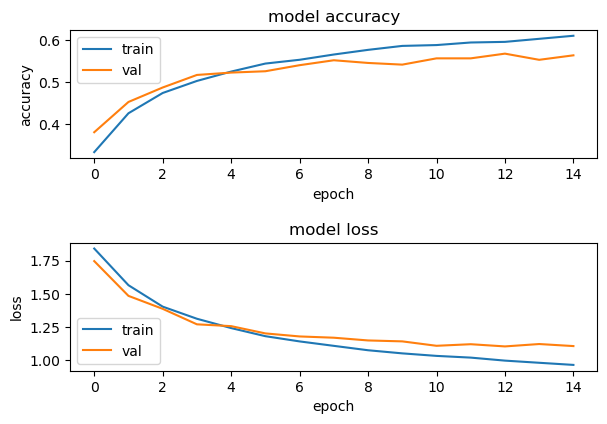

In [70]:
plot_history(history5_age8)

In [72]:
print("Accuracy: ", test_model(model5_age8, test_generator_age8)[1])

73/73 [==============================] - 39s 538ms/step - loss: 1.0790 - categorical_accuracy: 0.5704
Accuracy:  0.5704496502876282


***************************************************************************************************************************

### Results - Eight age groups

In [13]:
results_df[(results_df['category'] == 'age8') & (results_df['model'].str.startswith('model'))].sort_values('Accuracy', ascending=False)

model category               conv_layers Dropout BatchNormalization  \
14  model5_age8     age8   (64, 3) (32, 3) (16, 3)    0.25               None   
11  model1_age8     age8  (32, 3) (64, 3) (128, 3)       0               None   
12  model3_age8     age8   (64, 3) (32, 3) (16, 3)       0               None   
13  model4_age8     age8  (32, 3) (64, 3) (128, 3)    0.25               None   
10  model2_age8     age8           (32, 3) (64, 3)       0               None   

   Dense layers sizes Dense kernel reg  Accuracy Remarks  
14             (24, )             None    0.5704     NaN  
11             (24, )             None    0.5587     NaN  
12             (24, )             None    0.5510     NaN  
13             (24, )             None    0.5450     NaN  
10             (24, )             None    0.5298     NaN

***************************************************************************************************************************

<a id="27"></a>
### 8.2.4 Gender
[back to the top](#0)

#### Gender - model 1

In [67]:
model1_gender = create_model(conv_filters=[(32, 3), (64, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(24,),
                             dropout_rate=0,
                             input_shape=(h, w, 3),
                             output_fun='sigmoid',
                             no_of_classes=1,
                             loss="binary_crossentropy", 
                             metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 147456)            0         
                                                                 
 dense (Dense)               (None, 24)                3

In [69]:
history1_gender = train_model(train_generator_gend, valid_generator_gend, model1_gender, epochs=15, es_patience=5)

Epoch 1/15
234/234 [==============================] - 315s 1s/step - loss: 0.5576 - accuracy: 0.7308 - val_loss: 0.3913 - val_accuracy: 0.8266
Epoch 2/15
234/234 [==============================] - 306s 1s/step - loss: 0.3666 - accuracy: 0.8407 - val_loss: 0.3335 - val_accuracy: 0.8592
Epoch 3/15
234/234 [==============================] - 308s 1s/step - loss: 0.3211 - accuracy: 0.8648 - val_loss: 0.3182 - val_accuracy: 0.8619
Epoch 4/15
234/234 [==============================] - 284s 1s/step - loss: 0.2751 - accuracy: 0.8839 - val_loss: 0.2925 - val_accuracy: 0.8750
Epoch 5/15
234/234 [==============================] - 280s 1s/step - loss: 0.2449 - accuracy: 0.8967 - val_loss: 0.3131 - val_accuracy: 0.8670
Epoch 6/15
234/234 [==============================] - 243s 1s/step - loss: 0.2173 - accuracy: 0.9081 - val_loss: 0.2912 - val_accuracy: 0.8771
Epoch 7/15
234/234 [==============================] - 242s 1s/step - loss: 0.1882 - accuracy: 0.9234 - val_loss: 0.3166 - val_accuracy: 0.8755

In [70]:
model1_gender.save("model1_gender.h5")

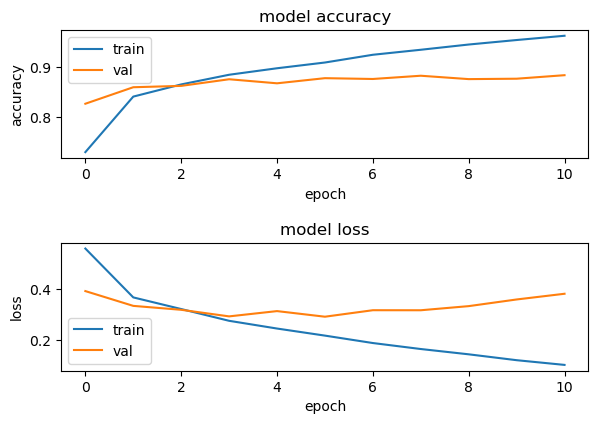

In [90]:
plot_history(history1_gender)

In [91]:
print("Accuracy: ", test_model(model1_gender, test_generator_gend)[1])

73/73 [==============================] - 32s 428ms/step - loss: 0.2969 - accuracy: 0.8809
Accuracy:  0.880942165851593


***************************************************************************************************************************

#### Gender - model 2

In [92]:
model2_gender = create_model(conv_filters=[(32, 3), (64, 3), (128, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(24,),
                             dropout_rate=0,
                             input_shape=(h, w, 3),
                             output_fun='sigmoid',
                             no_of_classes=1,
                             loss="binary_crossentropy", 
                             metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 128)     

In [93]:
history2_gender = train_model(train_generator_gend, valid_generator_gend, model2_gender, epochs=15, es_patience=5)

Epoch 1/15
234/234 [==============================] - 530s 2s/step - loss: 0.5972 - accuracy: 0.7229 - val_loss: 0.5089 - val_accuracy: 0.8354
Epoch 2/15
234/234 [==============================] - 531s 2s/step - loss: 0.4513 - accuracy: 0.8449 - val_loss: 0.3622 - val_accuracy: 0.8415
Epoch 3/15
234/234 [==============================] - 526s 2s/step - loss: 0.3132 - accuracy: 0.8652 - val_loss: 0.2965 - val_accuracy: 0.8747
Epoch 4/15
234/234 [==============================] - 549s 2s/step - loss: 0.2753 - accuracy: 0.8838 - val_loss: 0.2979 - val_accuracy: 0.8779
Epoch 5/15
234/234 [==============================] - 540s 2s/step - loss: 0.2437 - accuracy: 0.8995 - val_loss: 0.2985 - val_accuracy: 0.8766
Epoch 6/15
234/234 [==============================] - 538s 2s/step - loss: 0.2248 - accuracy: 0.9062 - val_loss: 0.3177 - val_accuracy: 0.8739
Epoch 7/15
234/234 [==============================] - 549s 2s/step - loss: 0.2019 - accuracy: 0.9175 - val_loss: 0.2852 - val_accuracy: 0.8836

In [94]:
model2_gender.save("model2_gender.h5")

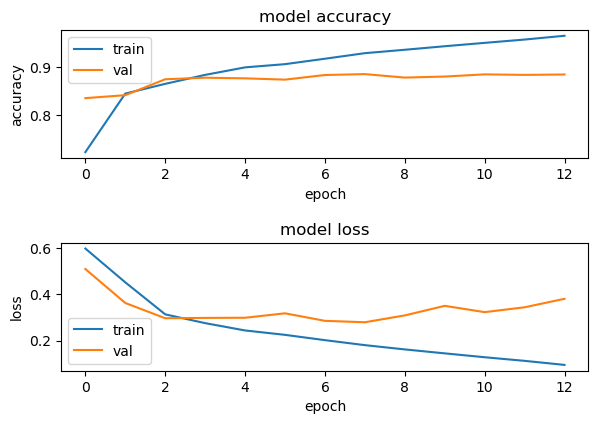

In [95]:
plot_history(history2_gender)

In [96]:
print("Accuracy: ", test_model(model2_gender, test_generator_gend)[1])

73/73 [==============================] - 49s 663ms/step - loss: 0.2803 - accuracy: 0.8910
Accuracy:  0.8910064101219177


***************************************************************************************************************************

#### Gender - model 3

In [97]:
model3_gender = create_model(conv_filters=[(64, 3), (32, 3), (16, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(24,),
                             dropout_rate=0,
                             input_shape=(h, w, 3),
                             output_fun='sigmoid',
                             no_of_classes=1,
                             loss="binary_crossentropy", 
                             metrics=["accuracy"])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 99, 99, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 97, 97, 32)        18464     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 46, 46, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 16)      

In [98]:
history3_gender = train_model(train_generator_gend, valid_generator_gend, model3_gender, epochs=15, es_patience=5)

Epoch 1/15
234/234 [==============================] - 626s 3s/step - loss: 0.4619 - accuracy: 0.7827 - val_loss: 0.3517 - val_accuracy: 0.8418
Epoch 2/15
234/234 [==============================] - 608s 3s/step - loss: 0.3140 - accuracy: 0.8618 - val_loss: 0.3143 - val_accuracy: 0.8656
Epoch 3/15
234/234 [==============================] - 714s 3s/step - loss: 0.2827 - accuracy: 0.8784 - val_loss: 0.2976 - val_accuracy: 0.8707
Epoch 4/15
234/234 [==============================] - 697s 3s/step - loss: 0.2529 - accuracy: 0.8924 - val_loss: 0.2884 - val_accuracy: 0.8798
Epoch 5/15
234/234 [==============================] - 626s 3s/step - loss: 0.2325 - accuracy: 0.8996 - val_loss: 0.2919 - val_accuracy: 0.8721
Epoch 6/15
234/234 [==============================] - 612s 3s/step - loss: 0.2053 - accuracy: 0.9138 - val_loss: 0.3022 - val_accuracy: 0.8769
Epoch 7/15
234/234 [==============================] - 613s 3s/step - loss: 0.1813 - accuracy: 0.9254 - val_loss: 0.2957 - val_accuracy: 0.8854

In [99]:
model3_gender.save("model3_gender.h5")

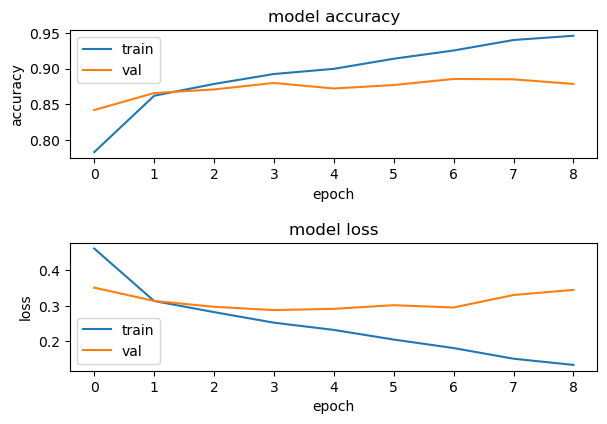

In [100]:
plot_history(history3_gender)

In [101]:
print("Accuracy: ", test_model(model3_gender, test_generator_gend)[1])

73/73 [==============================] - 52s 710ms/step - loss: 0.2905 - accuracy: 0.8741
Accuracy:  0.8740899562835693


***************************************************************************************************************************

#### Gender - model 4

In [102]:
model4_gender = create_model(conv_filters=[(32, 3), (64, 3), (128, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(24,),
                             dropout_rate=0.25,
                             input_shape=(h, w, 3),
                             output_fun='sigmoid',
                             no_of_classes=1,
                             loss="binary_crossentropy", 
                             metrics=["accuracy"])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 99, 99, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 64)       

In [103]:
history4_gender = train_model(train_generator_gend, valid_generator_gend, model4_gender, epochs=15, es_patience=5)

Epoch 1/15
234/234 [==============================] - 595s 3s/step - loss: 0.5735 - accuracy: 0.7017 - val_loss: 0.4894 - val_accuracy: 0.7982
Epoch 2/15
234/234 [==============================] - 596s 3s/step - loss: 0.4007 - accuracy: 0.8222 - val_loss: 0.3772 - val_accuracy: 0.8426
Epoch 3/15
234/234 [==============================] - 605s 3s/step - loss: 0.3471 - accuracy: 0.8499 - val_loss: 0.3470 - val_accuracy: 0.8560
Epoch 4/15
234/234 [==============================] - 619s 3s/step - loss: 0.3160 - accuracy: 0.8608 - val_loss: 0.3074 - val_accuracy: 0.8691
Epoch 5/15
234/234 [==============================] - 612s 3s/step - loss: 0.2988 - accuracy: 0.8677 - val_loss: 0.3050 - val_accuracy: 0.8704
Epoch 6/15
234/234 [==============================] - 601s 3s/step - loss: 0.2800 - accuracy: 0.8765 - val_loss: 0.3106 - val_accuracy: 0.8704
Epoch 7/15
234/234 [==============================] - 604s 3s/step - loss: 0.2717 - accuracy: 0.8795 - val_loss: 0.2905 - val_accuracy: 0.8747

In [104]:
model4_gender.save("model4_gender.h5")

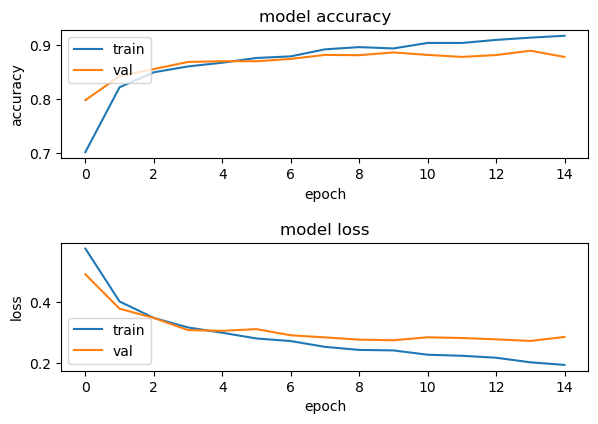

In [105]:
plot_history(history4_gender)

In [106]:
print("Accuracy: ", test_model(model4_gender, test_generator_gend)[1])

73/73 [==============================] - 45s 619ms/step - loss: 0.2845 - accuracy: 0.8758
Accuracy:  0.8758029937744141


***************************************************************************************************************************

#### Gender - model 5

In [67]:
model5_gender = create_model(conv_filters=[(64, 3), (32, 3), (16, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(24,),
                             dropout_rate=0.25,
                             input_shape=(h, w, 3),
                             output_fun='sigmoid',
                             no_of_classes=1,
                             loss="binary_crossentropy", 
                             metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 32)        0

In [68]:
history5_gender = train_model(train_generator_gend, valid_generator_gend, model5_gender, epochs=15, es_patience=5)

Epoch 1/15
234/234 [==============================] - 596s 3s/step - loss: 0.5697 - accuracy: 0.7072 - val_loss: 0.4948 - val_accuracy: 0.7904
Epoch 2/15
234/234 [==============================] - 558s 2s/step - loss: 0.3929 - accuracy: 0.8248 - val_loss: 0.3496 - val_accuracy: 0.8544
Epoch 3/15
234/234 [==============================] - 529s 2s/step - loss: 0.3454 - accuracy: 0.8500 - val_loss: 0.3472 - val_accuracy: 0.8480
Epoch 4/15
234/234 [==============================] - 592s 3s/step - loss: 0.3202 - accuracy: 0.8596 - val_loss: 0.3394 - val_accuracy: 0.8568
Epoch 5/15
234/234 [==============================] - 593s 3s/step - loss: 0.3015 - accuracy: 0.8679 - val_loss: 0.3135 - val_accuracy: 0.8624
Epoch 6/15
234/234 [==============================] - 556s 2s/step - loss: 0.2887 - accuracy: 0.8737 - val_loss: 0.2881 - val_accuracy: 0.8822
Epoch 7/15
234/234 [==============================] - 550s 2s/step - loss: 0.2744 - accuracy: 0.8826 - val_loss: 0.2809 - val_accuracy: 0.8796

In [69]:
model5_gender.save("model5_gender.h5")

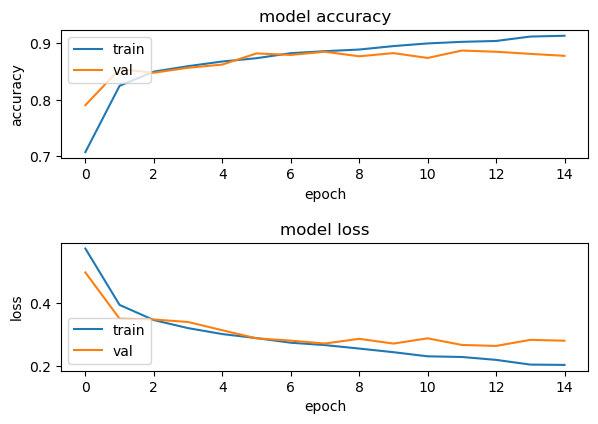

In [72]:
plot_history(history5_gender)

In [73]:
print("Accuracy: ", test_model(model5_gender, test_generator_gend)[1])

73/73 [==============================] - 37s 507ms/step - loss: 0.2671 - accuracy: 0.8818
Accuracy:  0.8817987442016602


***************************************************************************************************************************

#### Results - Gender

In [14]:
results_df[(results_df['category'] == 'gender') & (results_df['model'].str.startswith('model'))].sort_values('Accuracy', ascending=False)

model category               conv_layers Dropout  \
16  model2_gender   gender  (32, 3) (64, 3) (128, 3)       0   
19  model5_gender   gender   (64, 3) (32, 3) (16, 3)    0.25   
15  model1_gender   gender           (32, 3) (64, 3)       0   
18  model4_gender   gender  (32, 3) (64, 3) (128, 3)    0.25   
17  model3_gender   gender   (64, 3) (32, 3) (16, 3)       0   

   BatchNormalization Dense layers sizes Dense kernel reg  Accuracy Remarks  
16               None             (24, )             None    0.8910     NaN  
19               None             (24, )             None    0.8818     NaN  
15               None             (24, )             None    0.8809     NaN  
18               None             (24, )             None    0.8758     NaN  
17               None             (24, )             None    0.8741     NaN

***************************************************************************************************************************

<a id="28"></a>
### 8.2.5 Race
[back to the top](#0)

#### Race - model 1

In [67]:
model1_race = create_model(conv_filters=[(32, 3), (16, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(24,),
                             dropout_rate=0,
                             input_shape=(h, w, 3), 
                             no_of_classes=n_classes_race)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 24)                8

In [68]:
history1_race = train_model(train_generator_race, valid_generator_race, model1_race, epochs=15, es_patience=5)

Epoch 1/15
234/234 [==============================] - 200s 851ms/step - loss: 1.1065 - categorical_accuracy: 0.5893 - val_loss: 0.8753 - val_categorical_accuracy: 0.6962
Epoch 2/15
234/234 [==============================] - 164s 701ms/step - loss: 0.7851 - categorical_accuracy: 0.7264 - val_loss: 0.7439 - val_categorical_accuracy: 0.7452
Epoch 3/15
234/234 [==============================] - 164s 701ms/step - loss: 0.6858 - categorical_accuracy: 0.7648 - val_loss: 0.6945 - val_categorical_accuracy: 0.7669
Epoch 4/15
234/234 [==============================] - 156s 668ms/step - loss: 0.6155 - categorical_accuracy: 0.7901 - val_loss: 0.7047 - val_categorical_accuracy: 0.7647
Epoch 5/15
234/234 [==============================] - 157s 673ms/step - loss: 0.5397 - categorical_accuracy: 0.8166 - val_loss: 0.7168 - val_categorical_accuracy: 0.7612
Epoch 6/15
234/234 [==============================] - 161s 686ms/step - loss: 0.4724 - categorical_accuracy: 0.8373 - val_loss: 0.6865 - val_categoric

In [69]:
model1_race.save("model1_race.h5")

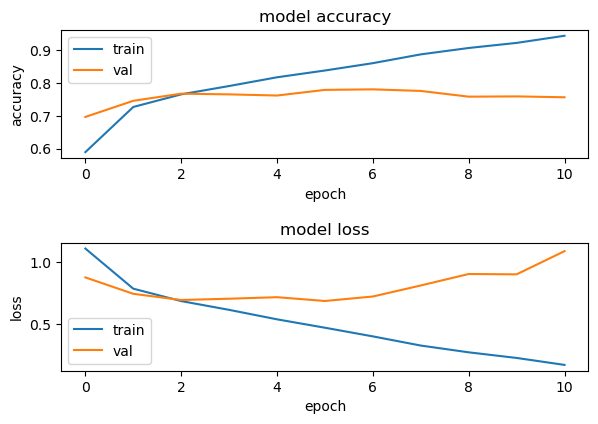

In [70]:
plot_history(history1_race)

In [71]:
print("Accuracy: ", test_model(model1_race, test_generator_race)[1])

73/73 [==============================] - 14s 197ms/step - loss: 0.7390 - categorical_accuracy: 0.7638
Accuracy:  0.7638115882873535


***************************************************************************************************************************

#### Race - model 2

In [72]:
model2_race = create_model(conv_filters=[(32, 3), (64, 3), (128, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(24,),
                             dropout_rate=0,
                             input_shape=(h, w, 3), 
                             no_of_classes=n_classes_race)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 128)     

In [73]:
history2_race = train_model(train_generator_race, valid_generator_race, model2_race, epochs=15, es_patience=5)

Epoch 1/15
234/234 [==============================] - 430s 2s/step - loss: 1.1188 - categorical_accuracy: 0.5739 - val_loss: 0.8118 - val_categorical_accuracy: 0.7109
Epoch 2/15
234/234 [==============================] - 435s 2s/step - loss: 0.7610 - categorical_accuracy: 0.7378 - val_loss: 0.7144 - val_categorical_accuracy: 0.7546
Epoch 3/15
234/234 [==============================] - 420s 2s/step - loss: 0.6313 - categorical_accuracy: 0.7839 - val_loss: 0.6673 - val_categorical_accuracy: 0.7762
Epoch 4/15
234/234 [==============================] - 429s 2s/step - loss: 0.5492 - categorical_accuracy: 0.8125 - val_loss: 0.6696 - val_categorical_accuracy: 0.7634
Epoch 5/15
234/234 [==============================] - 432s 2s/step - loss: 0.4845 - categorical_accuracy: 0.8366 - val_loss: 0.6364 - val_categorical_accuracy: 0.7851
Epoch 6/15
234/234 [==============================] - 423s 2s/step - loss: 0.4022 - categorical_accuracy: 0.8624 - val_loss: 0.6571 - val_categorical_accuracy: 0.778

In [74]:
model2_race.save("model2_race.h5")

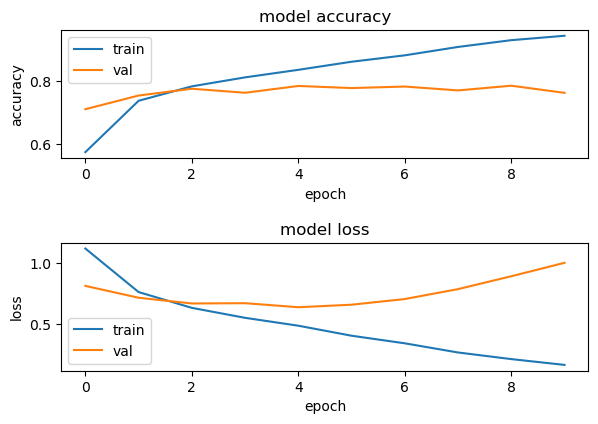

In [75]:
plot_history(history2_race)

In [76]:
print("Accuracy: ", test_model(model2_race, test_generator_race)[1])

73/73 [==============================] - 41s 558ms/step - loss: 0.6739 - categorical_accuracy: 0.7739
Accuracy:  0.7738758325576782


***************************************************************************************************************************

#### Race - model 3

In [77]:
model3_race = create_model(conv_filters=[(64, 3), (32, 3), (16, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(24,),
                             dropout_rate=0,
                             input_shape=(h, w, 3), 
                             no_of_classes=n_classes_race)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 99, 99, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 97, 97, 32)        18464     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 46, 46, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 16)      

In [78]:
history3_race = train_model(train_generator_race, valid_generator_race, model3_race, epochs=15, es_patience=5)

Epoch 1/15
234/234 [==============================] - 465s 2s/step - loss: 1.1621 - categorical_accuracy: 0.5590 - val_loss: 0.8823 - val_categorical_accuracy: 0.6879
Epoch 2/15
234/234 [==============================] - 457s 2s/step - loss: 0.8253 - categorical_accuracy: 0.7141 - val_loss: 0.7428 - val_categorical_accuracy: 0.7422
Epoch 3/15
234/234 [==============================] - 545s 2s/step - loss: 0.7323 - categorical_accuracy: 0.7463 - val_loss: 0.7022 - val_categorical_accuracy: 0.7690
Epoch 4/15
234/234 [==============================] - 486s 2s/step - loss: 0.6713 - categorical_accuracy: 0.7692 - val_loss: 0.7131 - val_categorical_accuracy: 0.7562
Epoch 5/15
234/234 [==============================] - 601s 3s/step - loss: 0.6285 - categorical_accuracy: 0.7848 - val_loss: 0.6680 - val_categorical_accuracy: 0.7752
Epoch 6/15
234/234 [==============================] - 640s 3s/step - loss: 0.5994 - categorical_accuracy: 0.7928 - val_loss: 0.6890 - val_categorical_accuracy: 0.776

In [79]:
model3_race.save("model3_race.h5")

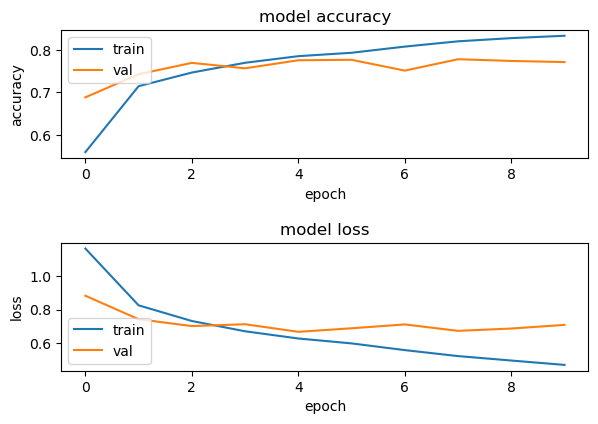

In [80]:
plot_history(history3_race)

In [81]:
print("Accuracy: ", test_model(model3_race, test_generator_race)[1])

73/73 [==============================] - 36s 495ms/step - loss: 0.6894 - categorical_accuracy: 0.7709
Accuracy:  0.7708779573440552


***************************************************************************************************************************

#### Race - model 4

In [82]:
model4_race = create_model(conv_filters=[(32, 3), (64, 3), (128, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(24,),
                             dropout_rate=0.25,
                             input_shape=(h, w, 3), 
                             no_of_classes=n_classes_race)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 99, 99, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 64)       

In [83]:
history4_race = train_model(train_generator_race, valid_generator_race, model4_race, epochs=15, es_patience=5)

Epoch 1/15
234/234 [==============================] - 472s 2s/step - loss: 1.4140 - categorical_accuracy: 0.4507 - val_loss: 1.2455 - val_categorical_accuracy: 0.5115
Epoch 2/15
234/234 [==============================] - 465s 2s/step - loss: 1.1041 - categorical_accuracy: 0.5820 - val_loss: 0.9950 - val_categorical_accuracy: 0.6558
Epoch 3/15
234/234 [==============================] - 496s 2s/step - loss: 0.9180 - categorical_accuracy: 0.6726 - val_loss: 0.8854 - val_categorical_accuracy: 0.6919
Epoch 4/15
234/234 [==============================] - 493s 2s/step - loss: 0.8290 - categorical_accuracy: 0.7113 - val_loss: 0.7916 - val_categorical_accuracy: 0.7339
Epoch 5/15
234/234 [==============================] - 480s 2s/step - loss: 0.7804 - categorical_accuracy: 0.7318 - val_loss: 0.7647 - val_categorical_accuracy: 0.7532
Epoch 6/15
234/234 [==============================] - 470s 2s/step - loss: 0.7402 - categorical_accuracy: 0.7454 - val_loss: 0.7394 - val_categorical_accuracy: 0.744

In [84]:
model4_race.save("model4_race.h5")

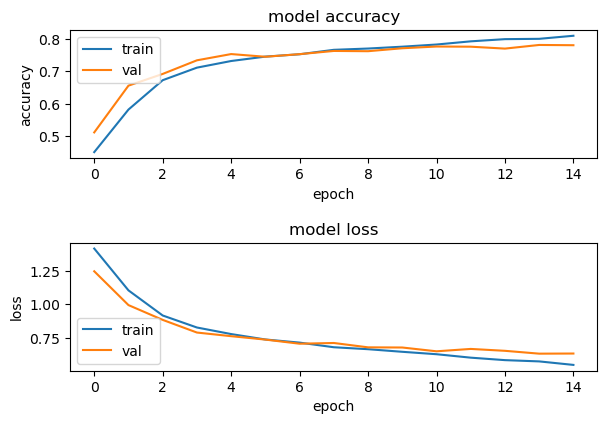

In [85]:
plot_history(history4_race)

In [86]:
print("Accuracy: ", test_model(model4_race, test_generator_race)[1])

73/73 [==============================] - 38s 514ms/step - loss: 0.6627 - categorical_accuracy: 0.7694
Accuracy:  0.7693790197372437


***************************************************************************************************************************

#### Race - model 5

In [67]:
model5_race = create_model(conv_filters=[(64, 3), (32, 3), (16, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(24,),
                             dropout_rate=0,
                             input_shape=(h, w, 3), 
                             no_of_classes=n_classes_race)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 16)       0

In [68]:
history5_race = train_model(train_generator_race, valid_generator_race, model5_race, epochs=15, es_patience=5)

Epoch 1/15
234/234 [==============================] - 545s 2s/step - loss: 1.1446 - categorical_accuracy: 0.5685 - val_loss: 0.9677 - val_categorical_accuracy: 0.6512
Epoch 2/15
234/234 [==============================] - 542s 2s/step - loss: 0.7763 - categorical_accuracy: 0.7259 - val_loss: 0.7622 - val_categorical_accuracy: 0.7347
Epoch 3/15
234/234 [==============================] - 528s 2s/step - loss: 0.6756 - categorical_accuracy: 0.7638 - val_loss: 0.7323 - val_categorical_accuracy: 0.7540
Epoch 4/15
234/234 [==============================] - 478s 2s/step - loss: 0.6180 - categorical_accuracy: 0.7843 - val_loss: 0.7235 - val_categorical_accuracy: 0.7596
Epoch 5/15
234/234 [==============================] - 442s 2s/step - loss: 0.5637 - categorical_accuracy: 0.8041 - val_loss: 0.7299 - val_categorical_accuracy: 0.7578
Epoch 6/15
234/234 [==============================] - 442s 2s/step - loss: 0.5192 - categorical_accuracy: 0.8185 - val_loss: 0.8942 - val_categorical_accuracy: 0.701

In [69]:
model5_race.save("model5_race.h5")

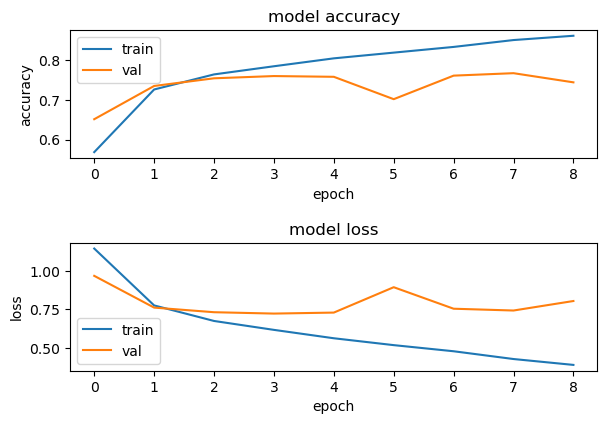

In [70]:
plot_history(history5_race)

In [71]:
print("Accuracy: ", test_model(model5_race, test_generator_race)[1])

73/73 [==============================] - 33s 448ms/step - loss: 0.7115 - categorical_accuracy: 0.7606
Accuracy:  0.7605995535850525


***************************************************************************************************************************

#### Results - race

In [15]:
results_df[(results_df['category'] == 'race') & (results_df['model'].str.startswith('model'))].sort_values('Accuracy', ascending=False)

model category               conv_layers Dropout BatchNormalization  \
21  model2_race     race  (32, 3) (64, 3) (128, 3)       0               None   
22  model3_race     race   (64, 3) (32, 3) (16, 3)       0               None   
23  model4_race     race  (32, 3) (64, 3) (128, 3)    0.25               None   
20  model1_race     race           (32, 3) (64, 3)       0               None   
24  model5_race     race   (64, 3) (32, 3) (16, 3)    0.25               None   

   Dense layers sizes Dense kernel reg  Accuracy Remarks  
21             (24, )             None    0.7739     NaN  
22             (24, )             None    0.7709     NaN  
23             (24, )             None    0.7694     NaN  
20             (24, )             None    0.7638     NaN  
24             (24, )             None    0.7606     NaN

***************************************************************************************************************************

<a id="29"></a>
## 8.3 Hyperparameters tunning using Keras Tuner
[back to the top](#0)

<a id="30"></a>
### 8.3.1 Three age groups
[back to the top](#0)

In [67]:
def build_model_age(hp):
    model = Sequential()
    
    # Convolution 
    model.add(Conv2D(filters=hp.Int('conv_1_filter', min_value=16, max_value=48, step=16),
                kernel_size=hp.Choice('kernel', values = [3, 5]),
                activation=hp.Choice('activation', values=['relu', 'tanh']),
                input_shape=(200,200,3)))
    
    model.add(MaxPool2D(pool_size=2))
    
    if hp.Boolean("dropout"):
        model.add(Dropout(hp.Choice('drop_rate', values = [0.25, 0.5])))
    
    
    model.add(Conv2D(filters=hp.Int('conv_2_filter', min_value=48, max_value=80, step=16),
                kernel_size=hp.Choice('kernel', values = [3, 5]),
                activation=hp.Choice('activation', values=['relu', 'tanh'])))
    # pooling
    model.add(MaxPool2D(pool_size=2))
    if hp.Boolean("dropout"):
        model.add(Dropout(hp.Choice('drop_rate', values = [0.25, 0.5])))
        
    # Convolution
    
    model.add(Conv2D(filters=hp.Int('conv_3_filter', min_value=80, max_value=128, step=32),
                    kernel_size=hp.Choice('kernel', values = [3, 5]),
                    activation=hp.Choice('activation', values=['relu', 'tanh'])))
    model.add(MaxPool2D(pool_size=2))
    if hp.Boolean("dropout"):
        model.add(Dropout(hp.Choice('drop_rate', values = [0.25, 0.5])))

    if hp.Boolean("4th_conv_layer"):    
        model.add(Conv2D(filters=hp.Int('conv_4_filter', min_value=128, max_value=256, step=32),
                kernel_size=hp.Choice('kernel', values = [3, 5]),
                activation=hp.Choice('activation', values=['relu', 'tanh'])))
        model.add(MaxPool2D(pool_size=2))
        if hp.Boolean("dropout"):
            model.add(Dropout(hp.Choice('drop_rate', values = [0.25, 0.5])))

    #flattening
    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_1_units', min_value=16, max_value=64, step=8),activation='relu'))
    
    # Output layer
    model.add(Dense(units=3,activation='softmax'))
    
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
                  loss='categorical_crossentropy',metrics=['categorical_accuracy'])
    return model

In [68]:
tuner_age = RandomSearch(build_model_age,
                         objective=kt.Objective("val_categorical_accuracy", direction = "max"), 
                         max_trials=50, 
                         executions_per_trial=1, 
                         directory='trials_age3', 
                         project_name='age_gender_race')

INFO:tensorflow:Reloading Tuner from trials_age3\age_gender_race\tuner0.json


In [65]:
tuner_age.search(train_generator_age3,
              validation_data=valid_generator_age3, 
              epochs=3, 
              batch_size=32)

Trial 50 Complete [00h 17m 26s]
val_categorical_accuracy: 0.7270488739013672

Best val_categorical_accuracy So Far: 0.8997538089752197
Total elapsed time: 02h 17m 55s
INFO:tensorflow:Oracle triggered exit


In [69]:
tuner_age.results_summary()

Results summary
Results in trials_age3\age_gender_race
Showing 10 best trials
Objective(name="val_categorical_accuracy", direction="max")

Trial 06 summary
Hyperparameters:
conv_1_filter: 16
kernel: 3
activation: relu
dropout: False
conv_2_filter: 80
conv_3_filter: 112
4th_conv_layer: False
dense_1_units: 64
learning_rate: 0.001
drop_rate: 0.25
conv_4_filter: 128
Score: 0.8997538089752197

Trial 10 summary
Hyperparameters:
conv_1_filter: 16
kernel: 5
activation: relu
dropout: False
conv_2_filter: 48
conv_3_filter: 80
4th_conv_layer: False
dense_1_units: 48
learning_rate: 0.001
drop_rate: 0.5
conv_4_filter: 192
Score: 0.8892015218734741

Trial 22 summary
Hyperparameters:
conv_1_filter: 16
kernel: 3
activation: tanh
dropout: False
conv_2_filter: 64
conv_3_filter: 112
4th_conv_layer: False
dense_1_units: 24
learning_rate: 0.001
drop_rate: 0.25
conv_4_filter: 256
Score: 0.8888497948646545

Trial 00 summary
Hyperparameters:
conv_1_filter: 16
kernel: 3
activation: relu
dropout: False
conv_2_

In [70]:
# creating model with best hyperparameters based on results of Keras Tuner
best_hp = tuner_age.get_best_hyperparameters()[0]
tuned_model1_age3 = build_model_age(best_hp)
tuned_model1_age3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 80)        11600     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 80)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 112)       80752     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 112)      0

In [71]:
history1_tuned_age3 = train_model(train_generator_age3, valid_generator_age3, tuned_model1_age3, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 364s 2s/step - loss: 0.6247 - categorical_accuracy: 0.7792 - val_loss: 0.4138 - val_categorical_accuracy: 0.8528
Epoch 2/15
234/234 [==============================] - 368s 2s/step - loss: 0.3809 - categorical_accuracy: 0.8611 - val_loss: 0.3957 - val_categorical_accuracy: 0.8552
Epoch 3/15
234/234 [==============================] - 368s 2s/step - loss: 0.3150 - categorical_accuracy: 0.8828 - val_loss: 0.3158 - val_categorical_accuracy: 0.8852
Epoch 4/15
234/234 [==============================] - 373s 2s/step - loss: 0.2829 - categorical_accuracy: 0.8959 - val_loss: 0.3035 - val_categorical_accuracy: 0.8881
Epoch 5/15
234/234 [==============================] - 368s 2s/step - loss: 0.2511 - categorical_accuracy: 0.9066 - val_loss: 0.2947 - val_categorical_accuracy: 0.8959
Epoch 6/15
234/234 [==============================] - 368s 2s/step - loss: 0.2168 - categorical_accuracy: 0.9180 - val_loss: 0.2889 - val_categorical_accuracy: 0.895

In [72]:
tuned_model1_age3.save("tuned_model1_age3.h5")

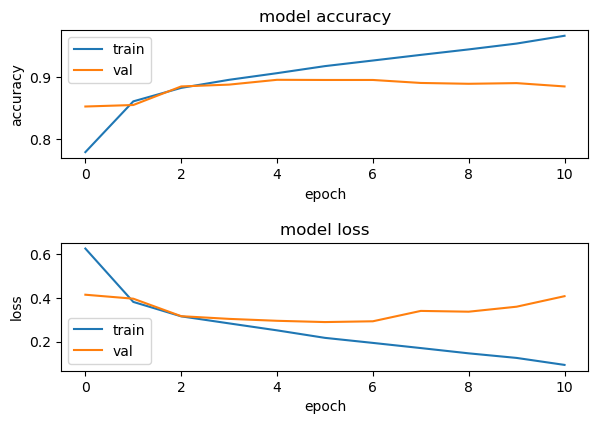

In [73]:
plot_history(history1_tuned_age3)

In [74]:
print("Accuracy: ", test_model(tuned_model1_age3, test_generator_age3)[1])

73/73 [==============================] - 36s 488ms/step - loss: 0.2798 - categorical_accuracy: 0.9009
Accuracy:  0.9008565545082092


#### Note: 
We can observe overfitting in the model above (accuracy for training data is much higher than for validation and test data). To try to limit overfitting I'm adding dropout with 30% dropout rate. 

***************************************************************************************************************************

In [75]:
tuned_model2_age3 = create_model(conv_filters=[(16, 3), (80, 3), (112, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(64,),
                    dropout_rate=0.3,
                    input_shape=(200, 200, 3), 
                    no_of_classes=n_classes_age3)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 99, 99, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 80)        11600     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 80)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 80)       

In [76]:
history2_tuned_age3 = train_model(train_generator_age3, valid_generator_age3, tuned_model2_age3, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 448s 2s/step - loss: 0.7838 - categorical_accuracy: 0.7368 - val_loss: 0.5749 - val_categorical_accuracy: 0.8137
Epoch 2/15
234/234 [==============================] - 443s 2s/step - loss: 0.4885 - categorical_accuracy: 0.8159 - val_loss: 0.4330 - val_categorical_accuracy: 0.8335
Epoch 3/15
234/234 [==============================] - 436s 2s/step - loss: 0.4301 - categorical_accuracy: 0.8383 - val_loss: 0.4076 - val_categorical_accuracy: 0.8675
Epoch 4/15
234/234 [==============================] - 511s 2s/step - loss: 0.3925 - categorical_accuracy: 0.8545 - val_loss: 0.3723 - val_categorical_accuracy: 0.8787
Epoch 5/15
234/234 [==============================] - 502s 2s/step - loss: 0.3683 - categorical_accuracy: 0.8654 - val_loss: 0.3581 - val_categorical_accuracy: 0.8763
Epoch 6/15
234/234 [==============================] - 454s 2s/step - loss: 0.3362 - categorical_accuracy: 0.8731 - val_loss: 0.3387 - val_categorical_accuracy: 0.880

In [77]:
tuned_model2_age3.save("tuned_model2_age3.h5")

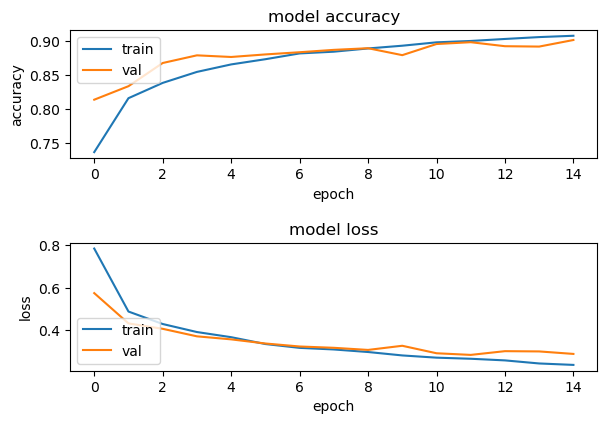

In [78]:
plot_history(history2_tuned_age3)

In [79]:
print("Accuracy: ", test_model(tuned_model2_age3, test_generator_age3)[1])

73/73 [==============================] - 38s 513ms/step - loss: 0.2709 - categorical_accuracy: 0.9043
Accuracy:  0.9042826294898987


***************************************************************************************************************************

#### Note:
We can observe that overfitting was reduced thanks to dropout and accuracy of the model improved slightly. 
Now I'm going to try with kernel regularizer 'l2' on Dense layer.

In [80]:
tuned_model3_age3 = create_model(conv_filters=[(16, 3), (80, 3), (112, 3)], 
                                    pooling=(2, 2), 
                                    dense_layer_sizes=(64,),
                                    dropout_rate=0.3,
                                    dense_kernel_regularizer='l2',
                                    input_shape=(h, w, 3), 
                                    no_of_classes=n_classes_age3)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 99, 99, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 80)        11600     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 48, 48, 80)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 48, 48, 80)       

In [81]:
history3_tuned_age3 = train_model(train_generator_age3, valid_generator_age3, tuned_model3_age3, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 444s 2s/step - loss: 0.9374 - categorical_accuracy: 0.7272 - val_loss: 0.6770 - val_categorical_accuracy: 0.7810
Epoch 2/15
234/234 [==============================] - 450s 2s/step - loss: 0.5702 - categorical_accuracy: 0.8120 - val_loss: 0.4923 - val_categorical_accuracy: 0.8506
Epoch 3/15
234/234 [==============================] - 458s 2s/step - loss: 0.4892 - categorical_accuracy: 0.8458 - val_loss: 0.4532 - val_categorical_accuracy: 0.8605
Epoch 4/15
234/234 [==============================] - 479s 2s/step - loss: 0.4669 - categorical_accuracy: 0.8504 - val_loss: 0.4300 - val_categorical_accuracy: 0.8713
Epoch 5/15
234/234 [==============================] - 475s 2s/step - loss: 0.4396 - categorical_accuracy: 0.8589 - val_loss: 0.4298 - val_categorical_accuracy: 0.8702
Epoch 6/15
234/234 [==============================] - 520s 2s/step - loss: 0.4324 - categorical_accuracy: 0.8640 - val_loss: 0.3973 - val_categorical_accuracy: 0.880

In [82]:
tuned_model3_age3.save("tuned_model3_age3.h5")

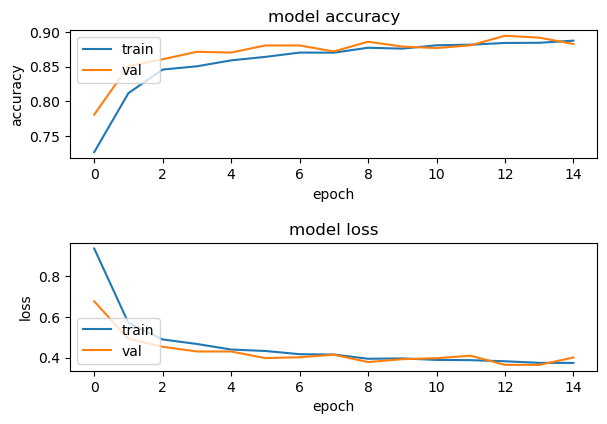

In [83]:
plot_history(history3_tuned_age3)

In [84]:
print("Accuracy: ", test_model(tuned_model3_age3, test_generator_age3)[1])

73/73 [==============================] - 36s 494ms/step - loss: 0.3925 - categorical_accuracy: 0.8859
Accuracy:  0.8858672380447388


#### Note:
We can observe that overfitting was further reduced but accuracy is worse.
Now I'm going to try batch normalization.

***************************************************************************************************************************

In [85]:
tuned_model4_age3 = create_model(conv_filters=[(16, 3), (80, 3), (112, 3)], 
                                    pooling=(2, 2), 
                                    dense_layer_sizes=(64,),
                                    dropout_rate=0.3,
                                    batch_normalization=True,
                                    dense_kernel_regularizer='l2',
                                    input_shape=(h, w, 3), 
                                    no_of_classes=n_classes_age3)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 99, 99, 16)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 97, 97, 80)        11600     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 48, 48, 80)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 48, 48, 80)       

In [86]:
history4_tuned_age3 = train_model(train_generator_age3, valid_generator_age3, tuned_model4_age3, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 419s 2s/step - loss: 2.2923 - categorical_accuracy: 0.7910 - val_loss: 3.5648 - val_categorical_accuracy: 0.1625
Epoch 2/15
234/234 [==============================] - 415s 2s/step - loss: 1.2436 - categorical_accuracy: 0.8502 - val_loss: 3.7116 - val_categorical_accuracy: 0.1146
Epoch 3/15
234/234 [==============================] - 418s 2s/step - loss: 1.0203 - categorical_accuracy: 0.8700 - val_loss: 1.1347 - val_categorical_accuracy: 0.8268
Epoch 4/15
234/234 [==============================] - 416s 2s/step - loss: 0.8816 - categorical_accuracy: 0.8769 - val_loss: 0.8862 - val_categorical_accuracy: 0.8608
Epoch 5/15
234/234 [==============================] - 418s 2s/step - loss: 0.7730 - categorical_accuracy: 0.8846 - val_loss: 1.6879 - val_categorical_accuracy: 0.4026
Epoch 6/15
234/234 [==============================] - 432s 2s/step - loss: 0.7040 - categorical_accuracy: 0.8901 - val_loss: 0.7485 - val_categorical_accuracy: 0.868

In [87]:
tuned_model4_age3.save("tuned_model4_age3.h5")

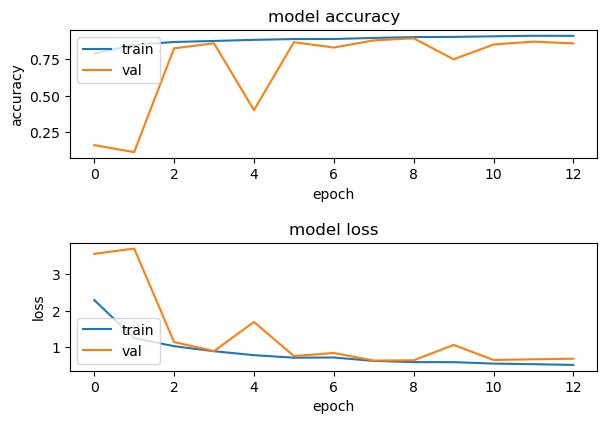

In [88]:
plot_history(history4_tuned_age3)

In [89]:
print("Accuracy: ", test_model(tuned_model4_age3, test_generator_age3)[1])

73/73 [==============================] - 34s 471ms/step - loss: 0.6109 - categorical_accuracy: 0.8882
Accuracy:  0.8882226943969727


#### Note:
In this case accuracy of the model with batch normalization is worse than without it.

***************************************************************************************************************************

### Results - tuned three age groups

In [18]:
results_df[(results_df['category'] == 'age3') & (results_df['model'].str.startswith('tuned'))].sort_values('Accuracy', ascending=False)

model category               conv_layers Dropout  \
26  tuned_model2_age3     age3  (16, 3) (80, 3) (112, 3)     0.3   
25  tuned_model1_age3     age3  (16, 3) (80, 3) (112, 3)       0   
28  tuned_model4_age3     age3  (16, 3) (80, 3) (112, 3)     0.3   
27  tuned_model3_age3     age3  (16, 3) (80, 3) (112, 3)     0.3   

   BatchNormalization Dense layers sizes Dense kernel reg  Accuracy Remarks  
26               None             (64, )             None    0.9043     NaN  
25               None             (64, )             None    0.8997     NaN  
28               True             (64, )               l2    0.8882     NaN  
27               None             (64, )               l2    0.8859     NaN

***************************************************************************************************************************

<a id="31"></a>
### 8.3.2 Seven age groups
[back to the top](#0)

In [70]:
def build_tuner_model_age7(hp):
    model = Sequential()
    
    # Convolution 
    model.add(Conv2D(filters=hp.Int('conv_1_filter', min_value=16, max_value=48, step=16),
                kernel_size=3,
                activation="relu",
                input_shape=(200,200,3)))
    
    model.add(MaxPool2D(pool_size=2))
    
    if hp.Boolean("dropout"):
        model.add(Dropout(hp.Choice('drop_rate', values = [0.25, 0.5])))
    
    
    model.add(Conv2D(filters=hp.Int('conv_2_filter', min_value=48, max_value=96, step=16),
                kernel_size=3,
                activation='relu'))
    # pooling
    model.add(MaxPool2D(pool_size=2))
    if hp.Boolean("dropout"):
        model.add(Dropout(hp.Choice('drop_rate', values = [0.25, 0.5])))
        
    # Convolution
    
    model.add(Conv2D(filters=hp.Int('conv_3_filter', min_value=96, max_value=160, step=32),
                    kernel_size=3,
                    activation='relu'))
    model.add(MaxPool2D(pool_size=2))
    if hp.Boolean("dropout"):
        model.add(Dropout(hp.Choice('drop_rate', values = [0.2, 0.5])))

    #flattening
    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_1_units', min_value=32, max_value=128, step=32),activation='relu'))
    
    # Output layer
    model.add(Dense(units=7,activation='softmax'))
    
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-3, 1e-4])),
                  loss='categorical_crossentropy',metrics=['categorical_accuracy'])
    return model

In [71]:
tuner_age7 = RandomSearch(build_tuner_model_age7, 
                           objective=kt.Objective("val_categorical_accuracy", direction = "max"), 
                           max_trials=25, 
                           executions_per_trial=1, 
                           directory='trials_age7', 
                           project_name='age_gender_race')

INFO:tensorflow:Reloading Tuner from trials_age7\age_gender_race\tuner0.json


In [69]:
tuner_age7.search(train_generator_age7,
              validation_data=valid_generator_age7, 
              epochs=5, 
              batch_size=64)

Trial 25 Complete [00h 44m 04s]
val_categorical_accuracy: 0.6359742879867554

Best val_categorical_accuracy So Far: 0.6884368062019348
Total elapsed time: 01h 43m 39s
INFO:tensorflow:Oracle triggered exit


In [72]:
tuner_age7.results_summary()

Results summary
Results in trials_age7\age_gender_race
Showing 10 best trials
Objective(name="val_categorical_accuracy", direction="max")

Trial 15 summary
Hyperparameters:
conv_1_filter: 48
dropout: False
conv_2_filter: 80
conv_3_filter: 96
dense_1_units: 64
learning_rate: 0.001
drop_rate: 0.5
Score: 0.6884368062019348

Trial 23 summary
Hyperparameters:
conv_1_filter: 48
dropout: False
conv_2_filter: 96
conv_3_filter: 160
dense_1_units: 32
learning_rate: 0.001
drop_rate: 0.25
Score: 0.6865631937980652

Trial 11 summary
Hyperparameters:
conv_1_filter: 32
dropout: False
conv_2_filter: 64
conv_3_filter: 160
dense_1_units: 128
learning_rate: 0.001
drop_rate: 0.25
Score: 0.6841541528701782

Trial 16 summary
Hyperparameters:
conv_1_filter: 48
dropout: False
conv_2_filter: 80
conv_3_filter: 96
dense_1_units: 64
learning_rate: 0.001
drop_rate: 0.25
Score: 0.6841541528701782

Trial 00 summary
Hyperparameters:
conv_1_filter: 32
dropout: False
conv_2_filter: 80
conv_3_filter: 96
dense_1_units: 1

In [73]:
# creating model with best hyperparameters based on results of Keras Tuner
best_hp = tuner_age7.get_best_hyperparameters()[0]
tuned_model1_age7 = build_tuner_model_age7(best_hp)
tuned_model1_age7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 48)      1344      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 48)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 80)        34640     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 80)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 96)        69216     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 96)       0

In [74]:
history1_tuned_age7 = train_model(train_generator_age7, valid_generator_age7, tuned_model1_age7, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 674s 3s/step - loss: 1.2285 - categorical_accuracy: 0.5304 - val_loss: 0.9842 - val_categorical_accuracy: 0.6068
Epoch 2/15
234/234 [==============================] - 757s 3s/step - loss: 0.8935 - categorical_accuracy: 0.6425 - val_loss: 0.8337 - val_categorical_accuracy: 0.6654
Epoch 3/15
234/234 [==============================] - 698s 3s/step - loss: 0.7622 - categorical_accuracy: 0.6910 - val_loss: 0.8180 - val_categorical_accuracy: 0.6686
Epoch 4/15
234/234 [==============================] - 618s 3s/step - loss: 0.6701 - categorical_accuracy: 0.7242 - val_loss: 0.7814 - val_categorical_accuracy: 0.6887
Epoch 5/15
234/234 [==============================] - 620s 3s/step - loss: 0.5865 - categorical_accuracy: 0.7600 - val_loss: 0.8226 - val_categorical_accuracy: 0.6860
Epoch 6/15
234/234 [==============================] - 649s 3s/step - loss: 0.4991 - categorical_accuracy: 0.7956 - val_loss: 0.8609 - val_categorical_accuracy: 0.686

In [77]:
tuned_model1_age7.save("tuned_model1_age7.h5")

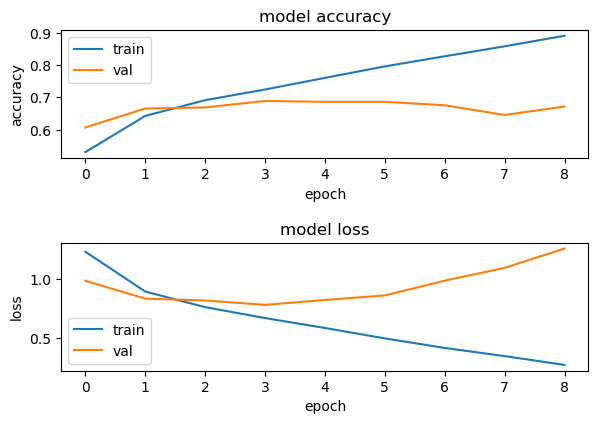

In [78]:
plot_history(history1_tuned_age7)

In [79]:
print("Accuracy: ", test_model(tuned_model1_age7, test_generator_age7)[1])

73/73 [==============================] - 223s 3s/step - loss: 0.7725 - categorical_accuracy: 0.6876
Accuracy:  0.6875802874565125


***************************************************************************************************************************

In [ ]:
tuned_model2_age7 = create_model(conv_filters=[(48, 3), (80, 3), (96, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(64,),
                    dropout_rate=0,
                    batch_normalization=False,
                    dense_kernel_regularizer='l2',
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age7)

In [76]:
history2_tuned_age7 = train_model(train_generator_age7, valid_generator_age7, tuned_model2_age7, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 868s 4s/step - loss: 1.4051 - categorical_accuracy: 0.5239 - val_loss: 1.2506 - val_categorical_accuracy: 0.5206
Epoch 2/15
234/234 [==============================] - 872s 4s/step - loss: 1.1076 - categorical_accuracy: 0.6073 - val_loss: 1.0723 - val_categorical_accuracy: 0.6255
Epoch 3/15
234/234 [==============================] - 851s 4s/step - loss: 1.0211 - categorical_accuracy: 0.6358 - val_loss: 0.9958 - val_categorical_accuracy: 0.6478
Epoch 4/15
234/234 [==============================] - 855s 4s/step - loss: 0.9620 - categorical_accuracy: 0.6531 - val_loss: 0.9632 - val_categorical_accuracy: 0.6569
Epoch 5/15
234/234 [==============================] - 864s 4s/step - loss: 0.9297 - categorical_accuracy: 0.6729 - val_loss: 1.0004 - val_categorical_accuracy: 0.6467
Epoch 6/15
234/234 [==============================] - 605s 3s/step - loss: 0.9110 - categorical_accuracy: 0.6844 - val_loss: 0.9203 - val_categorical_accuracy: 0.680

In [80]:
tuned_model2_age7.save("tuned_model2_age7.h5")

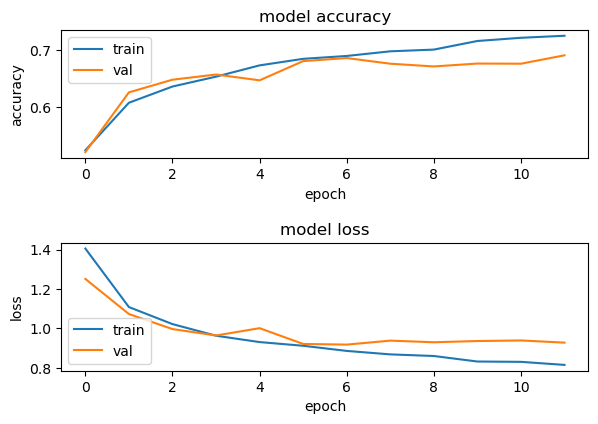

In [81]:
plot_history(history2_tuned_age7)

In [84]:
print("Accuracy: ", test_model(tuned_model2_age7, test_generator_age7)[1])

73/73 [==============================] - 66s 903ms/step - loss: 0.9119 - categorical_accuracy: 0.6694
Accuracy:  0.6693789958953857


***************************************************************************************************************************

In [85]:
tuned_model3_age7 = create_model(conv_filters=[(48, 3), (80, 3), (96, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(64,),
                    dropout_rate=0.2,
                    batch_normalization=False,
                    dense_kernel_regularizer=None,
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age7)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 48)      1344      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 99, 99, 48)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 99, 99, 48)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 80)        34640     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 48, 48, 80)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 80)       

In [86]:
history3_tuned_age7 = train_model(train_generator_age7, valid_generator_age7, tuned_model3_age7, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 759s 3s/step - loss: 1.4493 - categorical_accuracy: 0.4600 - val_loss: 1.1684 - val_categorical_accuracy: 0.5543
Epoch 2/15
234/234 [==============================] - 697s 3s/step - loss: 1.0680 - categorical_accuracy: 0.5778 - val_loss: 0.9715 - val_categorical_accuracy: 0.6162
Epoch 3/15
234/234 [==============================] - 717s 3s/step - loss: 0.9213 - categorical_accuracy: 0.6245 - val_loss: 0.9333 - val_categorical_accuracy: 0.6202
Epoch 4/15
234/234 [==============================] - 705s 3s/step - loss: 0.8342 - categorical_accuracy: 0.6575 - val_loss: 0.8725 - val_categorical_accuracy: 0.6384
Epoch 5/15
234/234 [==============================] - 698s 3s/step - loss: 0.7754 - categorical_accuracy: 0.6836 - val_loss: 0.8077 - val_categorical_accuracy: 0.6767
Epoch 6/15
234/234 [==============================] - 684s 3s/step - loss: 0.7267 - categorical_accuracy: 0.7048 - val_loss: 0.8051 - val_categorical_accuracy: 0.674

In [87]:
tuned_model3_age7.save("tuned_model3_age7.h5")

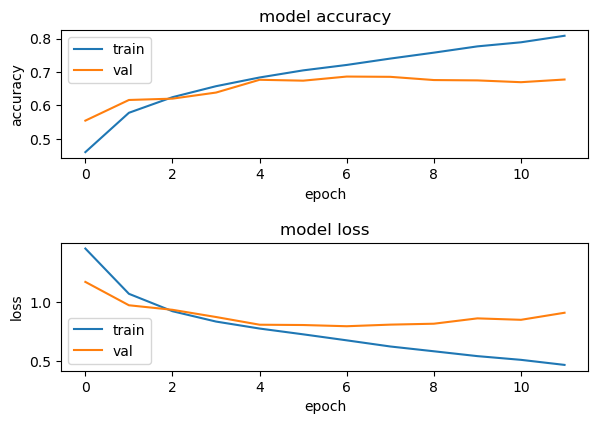

In [88]:
plot_history(history3_tuned_age7)

In [90]:
print("Accuracy: ", test_model(tuned_model3_age7, test_generator_age7)[1])

73/73 [==============================] - 67s 910ms/step - loss: 0.7770 - categorical_accuracy: 0.6919
Accuracy:  0.691862940788269


***************************************************************************************************************************

In [91]:
tuned_model4_age7 = create_model(conv_filters=[(48, 3), (80, 3), (96, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(64,),
                    dropout_rate=0.2,
                    batch_normalization=False,
                    dense_kernel_regularizer='l2',
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age7)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 198, 198, 48)      1344      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 99, 99, 48)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 99, 99, 48)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 97, 97, 80)        34640     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 48, 48, 80)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 48, 48, 80)       

In [92]:
history4_tuned_age7 = train_model(train_generator_age7, valid_generator_age7, tuned_model4_age7, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 697s 3s/step - loss: 1.7113 - categorical_accuracy: 0.4601 - val_loss: 1.3023 - val_categorical_accuracy: 0.5217
Epoch 2/15
234/234 [==============================] - 622s 3s/step - loss: 1.1845 - categorical_accuracy: 0.5642 - val_loss: 1.1031 - val_categorical_accuracy: 0.5913
Epoch 3/15
234/234 [==============================] - 633s 3s/step - loss: 1.1093 - categorical_accuracy: 0.5829 - val_loss: 1.0853 - val_categorical_accuracy: 0.6025
Epoch 4/15
234/234 [==============================] - 699s 3s/step - loss: 1.0568 - categorical_accuracy: 0.6062 - val_loss: 0.9933 - val_categorical_accuracy: 0.6320
Epoch 5/15
234/234 [==============================] - 648s 3s/step - loss: 1.0023 - categorical_accuracy: 0.6309 - val_loss: 0.9558 - val_categorical_accuracy: 0.6579
Epoch 6/15
234/234 [==============================] - 620s 3s/step - loss: 0.9667 - categorical_accuracy: 0.6425 - val_loss: 0.9553 - val_categorical_accuracy: 0.651

In [93]:
tuned_model4_age7.save("tuned_model4_age7.h5")

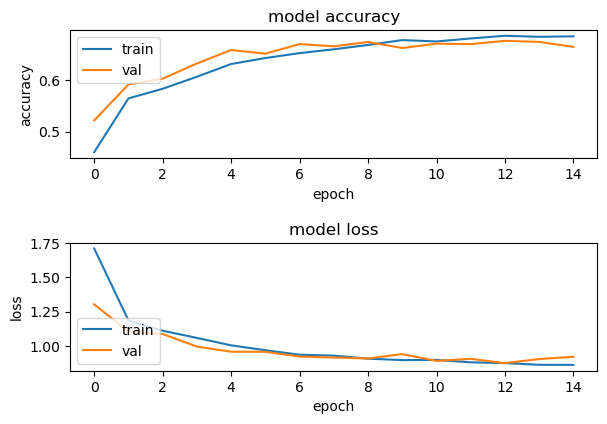

In [94]:
plot_history(history4_tuned_age7)

In [95]:
print("Accuracy: ", test_model(tuned_model4_age7, test_generator_age7)[1])

73/73 [==============================] - 58s 788ms/step - loss: 0.9221 - categorical_accuracy: 0.6732
Accuracy:  0.6732333898544312


***************************************************************************************************************************

### Results - tuned seven age groups

In [19]:
results_df[(results_df['category'] == 'age7') & (results_df['model'].str.startswith('tuned'))].sort_values('Accuracy', ascending=False)

model category              conv_layers Dropout  \
31  tuned_model3_age7     age7  (48, 3) (80, 3) (96, 3)     0.2   
29  tuned_model1_age7     age7  (48, 3) (80, 3) (96, 3)       0   
32  tuned_model4_age7     age7  (48, 3) (80, 3) (96, 3)     0.2   
30  tuned_model2_age7     age7  (48, 3) (80, 3) (96, 3)       0   

   BatchNormalization Dense layers sizes Dense kernel reg  Accuracy Remarks  
31               None             (64, )             None    0.6919     NaN  
29               None             (64, )             None    0.6875     NaN  
32               None             (64, )               l2    0.6732     NaN  
30               None             (64, )               l2    0.6694     NaN

***************************************************************************************************************************

<a id="32"></a>
### 8.3.3 Eight age groups
[back to the top](#0)

In [67]:
def build_tuner_model_age8(hp):
    model = Sequential()
    
    # Convolution 
    model.add(Conv2D(filters=hp.Int('conv_1_filter', min_value=16, max_value=48, step=16),
                kernel_size=3,
                activation="relu",
                input_shape=(200,200,3)))
    model.add(MaxPool2D(pool_size=2))
    
    model.add(Conv2D(filters=hp.Int('conv_2_filter', min_value=48, max_value=96, step=16),
                kernel_size=3,
                activation='relu'))
    model.add(MaxPool2D(pool_size=2))
        
    model.add(Conv2D(filters=hp.Int('conv_3_filter', min_value=96, max_value=160, step=32),
                    kernel_size=3,
                    activation='relu'))
    model.add(MaxPool2D(pool_size=2))

    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_1_units', min_value=32, max_value=128, step=32),activation='relu'))
    
    # Output layer
    model.add(Dense(units=8,activation='softmax'))
    
    model.compile(optimizer=Adam(1e-3),
                  loss='categorical_crossentropy',metrics=['categorical_accuracy'])
    return model

In [68]:
tuner_age8 = RandomSearch(build_tuner_model_age8, 
                           objective=kt.Objective("val_categorical_accuracy", direction = "max"), 
                           max_trials=25, 
                           executions_per_trial=1, 
                           directory='trials_age8', 
                           project_name='age_gender_race')

INFO:tensorflow:Reloading Tuner from trials_age8\age_gender_race\tuner0.json


In [70]:
tuner_age8.search(train_generator_age8,
              validation_data=valid_generator_age8, 
              epochs=5, 
              batch_size=64)

Trial 25 Complete [00h 52m 30s]
val_categorical_accuracy: 0.5570128560066223

Best val_categorical_accuracy So Far: 0.5728051662445068
Total elapsed time: 03h 22m 53s
INFO:tensorflow:Oracle triggered exit


In [71]:
tuner_age8.results_summary()

Results summary
Results in trials_age8\age_gender_race
Showing 10 best trials
Objective(name="val_categorical_accuracy", direction="max")

Trial 00 summary
Hyperparameters:
conv_1_filter: 48
conv_2_filter: 96
conv_3_filter: 160
dense_1_units: 128
Score: 0.5728051662445068

Trial 15 summary
Hyperparameters:
conv_1_filter: 16
conv_2_filter: 80
conv_3_filter: 160
dense_1_units: 64
Score: 0.5655781626701355

Trial 09 summary
Hyperparameters:
conv_1_filter: 32
conv_2_filter: 80
conv_3_filter: 128
dense_1_units: 128
Score: 0.5612955093383789

Trial 21 summary
Hyperparameters:
conv_1_filter: 48
conv_2_filter: 48
conv_3_filter: 128
dense_1_units: 64
Score: 0.5599571466445923

Trial 05 summary
Hyperparameters:
conv_1_filter: 32
conv_2_filter: 64
conv_3_filter: 128
dense_1_units: 96
Score: 0.5580835342407227

Trial 18 summary
Hyperparameters:
conv_1_filter: 16
conv_2_filter: 64
conv_3_filter: 160
dense_1_units: 128
Score: 0.5575481653213501

Trial 03 summary
Hyperparameters:
conv_1_filter: 16
co

In [72]:
# creating model with best hyperparameters based on results of Keras Tuner
best_hp = tuner_age8.get_best_hyperparameters()[0]
tuned_model1_age8 = build_tuner_model_age8(best_hp)
tuned_model1_age8.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 48)      1344      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 48)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 96)        41568     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 96)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 46, 160)       138400    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 160)     

In [73]:
history1_tuned_age8 = train_model(train_generator_age8, valid_generator_age8, tuned_model1_age8, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 744s 3s/step - loss: 1.6342 - categorical_accuracy: 0.4145 - val_loss: 1.3697 - val_categorical_accuracy: 0.4853
Epoch 2/15
234/234 [==============================] - 705s 3s/step - loss: 1.2661 - categorical_accuracy: 0.5118 - val_loss: 1.2117 - val_categorical_accuracy: 0.5308
Epoch 3/15
234/234 [==============================] - 728s 3s/step - loss: 1.1208 - categorical_accuracy: 0.5626 - val_loss: 1.1523 - val_categorical_accuracy: 0.5487
Epoch 4/15
234/234 [==============================] - 747s 3s/step - loss: 1.0278 - categorical_accuracy: 0.5946 - val_loss: 1.1490 - val_categorical_accuracy: 0.5436
Epoch 5/15
234/234 [==============================] - 749s 3s/step - loss: 0.9379 - categorical_accuracy: 0.6277 - val_loss: 1.0946 - val_categorical_accuracy: 0.5642
Epoch 6/15
234/234 [==============================] - 756s 3s/step - loss: 0.8631 - categorical_accuracy: 0.6574 - val_loss: 1.1991 - val_categorical_accuracy: 0.531

In [74]:
tuned_model1_age8.save("tuned_model1_age8.h5")

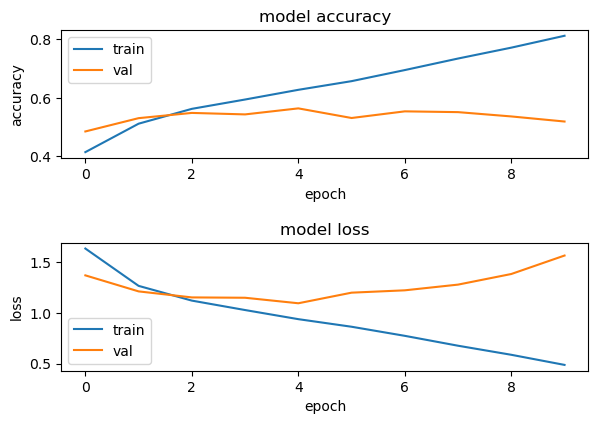

In [75]:
plot_history(history1_tuned_age8)

In [76]:
print("Accuracy: ", test_model(tuned_model1_age8, test_generator_age8)[1])

73/73 [==============================] - 76s 1s/step - loss: 1.0858 - categorical_accuracy: 0.5694
Accuracy:  0.5693790316581726


***************************************************************************************************************************

In [77]:
tuned_model2_age8 = create_model(conv_filters=[(48, 3), (96, 3), (160, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(128,),
                    dropout_rate=0,
                    batch_normalization=False,
                    dense_kernel_regularizer='l2',
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age8)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 48)      1344      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 99, 99, 48)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 96)        41568     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 48, 48, 96)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 46, 46, 160)       138400    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 23, 23, 160)     

In [78]:
history2_tuned_age8 = train_model(train_generator_age8, valid_generator_age8, tuned_model2_age8, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 780s 3s/step - loss: 2.0130 - categorical_accuracy: 0.4099 - val_loss: 1.5953 - val_categorical_accuracy: 0.4676
Epoch 2/15
234/234 [==============================] - 781s 3s/step - loss: 1.4594 - categorical_accuracy: 0.4922 - val_loss: 1.4597 - val_categorical_accuracy: 0.4786
Epoch 3/15
234/234 [==============================] - 778s 3s/step - loss: 1.3681 - categorical_accuracy: 0.5195 - val_loss: 1.3617 - val_categorical_accuracy: 0.5153
Epoch 4/15
234/234 [==============================] - 779s 3s/step - loss: 1.3164 - categorical_accuracy: 0.5304 - val_loss: 1.3115 - val_categorical_accuracy: 0.5348
Epoch 5/15
234/234 [==============================] - 779s 3s/step - loss: 1.2682 - categorical_accuracy: 0.5474 - val_loss: 1.3426 - val_categorical_accuracy: 0.5294
Epoch 6/15
234/234 [==============================] - 783s 3s/step - loss: 1.2489 - categorical_accuracy: 0.5543 - val_loss: 1.2930 - val_categorical_accuracy: 0.530

In [79]:
tuned_model2_age8.save("tuned_model2_age8.h5")

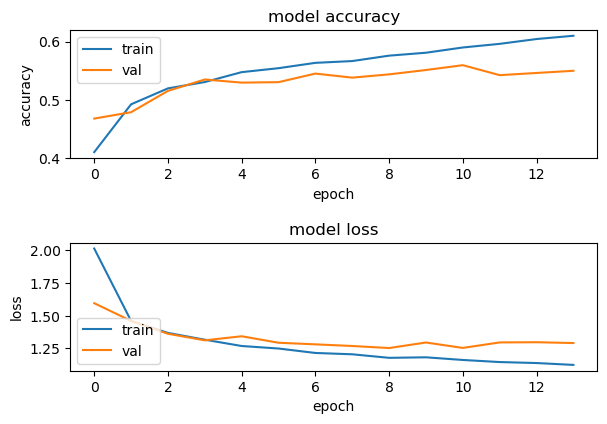

In [80]:
plot_history(history2_tuned_age8)

In [81]:
print("Accuracy: ", test_model(tuned_model2_age8, test_generator_age8)[1])

73/73 [==============================] - 76s 1s/step - loss: 1.2396 - categorical_accuracy: 0.5602
Accuracy:  0.5601713061332703


***************************************************************************************************************************

In [71]:
tuned_model3_age8 = create_model(conv_filters=[(48, 3), (96, 3), (160, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(128,),
                    dropout_rate=0.25,
                    batch_normalization=False,
                    dense_kernel_regularizer=None,
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age8)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 48)      1344      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 48)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 48)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 96)        41568     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 96)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 96)        0

In [72]:
history3_tuned_age8 = train_model(train_generator_age8, valid_generator_age8, tuned_model3_age8, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 1164s 5s/step - loss: 1.8379 - categorical_accuracy: 0.3805 - val_loss: 1.4620 - val_categorical_accuracy: 0.4569
Epoch 2/15
234/234 [==============================] - 1392s 6s/step - loss: 1.4052 - categorical_accuracy: 0.4704 - val_loss: 1.3998 - val_categorical_accuracy: 0.4607
Epoch 3/15
234/234 [==============================] - 1140s 5s/step - loss: 1.3200 - categorical_accuracy: 0.4974 - val_loss: 1.3050 - val_categorical_accuracy: 0.5035
Epoch 4/15
234/234 [==============================] - 1128s 5s/step - loss: 1.2656 - categorical_accuracy: 0.5184 - val_loss: 1.2341 - val_categorical_accuracy: 0.5171
Epoch 5/15
234/234 [==============================] - 1119s 5s/step - loss: 1.2177 - categorical_accuracy: 0.5317 - val_loss: 1.2095 - val_categorical_accuracy: 0.5214
Epoch 6/15
234/234 [==============================] - 1123s 5s/step - loss: 1.1825 - categorical_accuracy: 0.5394 - val_loss: 1.1786 - val_categorical_accuracy:

In [73]:
tuned_model3_age8.save("tuned_model3_age8.h5")

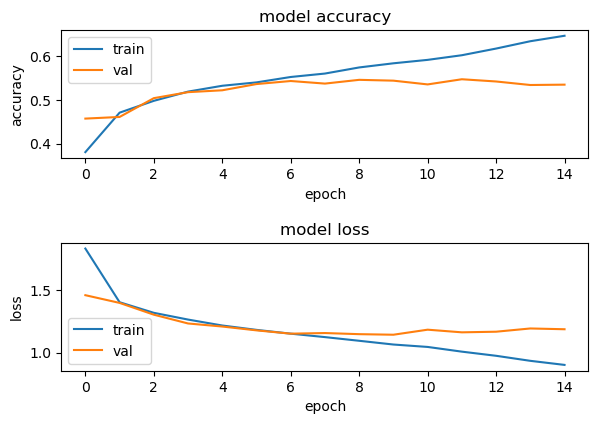

In [74]:
plot_history(history3_tuned_age8)

In [75]:
print("Accuracy: ", test_model(tuned_model3_age8, test_generator_age8)[1])

73/73 [==============================] - 100s 1s/step - loss: 1.1398 - categorical_accuracy: 0.5428
Accuracy:  0.5428265333175659


***************************************************************************************************************************

In [67]:
tuned_model4_age8 = create_model(conv_filters=[(48, 3), (96, 3), (160, 3)], 
                    pooling=(2, 2), 
                    dense_layer_sizes=(128,),
                    dropout_rate=0.25,
                    batch_normalization=False,
                    dense_kernel_regularizer='l2',
                    input_shape=(h, w, 3), 
                    no_of_classes=n_classes_age8)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 48)      1344      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 48)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 48)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 96)        41568     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 96)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 96)        0

In [68]:
history4_tuned_age8 = train_model(train_generator_age8, valid_generator_age8, tuned_model4_age8, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 1075s 5s/step - loss: 2.3251 - categorical_accuracy: 0.3366 - val_loss: 1.7289 - val_categorical_accuracy: 0.4060
Epoch 2/15
234/234 [==============================] - 1013s 4s/step - loss: 1.6076 - categorical_accuracy: 0.4396 - val_loss: 1.5801 - val_categorical_accuracy: 0.4625
Epoch 3/15
234/234 [==============================] - 1009s 4s/step - loss: 1.5150 - categorical_accuracy: 0.4676 - val_loss: 1.4532 - val_categorical_accuracy: 0.4743
Epoch 4/15
234/234 [==============================] - 1014s 4s/step - loss: 1.4586 - categorical_accuracy: 0.4825 - val_loss: 1.4700 - val_categorical_accuracy: 0.4890
Epoch 5/15
234/234 [==============================] - 1013s 4s/step - loss: 1.4052 - categorical_accuracy: 0.4973 - val_loss: 1.3637 - val_categorical_accuracy: 0.5075
Epoch 6/15
234/234 [==============================] - 1017s 4s/step - loss: 1.3723 - categorical_accuracy: 0.5115 - val_loss: 1.3680 - val_categorical_accuracy:

In [69]:
tuned_model4_age8.save("tuned_model4_age8.h5")

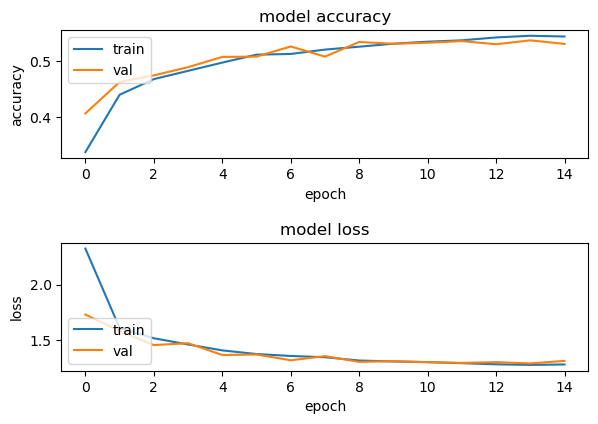

In [70]:
plot_history(history4_tuned_age8)

In [71]:
print("Accuracy: ", test_model(tuned_model4_age8, test_generator_age8)[1])

73/73 [==============================] - 90s 1s/step - loss: 1.3030 - categorical_accuracy: 0.5334
Accuracy:  0.5334047079086304


***************************************************************************************************************************

### Results - tuned eight age groups

In [20]:
results_df[(results_df['category'] == 'age8') & (results_df['model'].str.startswith('tuned'))].sort_values('Accuracy', ascending=False)

model category               conv_layers Dropout  \
33  tuned_model1_age8     age8  (48, 3) (96, 3) (160, 3)       0   
34  tuned_model2_age8     age8  (48, 3) (96, 3) (160, 3)       0   
35  tuned_model3_age8     age8  (48, 3) (96, 3) (160, 3)    0.25   
36  tuned_model4_age8     age8  (48, 3) (96, 3) (160, 3)    0.25   

   BatchNormalization Dense layers sizes Dense kernel reg  Accuracy Remarks  
33               None            (128, )             None    0.5694     NaN  
34               None            (128, )               l2    0.5602     NaN  
35               None            (128, )             None    0.5428     NaN  
36               None            (128, )               l2    0.5334     NaN

***************************************************************************************************************************

<a id="33"></a>
### 8.3.4 Gender
[back to the top](#0)

In [67]:
def build_tuner_model_gender(hp):
    model = Sequential()
    
    # Convolution 
    model.add(Conv2D(filters=hp.Int('conv_1_filter', min_value=16, max_value=128, step=16),
                kernel_size=3,
                activation="relu",
                input_shape=(200,200,3)))
    
    model.add(MaxPool2D(pool_size=2))
    
    if hp.Boolean("dropout"):
        model.add(Dropout(hp.Choice('drop_rate', values = [0.2, 0.4])))
    
    
    model.add(Conv2D(filters=hp.Int('conv_2_filter', min_value=16, max_value=128, step=16),
                kernel_size=3,
                activation='relu'))
    # pooling
    model.add(MaxPool2D(pool_size=2))
    if hp.Boolean("dropout"):
        model.add(Dropout(hp.Choice('drop_rate', values = [0.2, 0.4])))
        
    # Convolution
    
    model.add(Conv2D(filters=hp.Int('conv_3_filter', min_value=16, max_value=128, step=16),
                    kernel_size=3,
                    activation='relu'))
    model.add(MaxPool2D(pool_size=2))
    if hp.Boolean("dropout"):
        model.add(Dropout(hp.Choice('drop_rate', values = [0.2, 0.4])))

    if hp.Boolean("4th_conv_layer"):    
        model.add(Conv2D(filters=hp.Int('conv_4_filter', min_value=16, max_value=128, step=16),
                kernel_size=3,
                activation='relu'))
        model.add(MaxPool2D(pool_size=2))
        if hp.Boolean("dropout"):
            model.add(Dropout(hp.Choice('drop_rate', values = [0.2, 0.4])))

    #flattening
    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_1_units', min_value=16, max_value=128, step=16),activation='relu'))
    
    # Output layer
    model.add(Dense(units=1,activation='sigmoid'))
    
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-3, 1e-4])),
                  loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [68]:
tuner_gender1 = RandomSearch(
    build_tuner_model_gender,
    objective=kt.Objective("val_accuracy", direction = "max"),
    max_trials=25,
    executions_per_trial=1,
    directory='trials_gender1',
    project_name='age_gender_race')

INFO:tensorflow:Reloading Tuner from trials_gender1\age_gender_race\tuner0.json


In [49]:
tuner_gender1.search(train_generator,
              validation_data=valid_generator, 
              epochs=5, 
              batch_size=64)

Trial 25 Complete [00h 12m 11s]
val_accuracy: 0.833289384841919

Best val_accuracy So Far: 0.8989712595939636
Total elapsed time: 04h 29m 07s
INFO:tensorflow:Oracle triggered exit


In [69]:
tuner_gender1.results_summary()

Results summary
Results in trials_gender1\age_gender_race
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 08 summary
Hyperparameters:
conv_1_filter: 32
dropout: False
conv_2_filter: 112
conv_3_filter: 112
4th_conv_layer: False
dense_1_units: 64
learning_rate: 0.0001
conv_4_filter: 32
drop_rate: 0.4
Score: 0.8989712595939636

Trial 03 summary
Hyperparameters:
conv_1_filter: 80
dropout: False
conv_2_filter: 112
conv_3_filter: 96
4th_conv_layer: False
dense_1_units: 96
learning_rate: 0.001
conv_4_filter: 48
drop_rate: 0.2
Score: 0.89527827501297

Trial 05 summary
Hyperparameters:
conv_1_filter: 48
dropout: False
conv_2_filter: 64
conv_3_filter: 96
4th_conv_layer: False
dense_1_units: 48
learning_rate: 0.0001
conv_4_filter: 48
drop_rate: 0.2
Score: 0.8944869637489319

Trial 13 summary
Hyperparameters:
conv_1_filter: 48
dropout: False
conv_2_filter: 96
conv_3_filter: 112
4th_conv_layer: True
dense_1_units: 48
learning_rate: 0.001
conv_4_filter: 128
drop_rate: 0

In [70]:
# creating model with best hyperparameters based on results of Keras Tuner
best_hp_gender1 = tuner_gender1.get_best_hyperparameters()[0]
tuned_model1_gender = build_tuner_model_gender(best_hp_gender1)
tuned_model1_gender.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 112)       32368     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 112)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 112)       113008    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 112)      0

In [71]:
history1_tuned_gender = train_model(train_generator_gend, valid_generator_gend, 
                                    tuned_model1_gender, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 613s 3s/step - loss: 0.5150 - accuracy: 0.7451 - val_loss: 0.3733 - val_accuracy: 0.8442
Epoch 2/15
234/234 [==============================] - 632s 3s/step - loss: 0.3422 - accuracy: 0.8541 - val_loss: 0.3304 - val_accuracy: 0.8638
Epoch 3/15
234/234 [==============================] - 645s 3s/step - loss: 0.3059 - accuracy: 0.8694 - val_loss: 0.2949 - val_accuracy: 0.8790
Epoch 4/15
234/234 [==============================] - 613s 3s/step - loss: 0.2788 - accuracy: 0.8832 - val_loss: 0.2789 - val_accuracy: 0.8841
Epoch 5/15
234/234 [==============================] - 617s 3s/step - loss: 0.2681 - accuracy: 0.8885 - val_loss: 0.2773 - val_accuracy: 0.8830
Epoch 6/15
234/234 [==============================] - 659s 3s/step - loss: 0.2529 - accuracy: 0.8949 - val_loss: 0.2570 - val_accuracy: 0.8927
Epoch 7/15
234/234 [==============================] - 615s 3s/step - loss: 0.2464 - accuracy: 0.8987 - val_loss: 0.2531 - val_accuracy: 0.8953

In [72]:
tuned_model1_gender.save("tuned_model1_gender.h5")

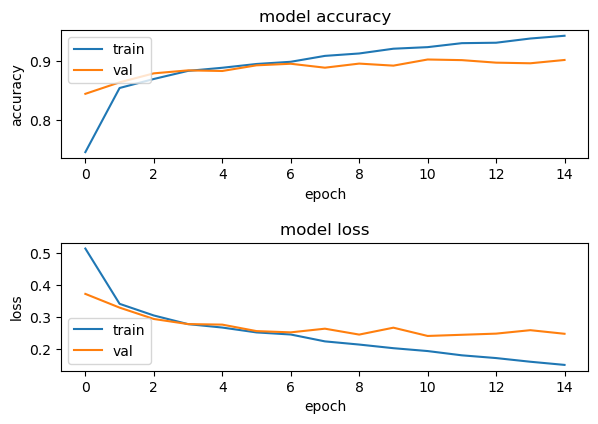

In [73]:
plot_history(history1_tuned_gender)

In [74]:
print("Accuracy: ", test_model(tuned_model1_gender, test_generator_gend)[1])

73/73 [==============================] - 60s 820ms/step - loss: 0.2567 - accuracy: 0.8979
Accuracy:  0.8978586792945862


***************************************************************************************************************************

In [75]:
#adding kernel regularizer
tuned_model2_gender = create_model(conv_filters=[(32, 3), (112, 3), (112, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(64,),
                             dropout_rate=0,
                             input_shape=(h, w, 3),
                             no_of_classes=1,
                             batch_normalization=False,
                             conv_kernel_regularizer=None,
                             dense_kernel_regularizer='l2',
                             learning_rate=0.0001,       
                             output_fun="sigmoid",
                             loss="binary_crossentropy", 
                             metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 112)       32368     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 112)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 46, 112)       113008    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 112)     

In [76]:
history2_tuned_gender = train_model(train_generator_gend, valid_generator_gend, 
                                    tuned_model2_gender, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 600s 3s/step - loss: 0.7925 - accuracy: 0.7521 - val_loss: 0.4699 - val_accuracy: 0.8514
Epoch 2/15
234/234 [==============================] - 596s 3s/step - loss: 0.4422 - accuracy: 0.8482 - val_loss: 0.4025 - val_accuracy: 0.8675
Epoch 3/15
234/234 [==============================] - 594s 3s/step - loss: 0.3772 - accuracy: 0.8689 - val_loss: 0.3738 - val_accuracy: 0.8667
Epoch 4/15
234/234 [==============================] - 595s 3s/step - loss: 0.3447 - accuracy: 0.8778 - val_loss: 0.3473 - val_accuracy: 0.8766
Epoch 5/15
234/234 [==============================] - 637s 3s/step - loss: 0.3190 - accuracy: 0.8890 - val_loss: 0.3234 - val_accuracy: 0.8865
Epoch 6/15
234/234 [==============================] - 603s 3s/step - loss: 0.2989 - accuracy: 0.8950 - val_loss: 0.3006 - val_accuracy: 0.8940
Epoch 7/15
234/234 [==============================] - 601s 3s/step - loss: 0.2915 - accuracy: 0.8982 - val_loss: 0.3047 - val_accuracy: 0.8900

In [77]:
tuned_model2_gender.save("tuned_model2_gender.h5")

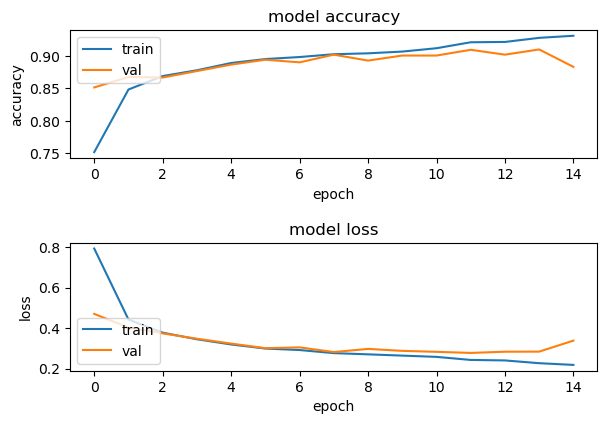

In [78]:
plot_history(history2_tuned_gender)

In [79]:
print("Accuracy: ", test_model(tuned_model2_gender, test_generator_gend)[1])

73/73 [==============================] - 60s 813ms/step - loss: 0.3507 - accuracy: 0.8737
Accuracy:  0.8736616969108582


***************************************************************************************************************************

In [80]:
#adding dropout
tuned_model3_gender = create_model(conv_filters=[(32, 3), (112, 3), (112, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(64,),
                             dropout_rate=0.25,
                             input_shape=(h, w, 3),
                             no_of_classes=1,
                             batch_normalization=False,
                             conv_kernel_regularizer=None,
                             dense_kernel_regularizer=None,
                             learning_rate=0.0001,       
                             output_fun="sigmoid",
                             loss="binary_crossentropy", 
                             metrics=["accuracy"])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 99, 99, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 112)       32368     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 48, 48, 112)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 112)      

In [81]:
history3_tuned_gender = train_model(train_generator_gend, valid_generator_gend, 
                                    tuned_model3_gender, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 685s 3s/step - loss: 0.5575 - accuracy: 0.7127 - val_loss: 0.5352 - val_accuracy: 0.8073
Epoch 2/15
234/234 [==============================] - 667s 3s/step - loss: 0.3906 - accuracy: 0.8270 - val_loss: 0.4290 - val_accuracy: 0.8386
Epoch 3/15
234/234 [==============================] - 667s 3s/step - loss: 0.3449 - accuracy: 0.8498 - val_loss: 0.4090 - val_accuracy: 0.8498
Epoch 4/15
234/234 [==============================] - 668s 3s/step - loss: 0.3154 - accuracy: 0.8654 - val_loss: 0.3664 - val_accuracy: 0.8696
Epoch 5/15
234/234 [==============================] - 667s 3s/step - loss: 0.2986 - accuracy: 0.8705 - val_loss: 0.3327 - val_accuracy: 0.8691
Epoch 6/15
234/234 [==============================] - 666s 3s/step - loss: 0.2824 - accuracy: 0.8809 - val_loss: 0.3316 - val_accuracy: 0.8729
Epoch 7/15
234/234 [==============================] - 670s 3s/step - loss: 0.2736 - accuracy: 0.8856 - val_loss: 0.3117 - val_accuracy: 0.8779

In [82]:
tuned_model3_gender.save("tuned_model3_gender.h5")

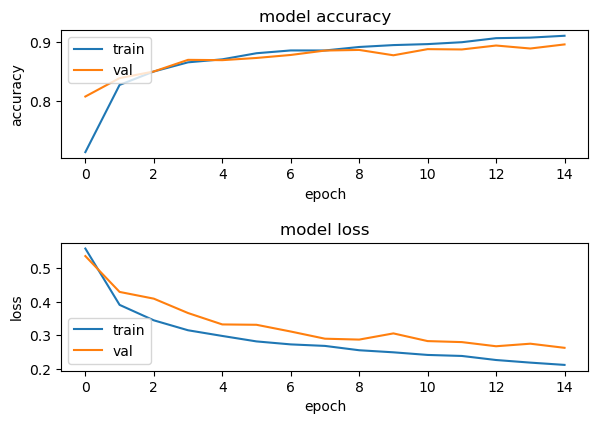

In [83]:
plot_history(history3_tuned_gender)

In [84]:
print("Accuracy: ", test_model(tuned_model3_gender, test_generator_gend)[1])

73/73 [==============================] - 60s 816ms/step - loss: 0.2803 - accuracy: 0.8854
Accuracy:  0.8854389786720276


***************************************************************************************************************************

In [67]:
#adding dropout and kernel regularizer together
tuned_model4_gender = create_model(conv_filters=[(32, 3), (112, 3), (112, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(64,),
                             dropout_rate=0.25,
                             input_shape=(h, w, 3),
                             no_of_classes=1,
                             batch_normalization=False,
                             conv_kernel_regularizer=None,
                             dense_kernel_regularizer="l2",
                             learning_rate=0.0001,       
                             output_fun="sigmoid",
                             loss="binary_crossentropy", 
                             metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 112)       32368     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 112)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 112)       0

In [68]:
history4_tuned_gender = train_model(train_generator_gend, valid_generator_gend, 
                                    tuned_model4_gender, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 921s 4s/step - loss: 1.0595 - accuracy: 0.7178 - val_loss: 0.7816 - val_accuracy: 0.7784
Epoch 2/15
234/234 [==============================] - 918s 4s/step - loss: 0.6219 - accuracy: 0.8202 - val_loss: 0.6013 - val_accuracy: 0.8509
Epoch 3/15
234/234 [==============================] - 916s 4s/step - loss: 0.5066 - accuracy: 0.8480 - val_loss: 0.5438 - val_accuracy: 0.8453
Epoch 4/15
234/234 [==============================] - 919s 4s/step - loss: 0.4476 - accuracy: 0.8601 - val_loss: 0.4419 - val_accuracy: 0.8787
Epoch 5/15
234/234 [==============================] - 912s 4s/step - loss: 0.4002 - accuracy: 0.8700 - val_loss: 0.4151 - val_accuracy: 0.8734
Epoch 6/15
234/234 [==============================] - 898s 4s/step - loss: 0.3751 - accuracy: 0.8755 - val_loss: 0.3858 - val_accuracy: 0.8779
Epoch 7/15
234/234 [==============================] - 891s 4s/step - loss: 0.3539 - accuracy: 0.8769 - val_loss: 0.3612 - val_accuracy: 0.8833

In [69]:
tuned_model4_gender.save("tuned_model4_gender.h5")

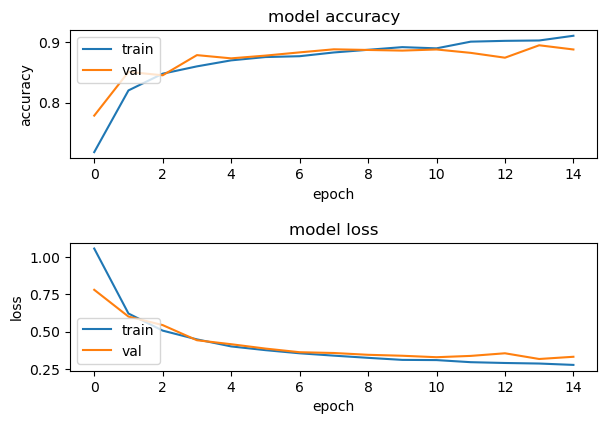

In [70]:
plot_history(history4_tuned_gender)

In [71]:
print("Accuracy: ", test_model(tuned_model4_gender, test_generator_gend)[1])

73/73 [==============================] - 84s 1s/step - loss: 0.3320 - accuracy: 0.8854
Accuracy:  0.8854389786720276


***************************************************************************************************************************

### Results - tuned gender

In [21]:
results_df[(results_df['category'] == 'gender') & (results_df['model'].str.startswith('tuned'))].sort_values('Accuracy', ascending=False)

model category                conv_layers Dropout  \
37  tuned_model1_gender   gender  (32, 3) (112, 3) (112, 3)       0   
39  tuned_model3_gender   gender  (32, 3) (112, 3) (112, 3)    0.25   
40  tuned_model4_gender   gender  (32, 3) (112, 3) (112, 3)    0.25   
38  tuned_model2_gender   gender  (32, 3) (112, 3) (112, 3)       0   

   BatchNormalization Dense layers sizes Dense kernel reg  Accuracy Remarks  
37               None             (64, )             None    0.8978     NaN  
39               None             (64, )             None    0.8854     NaN  
40               None             (64, )               l2    0.8854     NaN  
38               None             (64, )               l2    0.8737     NaN

***************************************************************************************************************************

<a id="34"></a>
### 8.3.5 Race
[back to the top](#0)

In [72]:
def build_tuner_model_race(hp):
    model = Sequential()
    
    # Convolution 
    model.add(Conv2D(filters=hp.Int('conv_1_filter', min_value=16, max_value=128, step=16),
                kernel_size=3,
                activation="relu",
                input_shape=(200,200,3)))
    
    model.add(MaxPool2D(pool_size=2))
    
    if hp.Boolean("dropout"):
        model.add(Dropout(hp.Choice('drop_rate', values = [0.2, 0.4])))
    
    
    model.add(Conv2D(filters=hp.Int('conv_2_filter', min_value=16, max_value=128, step=16),
                kernel_size=3,
                activation='relu'))
    # pooling
    model.add(MaxPool2D(pool_size=2))
    if hp.Boolean("dropout"):
        model.add(Dropout(hp.Choice('drop_rate', values = [0.2, 0.4])))
        
    # Convolution
    
    model.add(Conv2D(filters=hp.Int('conv_3_filter', min_value=16, max_value=128, step=16),
                    kernel_size=3,
                    activation='relu'))
    model.add(MaxPool2D(pool_size=2))
    if hp.Boolean("dropout"):
        model.add(Dropout(hp.Choice('drop_rate', values = [0.2, 0.4])))

    if hp.Boolean("4th_conv_layer"):    
        model.add(Conv2D(filters=hp.Int('conv_4_filter', min_value=16, max_value=128, step=16),
                kernel_size=3,
                activation='relu'))
        model.add(MaxPool2D(pool_size=2))
        if hp.Boolean("dropout"):
            model.add(Dropout(hp.Choice('drop_rate', values = [0.2, 0.4])))

    #flattening
    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_1_units', min_value=16, max_value=128, step=16),activation='relu'))
    
    # Output layer
    model.add(Dense(units=5,activation='softmax'))
    
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-3, 1e-4])),
                  loss='categorical_crossentropy',metrics=['categorical_accuracy'])
    return model

In [77]:
tuner_race1 = RandomSearch(
    build_tuner_model_race,
    objective=kt.Objective("val_categorical_accuracy", direction = "max"),
    max_trials=25,
    executions_per_trial=1,
    directory='trials_race1',
    project_name='age_gender_race')

INFO:tensorflow:Reloading Tuner from trials_race1\age_gender_race\tuner0.json


In [ ]:
tuner_race1.search(train_generator_race,
              validation_data=valid_generator_race, 
              epochs=5, 
              batch_size=64)

In [78]:
tuner_race1.results_summary()

Results summary
Results in trials_race1\age_gender_race
Showing 10 best trials
Objective(name="val_categorical_accuracy", direction="max")

Trial 10 summary
Hyperparameters:
conv_1_filter: 16
dropout: False
conv_2_filter: 16
conv_3_filter: 128
4th_conv_layer: False
dense_1_units: 32
learning_rate: 0.001
conv_4_filter: 112
drop_rate: 0.4
Score: 0.7941648960113525

Trial 05 summary
Hyperparameters:
conv_1_filter: 16
dropout: False
conv_2_filter: 48
conv_3_filter: 80
4th_conv_layer: False
dense_1_units: 64
learning_rate: 0.001
conv_4_filter: 32
Score: 0.7815845608711243

Trial 08 summary
Hyperparameters:
conv_1_filter: 16
dropout: True
conv_2_filter: 128
conv_3_filter: 80
4th_conv_layer: False
dense_1_units: 32
learning_rate: 0.001
conv_4_filter: 64
drop_rate: 0.2
Score: 0.7778372764587402

Trial 20 summary
Hyperparameters:
conv_1_filter: 64
dropout: False
conv_2_filter: 16
conv_3_filter: 16
4th_conv_layer: False
dense_1_units: 128
learning_rate: 0.001
conv_4_filter: 112
drop_rate: 0.4
Sc

In [100]:
# creating model with best hyperparameters based on results of Keras Tuner
best_hp_race1 = tuner_race1.get_best_hyperparameters()[0]
tuned_model1_race = build_tuner_model_race(best_hp_race1)
tuned_model1_race.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 97, 97, 16)        2320      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 48, 48, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 46, 46, 128)       18560     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 23, 23, 128)    

In [101]:
history1_tned_race = train_model(train_generator_race, valid_generator_race, tuned_model1_race, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 112s 476ms/step - loss: 1.1788 - categorical_accuracy: 0.5553 - val_loss: 0.9110 - val_categorical_accuracy: 0.6858
Epoch 2/15
234/234 [==============================] - 123s 524ms/step - loss: 0.7835 - categorical_accuracy: 0.7259 - val_loss: 0.7468 - val_categorical_accuracy: 0.7446
Epoch 3/15
234/234 [==============================] - 110s 469ms/step - loss: 0.6605 - categorical_accuracy: 0.7680 - val_loss: 0.6815 - val_categorical_accuracy: 0.7687
Epoch 4/15
234/234 [==============================] - 113s 483ms/step - loss: 0.5724 - categorical_accuracy: 0.8005 - val_loss: 0.6675 - val_categorical_accuracy: 0.7848
Epoch 5/15
234/234 [==============================] - 113s 483ms/step - loss: 0.4968 - categorical_accuracy: 0.8268 - val_loss: 0.6855 - val_categorical_accuracy: 0.7762
Epoch 6/15
234/234 [==============================] - 111s 473ms/step - loss: 0.4138 - categorical_accuracy: 0.8546 - val_loss: 0.7431 - val_categoric

In [102]:
tuned_model1_race.save("tuned_model1_race.h5")

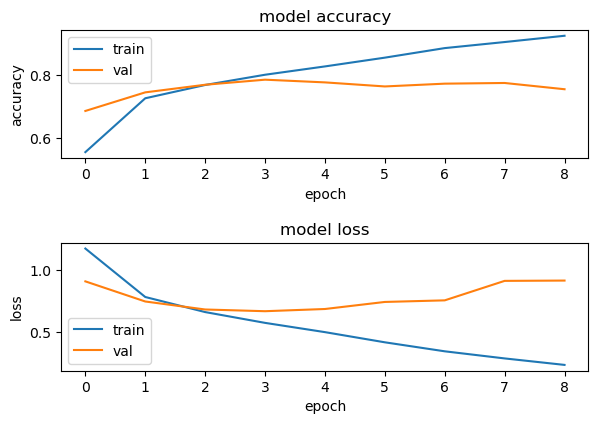

In [103]:
plot_history(history1_tned_race)

In [104]:
print("Accuracy: ", test_model(tuned_model1_race, test_generator_race)[1])

73/73 [==============================] - 12s 160ms/step - loss: 0.6469 - categorical_accuracy: 0.7777
Accuracy:  0.7777301669120789


***************************************************************************************************************************

In [108]:
# adding kernel regularizer
tuned_model2_race = create_model(conv_filters=[(16, 3), (16, 3), (128, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(32,),
                             dropout_rate=0,
                             input_shape=(h, w, 3),
                             no_of_classes=n_classes_race,
                             batch_normalization=False,
                             conv_kernel_regularizer=None,
                             dense_kernel_regularizer='l2',
                             loss="categorical_crossentropy", 
                             metrics=["categorical_accuracy"])

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 97, 97, 16)        2320      
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 48, 48, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 46, 46, 128)       18560     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 23, 23, 128)    

In [109]:
history2_tuned_race = train_model(train_generator_race, valid_generator_race, tuned_model2_race, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 119s 506ms/step - loss: 1.2847 - categorical_accuracy: 0.5729 - val_loss: 0.9954 - val_categorical_accuracy: 0.7168
Epoch 2/15
234/234 [==============================] - 116s 497ms/step - loss: 1.0173 - categorical_accuracy: 0.6924 - val_loss: 0.9790 - val_categorical_accuracy: 0.6986
Epoch 3/15
234/234 [==============================] - 114s 487ms/step - loss: 0.9156 - categorical_accuracy: 0.7326 - val_loss: 0.8885 - val_categorical_accuracy: 0.7374
Epoch 4/15
234/234 [==============================] - 112s 477ms/step - loss: 0.8801 - categorical_accuracy: 0.7432 - val_loss: 0.9332 - val_categorical_accuracy: 0.7270
Epoch 5/15
234/234 [==============================] - 111s 476ms/step - loss: 0.8467 - categorical_accuracy: 0.7570 - val_loss: 0.8889 - val_categorical_accuracy: 0.7382
Epoch 6/15
234/234 [==============================] - 112s 480ms/step - loss: 0.8151 - categorical_accuracy: 0.7685 - val_loss: 0.8403 - val_categoric

In [110]:
tuned_model2_race.save("tuned_model2_race.h5")

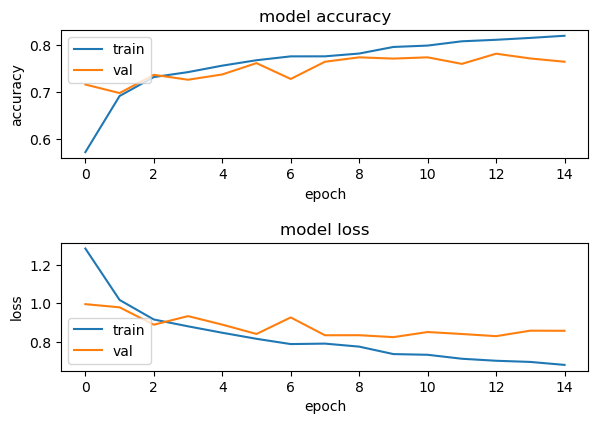

In [111]:
plot_history(history2_tuned_race)

In [112]:
print("Accuracy: ", test_model(tuned_model2_race, test_generator_race)[1])

73/73 [==============================] - 11s 143ms/step - loss: 0.8048 - categorical_accuracy: 0.7752
Accuracy:  0.7751606106758118


***************************************************************************************************************************

In [67]:
#adding dropout
tuned_model3_race = create_model(conv_filters=[(16, 3), (16, 3), (128, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(32,),
                             dropout_rate=0.25,
                             input_shape=(h, w, 3),
                             no_of_classes=n_classes_race,
                             batch_normalization=False,
                             conv_kernel_regularizer=None,
                             dense_kernel_regularizer=None,
                             loss="categorical_crossentropy", 
                             metrics=["categorical_accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 16)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 16)        0

In [68]:
history3_tuned_race = train_model(train_generator_race, valid_generator_race, tuned_model3_race, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 148s 628ms/step - loss: 1.3208 - categorical_accuracy: 0.5020 - val_loss: 1.2158 - val_categorical_accuracy: 0.5233
Epoch 2/15
234/234 [==============================] - 144s 617ms/step - loss: 0.9152 - categorical_accuracy: 0.6730 - val_loss: 0.9221 - val_categorical_accuracy: 0.6994
Epoch 3/15
234/234 [==============================] - 143s 612ms/step - loss: 0.8005 - categorical_accuracy: 0.7190 - val_loss: 0.8347 - val_categorical_accuracy: 0.7374
Epoch 4/15
234/234 [==============================] - 142s 608ms/step - loss: 0.7287 - categorical_accuracy: 0.7479 - val_loss: 0.8104 - val_categorical_accuracy: 0.7334
Epoch 5/15
234/234 [==============================] - 142s 607ms/step - loss: 0.6894 - categorical_accuracy: 0.7601 - val_loss: 0.7607 - val_categorical_accuracy: 0.7460
Epoch 6/15
234/234 [==============================] - 142s 606ms/step - loss: 0.6304 - categorical_accuracy: 0.7808 - val_loss: 0.7995 - val_categoric

In [69]:
tuned_model3_race.save("tuned_model3_race.h5")

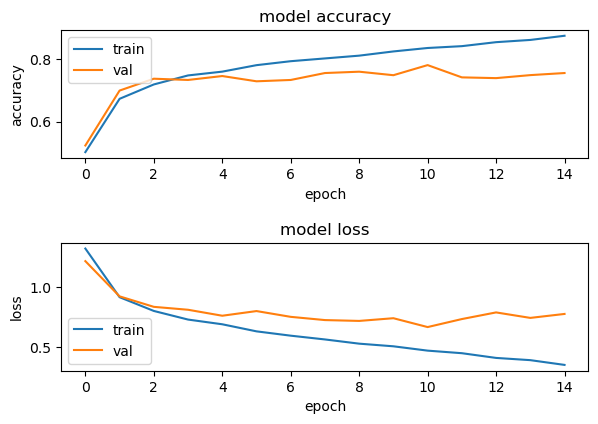

In [70]:
plot_history(history3_tuned_race)

In [71]:
print("Accuracy: ", test_model(tuned_model3_race, test_generator_race)[1])

73/73 [==============================] - 12s 162ms/step - loss: 0.8231 - categorical_accuracy: 0.7445
Accuracy:  0.7445396184921265


***************************************************************************************************************************

In [72]:
# adding dropout and kernel regularizer together
tuned_model4_race = create_model(conv_filters=[(16, 3), (16, 3), (128, 3)], 
                             pooling=(2, 2), 
                             dense_layer_sizes=(32,),
                             dropout_rate=0.25,
                             input_shape=(h, w, 3),
                             no_of_classes=n_classes_race,
                             batch_normalization=False,
                             conv_kernel_regularizer=None,
                             dense_kernel_regularizer='l2',
                             loss="categorical_crossentropy", 
                             metrics=["categorical_accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 99, 99, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 16)        2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 48, 48, 16)       

In [73]:
history4_tuned_race = train_model(train_generator_race, valid_generator_race, tuned_model4_race, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 142s 603ms/step - loss: 1.5574 - categorical_accuracy: 0.4992 - val_loss: 1.2833 - val_categorical_accuracy: 0.5857
Epoch 2/15
234/234 [==============================] - 144s 613ms/step - loss: 1.1271 - categorical_accuracy: 0.6217 - val_loss: 1.1386 - val_categorical_accuracy: 0.6352
Epoch 3/15
234/234 [==============================] - 142s 608ms/step - loss: 1.0141 - categorical_accuracy: 0.6822 - val_loss: 1.0173 - val_categorical_accuracy: 0.6879
Epoch 4/15
234/234 [==============================] - 144s 613ms/step - loss: 0.9437 - categorical_accuracy: 0.7095 - val_loss: 0.9097 - val_categorical_accuracy: 0.7251
Epoch 5/15
234/234 [==============================] - 143s 610ms/step - loss: 0.9069 - categorical_accuracy: 0.7218 - val_loss: 0.8885 - val_categorical_accuracy: 0.7323
Epoch 6/15
234/234 [==============================] - 142s 608ms/step - loss: 0.8919 - categorical_accuracy: 0.7266 - val_loss: 0.8874 - val_categoric

In [74]:
tuned_model4_race.save("tuned_model4_race.h5")

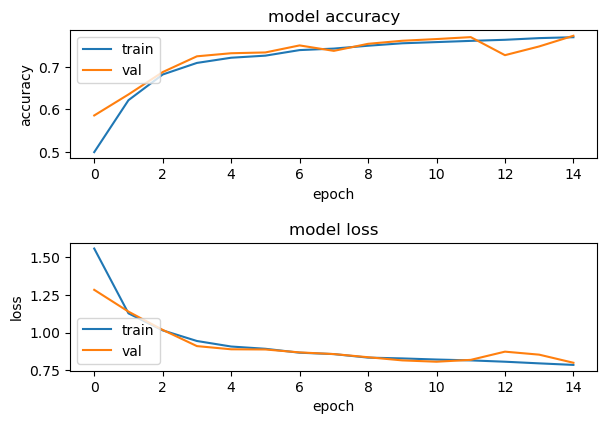

In [75]:
plot_history(history4_tuned_race)

In [76]:
print("Accuracy: ", test_model(tuned_model4_race, test_generator_race)[1])

73/73 [==============================] - 12s 165ms/step - loss: 0.8070 - categorical_accuracy: 0.7694
Accuracy:  0.7693790197372437


***************************************************************************************************************************

### Results - tuned race

In [22]:
results_df[(results_df['category'] == 'race') & (results_df['model'].str.startswith('tuned'))].sort_values('Accuracy', ascending=False)

model category               conv_layers Dropout  \
41  tuned_model1_race     race  (16, 3) (16, 3) (128, 3)       0   
42  tuned_model2_race     race  (16, 3) (16, 3) (128, 3)       0   
44  tuned_model4_race     race  (16, 3) (16, 3) (128, 3)    0.25   
43  tuned_model3_race     race  (16, 3) (16, 3) (128, 3)    0.25   

   BatchNormalization Dense layers sizes Dense kernel reg  Accuracy Remarks  
41               None             (32, )             None    0.7777     NaN  
42               None             (32, )               l2    0.7751     NaN  
44               None             (32, )               l2    0.7694     NaN  
43               None             (32, )             None    0.7445     NaN

***************************************************************************************************************************

<a id="35"></a> 
# 9. Transfer Learning
[back to the top](#0)

Keras Applications (https://keras.io/api/applications/) are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning. I am going to use 2 sample models from Kras Applications, apply them to my data and compare accuracy results to my previously built models.

<a id="36"></a> 
## 9.1 Create method for building transfer learning model 
[back to the top](#0)

In [72]:
def create_transfer_learning_model(trans_model, 
                                   n_classes, 
                                   dense_layers=(32, ), 
                                   dense_kernel_regularizer=None, 
                                   output_fun="softmax",
                                   loss="categorical_crossentropy", 
                                   metrics=["categorical_accuracy"],
                                   optimizer=Adam,
                                   learning_rate=1e-3):
    #Creating top model
    top_model = Sequential()
    top_model.add(Flatten())
    
    # creating Dense layers,; dense_layers parameter is list of integers representing the sizes 
    # of consecutive Dense layers, lenght of the list represent number of layers    
    for s in range(len(dense_layers)):
        top_model.add(Dense(dense_layers[s], kernel_regularizer=dense_kernel_regularizer, activation='relu'))   
        
    #adding last Dense layer
    top_model.add(Dense(n_classes, activation=output_fun))
    
    #Building transfer learning model from bottom model (from Keras Applications) and top model 
    tl_model = Sequential()
    tl_model.add(trans_model)
    tl_model.add(top_model)
    
    # Making bottom model not-trainable, weights from pretrained model will be used
    tl_model.layers[0].trainable = False
    
    print(tl_model.summary())
    
    #model compiling
    tl_model.compile(loss=loss, 
                  optimizer=optimizer(learning_rate = learning_rate), 
                  metrics=metrics) 
    
    return tl_model

<a id="37"></a> 
## 9.2 Keras Applications transfer models
[back to the top](#0)

<a id="38"></a>
### 9.2.1 MobileNet model
[back to the top](#0)

<a id="39"></a>
### Preprocess data for transfer learning
[back to the top](#0)

In [64]:
h, w = 200, 200
batch_size = 64

#### Three Age Groups

In [65]:
train_generator_age3_MN, valid_generator_age3_MN, test_generator_age3_MN = create_dataflow_from_dataframe(
                                    train_dataframe=df_train_age3,
                                    test_dataframe=df_test_age3,
                                    target_size=(h, w),
                                    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
                                    validation_split=0.2,
                                    directory="./new_data/images")

Found 14944 validated image filenames belonging to 3 classes.
Found 3736 validated image filenames belonging to 3 classes.
Found 4670 validated image filenames belonging to 3 classes.


#### Seven Age Groups

In [66]:
train_generator_age7_MN, valid_generator_age7_MN, test_generator_age7_MN = create_dataflow_from_dataframe(
                                    train_dataframe=df_train_age7,
                                    test_dataframe=df_test_age7,
                                    target_size=(h, w),
                                    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
                                    validation_split=0.2,
                                    directory="./new_data/images")

Found 14944 validated image filenames belonging to 7 classes.
Found 3736 validated image filenames belonging to 7 classes.
Found 4670 validated image filenames belonging to 7 classes.


#### Eight Age Groups

In [67]:
train_generator_age8_MN, valid_generator_age8_MN, test_generator_age8_MN = create_dataflow_from_dataframe(
                                    train_dataframe=df_train_age8,
                                    test_dataframe=df_test_age8,
                                    target_size=(h, w),
                                    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
                                    validation_split=0.2,
                                    directory="./new_data/images")

Found 14944 validated image filenames belonging to 8 classes.
Found 3736 validated image filenames belonging to 8 classes.
Found 4670 validated image filenames belonging to 8 classes.


#### Gender

In [68]:
train_generator_gend_MN, valid_generator_gend_MN, test_generator_gend_MN = create_dataflow_from_dataframe(
                                    train_dataframe=df_train_gend,
                                    test_dataframe=df_test_gend,
                                    target_size=(h, w),
                                    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
                                    validation_split=0.2,
                                    class_mode="binary",
                                    directory="./new_data/images")

Found 14944 validated image filenames belonging to 2 classes.
Found 3736 validated image filenames belonging to 2 classes.
Found 4670 validated image filenames belonging to 2 classes.


#### Race

In [69]:
train_generator_race_MN, valid_generator_race_MN, test_generator_race_MN = create_dataflow_from_dataframe(
                                    train_dataframe=df_train_race,
                                    test_dataframe=df_test_race,
                                    target_size=(h, w),
                                    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
                                    validation_split=0.2,
                                    directory="./new_data/images")

Found 14944 validated image filenames belonging to 5 classes.
Found 3736 validated image filenames belonging to 5 classes.
Found 4670 validated image filenames belonging to 5 classes.


<a id="40"></a>
### Import MobileNet model
[back to the top](#0)

In [68]:
transfer_model_MN = MobileNet(weights="imagenet", 
                       include_top=None, 
                       input_shape=(200, 200, 3))
transfer_model_MN.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 100, 100, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 100, 100, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 100, 100, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 100, 100, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 100, 100, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8 (Conv2D)          (None, 12, 12, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 12, 12, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 12, 12, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 12, 12, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 12, 12, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 12, 12, 512)       0         
                                                                 
 conv_pw_9

In [69]:
n_classes_age3 = 3
n_classes_age7 = 7
n_classes_age8 = 8
n_classes_race = 5

<a id="41"></a> 
### Three age groups - models training
[back to the top](#0)

In [71]:
tl_model1_MN_age3 = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_age3, 
                                                  dense_layers=(128, ),
                                                  dense_kernel_regularizer='l2')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential (Sequential)     (None, 3)                 4719107   
                                                                 
Total params: 7,947,971
Trainable params: 4,719,107
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [78]:
history1_MN_age3 = train_model(train_generator_age3_MN, valid_generator_age3_MN,
                               tl_model1_MN_age3, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 407s 2s/step - loss: 2.7156 - categorical_accuracy: 0.8462 - val_loss: 0.8788 - val_categorical_accuracy: 0.8643
Epoch 2/15
234/234 [==============================] - 401s 2s/step - loss: 0.5783 - categorical_accuracy: 0.9120 - val_loss: 0.5594 - val_categorical_accuracy: 0.8841
Epoch 3/15
234/234 [==============================] - 405s 2s/step - loss: 0.3933 - categorical_accuracy: 0.9246 - val_loss: 0.5054 - val_categorical_accuracy: 0.8903
Epoch 4/15
234/234 [==============================] - 404s 2s/step - loss: 0.3468 - categorical_accuracy: 0.9269 - val_loss: 0.4806 - val_categorical_accuracy: 0.8667
Epoch 5/15
234/234 [==============================] - 402s 2s/step - loss: 0.2968 - categorical_accuracy: 0.9368 - val_loss: 0.4694 - val_categorical_accuracy: 0.8870
Epoch 6/15
234/234 [==============================] - 391s 2s/step - loss: 0.3002 - categorical_accuracy: 0.9413 - val_loss: 0.5407 - val_categorical_accuracy: 0.852

In [79]:
 tl_model1_MN_age3.save(" tl_model1_MN_age3.h5")

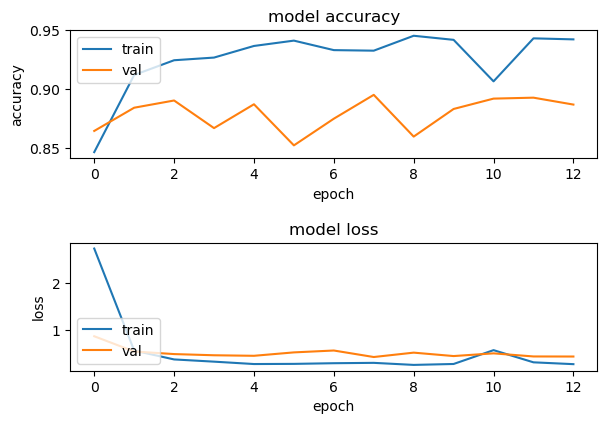

In [80]:
plot_history(history1_MN_age3)

In [82]:
print("Accuracy: ", test_model(tl_model1_MN_age3, test_generator_age3_MN)[1])

73/73 [==============================] - 98s 1s/step - loss: 0.4506 - categorical_accuracy: 0.8929
Accuracy:  0.8929336071014404


***************************************************************************************************************************

In [83]:
tl_model2_MN_age3 = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_age3, 
                                                  dense_layers=(128, ))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential_4 (Sequential)   (None, 3)                 4719107   
                                                                 
Total params: 7,947,971
Trainable params: 4,719,107
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [84]:
history2_MN_age3 = train_model(train_generator_age3_MN, valid_generator_age3_MN,
                               tl_model2_MN_age3, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 397s 2s/step - loss: 1.3030 - categorical_accuracy: 0.8460 - val_loss: 0.2932 - val_categorical_accuracy: 0.8932
Epoch 2/15
234/234 [==============================] - 389s 2s/step - loss: 0.2130 - categorical_accuracy: 0.9208 - val_loss: 0.2949 - val_categorical_accuracy: 0.8908
Epoch 3/15
234/234 [==============================] - 379s 2s/step - loss: 0.1225 - categorical_accuracy: 0.9553 - val_loss: 0.3175 - val_categorical_accuracy: 0.9007
Epoch 4/15
234/234 [==============================] - 384s 2s/step - loss: 0.0672 - categorical_accuracy: 0.9789 - val_loss: 0.3510 - val_categorical_accuracy: 0.8905
Epoch 5/15
234/234 [==============================] - 381s 2s/step - loss: 0.0363 - categorical_accuracy: 0.9912 - val_loss: 0.3760 - val_categorical_accuracy: 0.9060
Epoch 6/15
234/234 [==============================] - 377s 2s/step - loss: 0.0250 - categorical_accuracy: 0.9934 - val_loss: 0.4319 - val_categorical_accuracy: 0.892

In [85]:
 tl_model2_MN_age3.save(" tl_model2_MN_age3.h5")

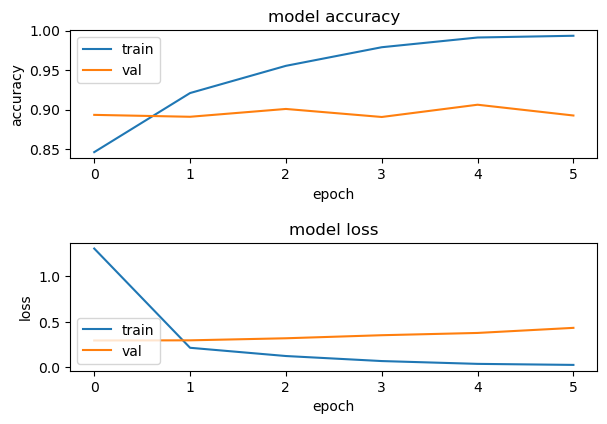

In [86]:
plot_history(history2_MN_age3)

In [87]:
print("Accuracy: ", test_model(tl_model2_MN_age3, test_generator_age3_MN)[1])

73/73 [==============================] - 97s 1s/step - loss: 0.2966 - categorical_accuracy: 0.8949
Accuracy:  0.8948608040809631


***************************************************************************************************************************

In [88]:
tl_model3_MN_age3 = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_age3, 
                                                  dense_layers=(128, 64))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential_6 (Sequential)   (None, 3)                 4727171   
                                                                 
Total params: 7,956,035
Trainable params: 4,727,171
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [89]:
history3_MN_age3 = train_model(train_generator_age3_MN, valid_generator_age3_MN,
                               tl_model3_MN_age3, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 397s 2s/step - loss: 0.7028 - categorical_accuracy: 0.8511 - val_loss: 0.3583 - val_categorical_accuracy: 0.8656
Epoch 2/15
234/234 [==============================] - 388s 2s/step - loss: 0.1861 - categorical_accuracy: 0.9299 - val_loss: 0.3271 - val_categorical_accuracy: 0.8846
Epoch 3/15
234/234 [==============================] - 377s 2s/step - loss: 0.1172 - categorical_accuracy: 0.9579 - val_loss: 0.3333 - val_categorical_accuracy: 0.8983
Epoch 4/15
234/234 [==============================] - 377s 2s/step - loss: 0.0608 - categorical_accuracy: 0.9799 - val_loss: 0.3818 - val_categorical_accuracy: 0.8881
Epoch 5/15
234/234 [==============================] - 382s 2s/step - loss: 0.0299 - categorical_accuracy: 0.9930 - val_loss: 0.4457 - val_categorical_accuracy: 0.8975
Epoch 6/15
234/234 [==============================] - 383s 2s/step - loss: 0.0522 - categorical_accuracy: 0.9839 - val_loss: 0.4908 - val_categorical_accuracy: 0.880

In [90]:
 tl_model3_MN_age3.save(" tl_model3_MN_age3.h5")

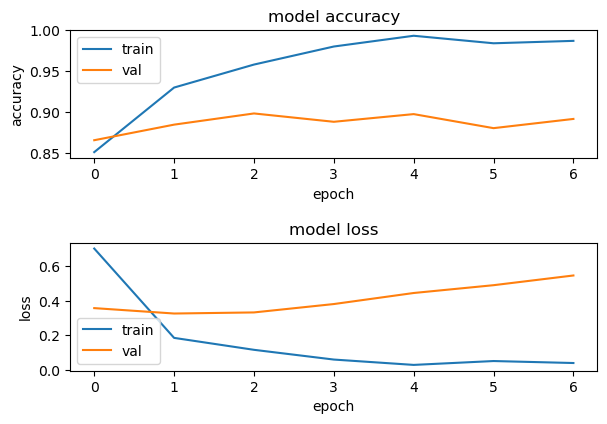

In [91]:
plot_history(history3_MN_age3)

In [92]:
print("Accuracy: ", test_model(tl_model3_MN_age3, test_generator_age3_MN)[1])

73/73 [==============================] - 97s 1s/step - loss: 0.3044 - categorical_accuracy: 0.8839
Accuracy:  0.8839400410652161


***************************************************************************************************************************

In [68]:
tl_model4_MN_age3 = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_age3, 
                                                  dense_layers=(32, ))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential (Sequential)     (None, 3)                 1179779   
                                                                 
Total params: 4,408,643
Trainable params: 1,179,779
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [69]:
history4_MN_age3 = train_model(train_generator_age3_MN, valid_generator_age3_MN,
                               tl_model4_MN_age3, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 373s 2s/step - loss: 0.9399 - categorical_accuracy: 0.7352 - val_loss: 0.5823 - val_categorical_accuracy: 0.7746
Epoch 2/15
234/234 [==============================] - 369s 2s/step - loss: 0.4900 - categorical_accuracy: 0.8168 - val_loss: 0.5566 - val_categorical_accuracy: 0.8252
Epoch 3/15
234/234 [==============================] - 367s 2s/step - loss: 0.4154 - categorical_accuracy: 0.8391 - val_loss: 0.5621 - val_categorical_accuracy: 0.8175
Epoch 4/15
234/234 [==============================] - 366s 2s/step - loss: 0.3299 - categorical_accuracy: 0.8973 - val_loss: 0.5253 - val_categorical_accuracy: 0.8739
Epoch 5/15
234/234 [==============================] - 366s 2s/step - loss: 0.2124 - categorical_accuracy: 0.9522 - val_loss: 0.4666 - val_categorical_accuracy: 0.8769
Epoch 6/15
234/234 [==============================] - 367s 2s/step - loss: 0.1541 - categorical_accuracy: 0.9688 - val_loss: 0.4922 - val_categorical_accuracy: 0.878

In [70]:
 tl_model4_MN_age3.save(" tl_model4_MN_age3.h5")

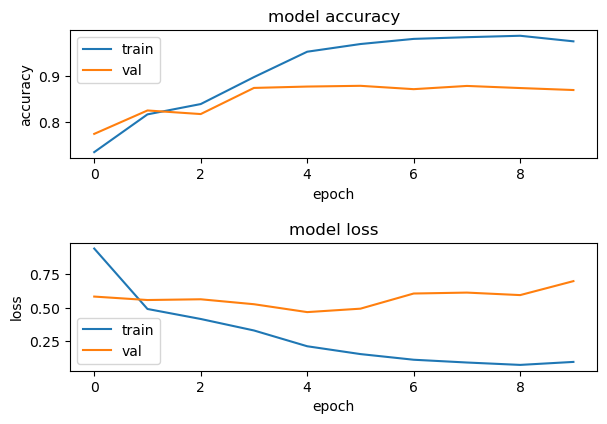

In [71]:
plot_history(history4_MN_age3)

In [72]:
print("Accuracy: ", test_model(tl_model4_MN_age3, test_generator_age3_MN)[1])

73/73 [==============================] - 93s 1s/step - loss: 0.4394 - categorical_accuracy: 0.8857
Accuracy:  0.8856530785560608


***************************************************************************************************************************

In [77]:
tl_model5_MN_age3 = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_age3, 
                                                  dense_layers=(128, 32),
                                                  dense_kernel_regularizer='l2')

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential_6 (Sequential)   (None, 3)                 4722947   
                                                                 
Total params: 7,951,811
Trainable params: 4,722,947
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [78]:
history5_MN_age3 = train_model(train_generator_age3_MN, valid_generator_age3_MN,
                               tl_model5_MN_age3, es_patience=5, epochs=15)

Epoch 1/15
234/234 [==============================] - 379s 2s/step - loss: 1.9255 - categorical_accuracy: 0.8506 - val_loss: 0.9336 - val_categorical_accuracy: 0.8870
Epoch 2/15
234/234 [==============================] - 376s 2s/step - loss: 0.6952 - categorical_accuracy: 0.8992 - val_loss: 0.7011 - val_categorical_accuracy: 0.8870
Epoch 3/15
234/234 [==============================] - 375s 2s/step - loss: 0.4955 - categorical_accuracy: 0.9170 - val_loss: 0.5738 - val_categorical_accuracy: 0.8747
Epoch 4/15
234/234 [==============================] - 376s 2s/step - loss: 0.4473 - categorical_accuracy: 0.9157 - val_loss: 0.5163 - val_categorical_accuracy: 0.8841
Epoch 5/15
234/234 [==============================] - 375s 2s/step - loss: 0.4188 - categorical_accuracy: 0.9157 - val_loss: 0.5139 - val_categorical_accuracy: 0.8895
Epoch 6/15
234/234 [==============================] - 374s 2s/step - loss: 0.4004 - categorical_accuracy: 0.9164 - val_loss: 0.4966 - val_categorical_accuracy: 0.890

In [79]:
 tl_model5_MN_age3.save(" tl_model5_MN_age3.h5")

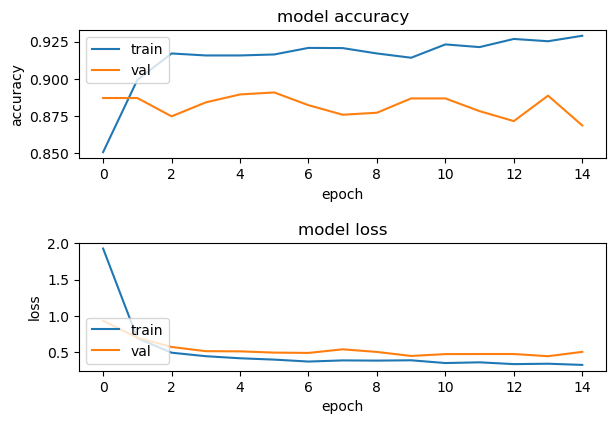

In [80]:
plot_history(history5_MN_age3)

In [81]:
print("Accuracy: ", test_model(tl_model5_MN_age3, test_generator_age3_MN)[1])

73/73 [==============================] - 98s 1s/step - loss: 0.4773 - categorical_accuracy: 0.8775
Accuracy:  0.8775160312652588


***************************************************************************************************************************

In [94]:
tl_model6_MN_age3 = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_age3, 
                                                  dense_layers=(512, ),
                                                  dense_kernel_regularizer=None)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential_13 (Sequential)  (None, 3)                 18876419  
                                                                 
Total params: 22,105,283
Trainable params: 18,876,419
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [95]:
history6_MN_age3 = train_model(train_generator_age3_MN, valid_generator_age3_MN,
                               tl_model6_MN_age3, es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 381s 2s/step - loss: 2.4030 - categorical_accuracy: 0.8357 - val_loss: 0.9169 - val_categorical_accuracy: 0.8715
Epoch 2/15
234/234 [==============================] - 379s 2s/step - loss: 0.2621 - categorical_accuracy: 0.9229 - val_loss: 0.4802 - val_categorical_accuracy: 0.8779
Epoch 3/15
234/234 [==============================] - 392s 2s/step - loss: 0.1320 - categorical_accuracy: 0.9558 - val_loss: 0.5182 - val_categorical_accuracy: 0.8541
Epoch 4/15
234/234 [==============================] - 395s 2s/step - loss: 0.0578 - categorical_accuracy: 0.9807 - val_loss: 0.4993 - val_categorical_accuracy: 0.8664
Epoch 5/15
234/234 [==============================] - 394s 2s/step - loss: 0.0345 - categorical_accuracy: 0.9900 - val_loss: 0.4433 - val_categorical_accuracy: 0.8889
Epoch 6/15
234/234 [==============================] - 389s 2s/step - loss: 0.0279 - categorical_accuracy: 0.9918 - val_loss: 0.4660 - val_categorical_accuracy: 0.884

In [96]:
 tl_model6_MN_age3.save(" tl_model6_MN_age3.h5")

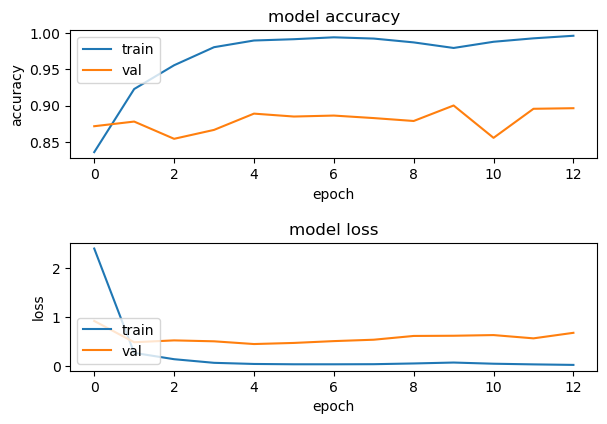

In [97]:
plot_history(history6_MN_age3)

In [98]:
print("Accuracy: ", test_model(tl_model6_MN_age3, test_generator_age3_MN)[1])

73/73 [==============================] - 96s 1s/step - loss: 0.4602 - categorical_accuracy: 0.8809
Accuracy:  0.880942165851593


***************************************************************************************************************************

In [99]:
tl_model7_MN_age3 = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_age3, 
                                                  dense_layers=(512, ),
                                                  dense_kernel_regularizer='l2')

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential_15 (Sequential)  (None, 3)                 18876419  
                                                                 
Total params: 22,105,283
Trainable params: 18,876,419
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [100]:
history7_MN_age3 = train_model(train_generator_age3_MN, valid_generator_age3_MN,
                               tl_model7_MN_age3, es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 407s 2s/step - loss: 4.5846 - categorical_accuracy: 0.8314 - val_loss: 1.3427 - val_categorical_accuracy: 0.8688
Epoch 2/15
234/234 [==============================] - 413s 2s/step - loss: 0.8373 - categorical_accuracy: 0.8994 - val_loss: 0.7365 - val_categorical_accuracy: 0.8699
Epoch 3/15
234/234 [==============================] - 399s 2s/step - loss: 0.5007 - categorical_accuracy: 0.9115 - val_loss: 0.4946 - val_categorical_accuracy: 0.8860
Epoch 4/15
234/234 [==============================] - 384s 2s/step - loss: 0.3814 - categorical_accuracy: 0.9196 - val_loss: 0.4508 - val_categorical_accuracy: 0.8940
Epoch 5/15
234/234 [==============================] - 383s 2s/step - loss: 0.3692 - categorical_accuracy: 0.9164 - val_loss: 0.4071 - val_categorical_accuracy: 0.8999
Epoch 6/15
234/234 [==============================] - 384s 2s/step - loss: 0.3542 - categorical_accuracy: 0.9194 - val_loss: 0.4252 - val_categorical_accuracy: 0.894

In [101]:
 tl_model7_MN_age3.save(" tl_model7_MN_age3.h5")

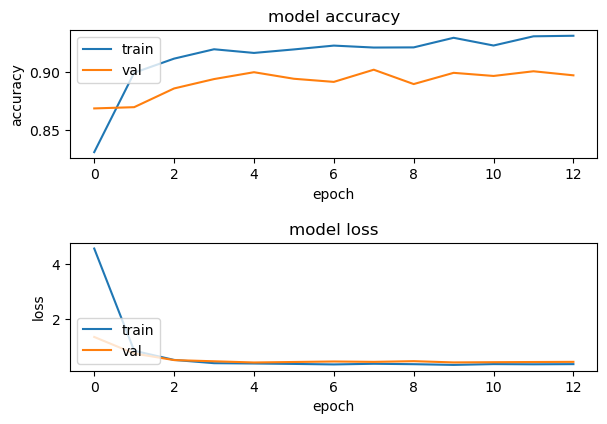

In [102]:
plot_history(history7_MN_age3)

In [103]:
print("Accuracy: ", test_model(tl_model7_MN_age3, test_generator_age3_MN)[1])

73/73 [==============================] - 94s 1s/step - loss: 0.4160 - categorical_accuracy: 0.8951
Accuracy:  0.8950749635696411


***************************************************************************************************************************

### Results - MobileNet three age groups

In [25]:
results_df[(results_df['category'] == 'age3') & (results_df['conv_layers'] == 'MobileNet')].sort_values('Accuracy', ascending=False)

model category conv_layers Dropout BatchNormalization  \
51  tl_model7_MN_age3     age3   MobileNet       -               None   
46  tl_model2_MN_age3     age3   MobileNet       -               None   
45  tl_model1_MN_age3     age3   MobileNet       -               None   
48  tl_model4_MN_age3     age3   MobileNet       -               None   
47  tl_model3_MN_age3     age3   MobileNet       -               None   
50  tl_model6_MN_age3     age3   MobileNet       -               None   
49  tl_model5_MN_age3     age3   MobileNet       -               None   

   Dense layers sizes Dense kernel reg  Accuracy Remarks  
51            (512, )               l2    0.8951     NaN  
46            (128, )             None    0.8949     NaN  
45            (128, )               l2    0.8929     NaN  
48            (32,  )             None    0.8856     NaN  
47         (128, 64 )             None    0.8839     NaN  
50            (512, )             None    0.8809     NaN  
49         (128, 32 )               l2    0.8775     NaN

***************************************************************************************************************************

<a id="42"></a> 
### Seven age groups
[back to the top](#0)

In [82]:
tl_model1_MN_age7 = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_age7, 
                                                  dense_layers=(128, ))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential_8 (Sequential)   (None, 7)                 4719623   
                                                                 
Total params: 7,948,487
Trainable params: 4,719,623
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [83]:
history1_MN_age7 = train_model(train_generator_age7_MN, valid_generator_age7_MN, tl_model1_MN_age7, es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 384s 2s/step - loss: 1.7380 - categorical_accuracy: 0.6138 - val_loss: 0.8320 - val_categorical_accuracy: 0.6622
Epoch 2/15
234/234 [==============================] - 379s 2s/step - loss: 0.6342 - categorical_accuracy: 0.7457 - val_loss: 0.9675 - val_categorical_accuracy: 0.6298
Epoch 3/15
234/234 [==============================] - 373s 2s/step - loss: 0.4745 - categorical_accuracy: 0.8134 - val_loss: 0.8593 - val_categorical_accuracy: 0.6820
Epoch 4/15
234/234 [==============================] - 372s 2s/step - loss: 0.3485 - categorical_accuracy: 0.8681 - val_loss: 0.9087 - val_categorical_accuracy: 0.6726
Epoch 5/15
234/234 [==============================] - 372s 2s/step - loss: 0.2704 - categorical_accuracy: 0.9008 - val_loss: 1.1113 - val_categorical_accuracy: 0.6328
Epoch 6/15
234/234 [==============================] - 372s 2s/step - loss: 0.1744 - categorical_accuracy: 0.9445 - val_loss: 1.1247 - val_categorical_accuracy: 0.669

In [84]:
 tl_model1_MN_age7.save(" tl_model1_MN_age7.h5")

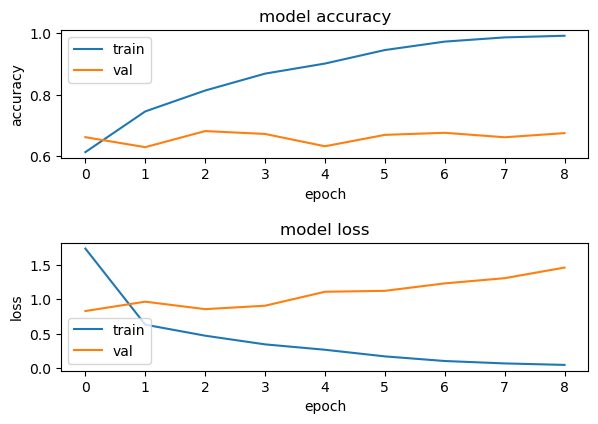

In [85]:
plot_history(history1_MN_age7)

In [87]:
print("Accuracy: ", test_model(tl_model1_MN_age7, test_generator_age7_MN)[1])

73/73 [==============================] - 97s 1s/step - loss: 0.8422 - categorical_accuracy: 0.6589
Accuracy:  0.6588864922523499


***************************************************************************************************************************

In [88]:
tl_model2_MN_age7 = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_age7, 
                                                  dense_layers=(128, 64))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential_10 (Sequential)  (None, 7)                 4727431   
                                                                 
Total params: 7,956,295
Trainable params: 4,727,431
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [89]:
history2_MN_age7 = train_model(train_generator_age7_MN, valid_generator_age7_MN, tl_model2_MN_age7, 
                               es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 377s 2s/step - loss: 1.4253 - categorical_accuracy: 0.5988 - val_loss: 0.8503 - val_categorical_accuracy: 0.6555
Epoch 2/15
234/234 [==============================] - 374s 2s/step - loss: 0.5806 - categorical_accuracy: 0.7738 - val_loss: 0.9094 - val_categorical_accuracy: 0.6753
Epoch 3/15
234/234 [==============================] - 372s 2s/step - loss: 0.3801 - categorical_accuracy: 0.8489 - val_loss: 0.9949 - val_categorical_accuracy: 0.6839
Epoch 4/15
234/234 [==============================] - 372s 2s/step - loss: 0.2461 - categorical_accuracy: 0.9056 - val_loss: 1.0677 - val_categorical_accuracy: 0.6710
Epoch 5/15
234/234 [==============================] - 372s 2s/step - loss: 0.1679 - categorical_accuracy: 0.9406 - val_loss: 1.3562 - val_categorical_accuracy: 0.6654
Epoch 6/15
234/234 [==============================] - 372s 2s/step - loss: 0.1311 - categorical_accuracy: 0.9546 - val_loss: 1.3553 - val_categorical_accuracy: 0.663

In [90]:
 tl_model2_MN_age7.save(" tl_model2_MN_age7.h5")

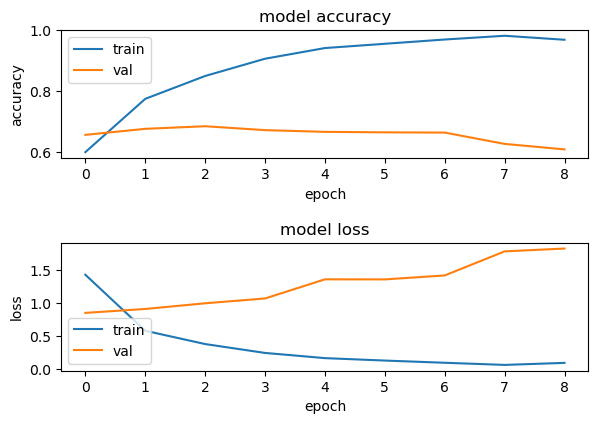

In [91]:
plot_history(history2_MN_age7)

In [92]:
print("Accuracy: ", test_model(tl_model2_MN_age7, test_generator_age7_MN)[1])

73/73 [==============================] - 96s 1s/step - loss: 0.8721 - categorical_accuracy: 0.6460
Accuracy:  0.6460385322570801


***************************************************************************************************************************

In [94]:
tl_model3_MN_age7 = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_age7, 
                                                  dense_layers=(64, ))

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential_14 (Sequential)  (None, 7)                 2359815   
                                                                 
Total params: 5,588,679
Trainable params: 2,359,815
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [95]:
history3_MN_age7 = train_model(train_generator_age7_MN, valid_generator_age7_MN, tl_model3_MN_age7, 
                               es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 373s 2s/step - loss: 1.7304 - categorical_accuracy: 0.5363 - val_loss: 1.1138 - val_categorical_accuracy: 0.6022
Epoch 2/15
234/234 [==============================] - 371s 2s/step - loss: 0.8863 - categorical_accuracy: 0.6650 - val_loss: 1.0169 - val_categorical_accuracy: 0.6175
Epoch 3/15
234/234 [==============================] - 368s 2s/step - loss: 0.7216 - categorical_accuracy: 0.7190 - val_loss: 0.9925 - val_categorical_accuracy: 0.6261
Epoch 4/15
234/234 [==============================] - 367s 2s/step - loss: 0.5911 - categorical_accuracy: 0.7708 - val_loss: 1.1361 - val_categorical_accuracy: 0.5891
Epoch 5/15
234/234 [==============================] - 368s 2s/step - loss: 0.4845 - categorical_accuracy: 0.8245 - val_loss: 1.0796 - val_categorical_accuracy: 0.6523
Epoch 6/15
234/234 [==============================] - 368s 2s/step - loss: 0.4328 - categorical_accuracy: 0.8498 - val_loss: 1.3146 - val_categorical_accuracy: 0.637

In [96]:
 tl_model3_MN_age7.save(" tl_model3_MN_age7.h5")

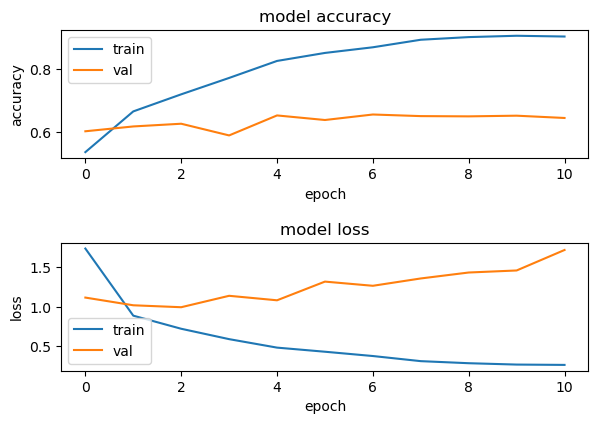

In [97]:
plot_history(history3_MN_age7)

In [98]:
print("Accuracy: ", test_model(tl_model3_MN_age7, test_generator_age7_MN)[1])

73/73 [==============================] - 97s 1s/step - loss: 0.9917 - categorical_accuracy: 0.6158
Accuracy:  0.615845799446106


***************************************************************************************************************************

In [72]:
tl_model4_MN_age7 = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_age7, 
                                                  dense_layers=(256, ))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential (Sequential)     (None, 7)                 9439239   
                                                                 
Total params: 12,668,103
Trainable params: 9,439,239
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [73]:
history4_MN_age7 = train_model(train_generator_age7_MN, valid_generator_age7_MN, tl_model4_MN_age7, 
                               es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 411s 2s/step - loss: 1.8339 - categorical_accuracy: 0.5996 - val_loss: 0.8638 - val_categorical_accuracy: 0.6726
Epoch 2/15
234/234 [==============================] - 388s 2s/step - loss: 0.5619 - categorical_accuracy: 0.7776 - val_loss: 0.9546 - val_categorical_accuracy: 0.6357
Epoch 3/15
234/234 [==============================] - 381s 2s/step - loss: 0.3699 - categorical_accuracy: 0.8601 - val_loss: 0.9563 - val_categorical_accuracy: 0.6769
Epoch 4/15
234/234 [==============================] - 382s 2s/step - loss: 0.2472 - categorical_accuracy: 0.9128 - val_loss: 0.9633 - val_categorical_accuracy: 0.6657
Epoch 5/15
234/234 [==============================] - 381s 2s/step - loss: 0.1606 - categorical_accuracy: 0.9497 - val_loss: 1.1288 - val_categorical_accuracy: 0.6518
Epoch 6/15
234/234 [==============================] - 384s 2s/step - loss: 0.1086 - categorical_accuracy: 0.9697 - val_loss: 1.1699 - val_categorical_accuracy: 0.665

In [74]:
 tl_model4_MN_age7.save(" tl_model4_MN_age7.h5")

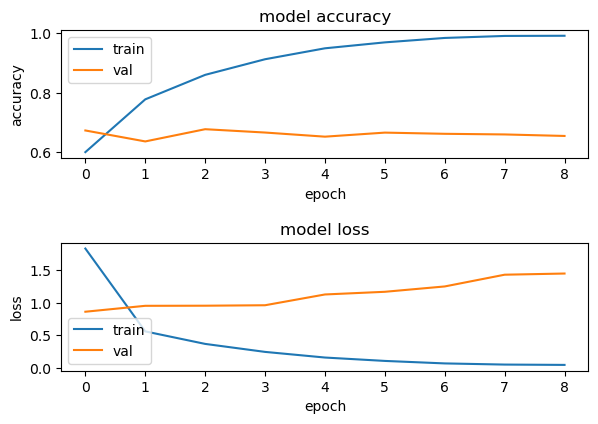

In [75]:
plot_history(history4_MN_age7)

In [76]:
print("Accuracy: ", test_model(tl_model4_MN_age7, test_generator_age7_MN)[1])

73/73 [==============================] - 100s 1s/step - loss: 0.8422 - categorical_accuracy: 0.6749
Accuracy:  0.6749464869499207


***************************************************************************************************************************

In [81]:
tl_model5_MN_age7 = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_age7, 
                                                  dense_layers=(512, ),
                                                  dense_kernel_regularizer=None)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential_7 (Sequential)   (None, 7)                 18878471  
                                                                 
Total params: 22,107,335
Trainable params: 18,878,471
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [82]:
history5_MN_age7 = train_model(train_generator_age7_MN, valid_generator_age7_MN, tl_model5_MN_age7, 
                               es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 397s 2s/step - loss: 5.1517 - categorical_accuracy: 0.5982 - val_loss: 0.7904 - val_categorical_accuracy: 0.6791
Epoch 2/15
234/234 [==============================] - 390s 2s/step - loss: 0.6295 - categorical_accuracy: 0.7436 - val_loss: 0.7840 - val_categorical_accuracy: 0.6788
Epoch 3/15
234/234 [==============================] - 379s 2s/step - loss: 0.4405 - categorical_accuracy: 0.8294 - val_loss: 0.8312 - val_categorical_accuracy: 0.6603
Epoch 4/15
234/234 [==============================] - 379s 2s/step - loss: 0.2960 - categorical_accuracy: 0.8916 - val_loss: 0.9355 - val_categorical_accuracy: 0.6419
Epoch 5/15
234/234 [==============================] - 379s 2s/step - loss: 0.1823 - categorical_accuracy: 0.9397 - val_loss: 1.0638 - val_categorical_accuracy: 0.6681
Epoch 6/15
234/234 [==============================] - 379s 2s/step - loss: 0.1253 - categorical_accuracy: 0.9607 - val_loss: 1.1359 - val_categorical_accuracy: 0.681

In [83]:
 tl_model5_MN_age7.save(" tl_model5_MN_age7.h5")

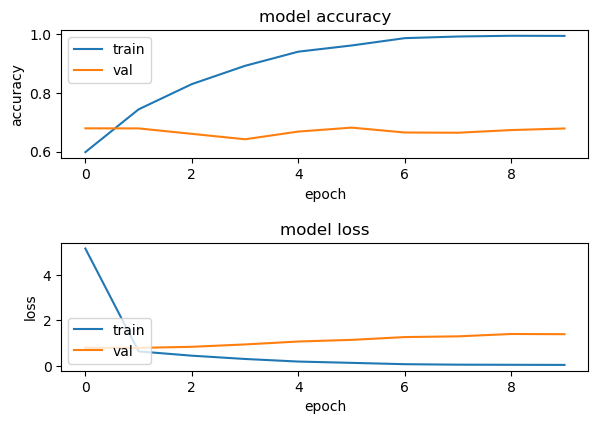

In [84]:
plot_history(history5_MN_age7)

In [88]:
print("Accuracy: ", test_model(tl_model5_MN_age7, test_generator_age7_MN)[1])

73/73 [==============================] - 96s 1s/step - loss: 0.7940 - categorical_accuracy: 0.6728
Accuracy:  0.67280513048172


***************************************************************************************************************************

In [89]:
tl_model6_MN_age7 = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_age7, 
                                                  dense_layers=(512, ),
                                                  dense_kernel_regularizer="l2")

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential_11 (Sequential)  (None, 7)                 18878471  
                                                                 
Total params: 22,107,335
Trainable params: 18,878,471
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [90]:
history6_MN_age7 = train_model(train_generator_age7_MN, valid_generator_age7_MN, tl_model6_MN_age7, 
                               es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 406s 2s/step - loss: 6.7466 - categorical_accuracy: 0.5868 - val_loss: 1.8732 - val_categorical_accuracy: 0.6670
Epoch 2/15
234/234 [==============================] - 397s 2s/step - loss: 1.3800 - categorical_accuracy: 0.7218 - val_loss: 1.2380 - val_categorical_accuracy: 0.6879
Epoch 3/15
234/234 [==============================] - 384s 2s/step - loss: 0.9781 - categorical_accuracy: 0.7547 - val_loss: 1.1112 - val_categorical_accuracy: 0.6689
Epoch 4/15
234/234 [==============================] - 384s 2s/step - loss: 0.8583 - categorical_accuracy: 0.7700 - val_loss: 1.0474 - val_categorical_accuracy: 0.6815
Epoch 5/15
234/234 [==============================] - 384s 2s/step - loss: 0.8527 - categorical_accuracy: 0.7697 - val_loss: 1.1420 - val_categorical_accuracy: 0.6705
Epoch 6/15
234/234 [==============================] - 384s 2s/step - loss: 0.8239 - categorical_accuracy: 0.7751 - val_loss: 1.1021 - val_categorical_accuracy: 0.655

In [91]:
 tl_model6_MN_age7.save(" tl_model6_MN_age7.h5")

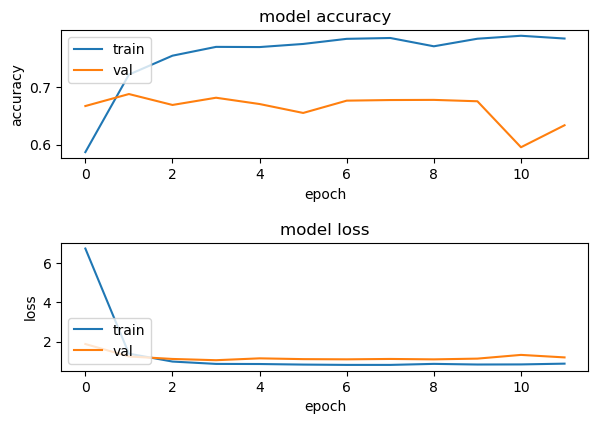

In [92]:
plot_history(history6_MN_age7)

In [93]:
print("Accuracy: ", test_model(tl_model6_MN_age7, test_generator_age7_MN)[1])

73/73 [==============================] - 90s 1s/step - loss: 1.0663 - categorical_accuracy: 0.6876
Accuracy:  0.6875802874565125


***************************************************************************************************************************

### Results - MobileNet seven age groups

In [26]:
results_df[(results_df['category'] == 'age7') & (results_df['conv_layers'] == 'MobileNet')].sort_values('Accuracy', ascending=False)

model category conv_layers Dropout BatchNormalization  \
57  tl_model6_MN_age7     age7   MobileNet       -               None   
55  tl_model4_MN_age7     age7   MobileNet       -               None   
56  tl_model5_MN_age7     age7   MobileNet       -               None   
52  tl_model1_MN_age7     age7   MobileNet       -               None   
53  tl_model2_MN_age7     age7   MobileNet       -               None   
54  tl_model3_MN_age7     age7   MobileNet       -               None   

   Dense layers sizes Dense kernel reg  Accuracy Remarks  
57           (512,  )               l2    0.6876     NaN  
55           (256,  )             None    0.6749     NaN  
56           (512,  )             None    0.6728     NaN  
52            (128, )             None    0.6589     NaN  
53         (128, 64 )             None    0.6460     NaN  
54            (64,  )             None    0.6158     NaN

***************************************************************************************************************************

<a id="43"></a> 
### Eight age groups
[back to the top](#0)

In [71]:
tl_model1_MN_age8 = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_age8, 
                                                  dense_layers=(128, ),
                                                  dense_kernel_regularizer=None)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential (Sequential)     (None, 8)                 4719752   
                                                                 
Total params: 7,948,616
Trainable params: 4,719,752
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [72]:
history1_MN_age8 = train_model(train_generator_age8_MN, valid_generator_age8_MN, tl_model1_MN_age8, 
                               es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 444s 2s/step - loss: 2.5011 - categorical_accuracy: 0.4139 - val_loss: 1.4961 - val_categorical_accuracy: 0.4644
Epoch 2/15
234/234 [==============================] - 444s 2s/step - loss: 1.3147 - categorical_accuracy: 0.5235 - val_loss: 1.3659 - val_categorical_accuracy: 0.4909
Epoch 3/15
234/234 [==============================] - 441s 2s/step - loss: 1.0771 - categorical_accuracy: 0.5997 - val_loss: 1.3831 - val_categorical_accuracy: 0.5211
Epoch 4/15
234/234 [==============================] - 435s 2s/step - loss: 0.9360 - categorical_accuracy: 0.6401 - val_loss: 1.3353 - val_categorical_accuracy: 0.5013
Epoch 5/15
234/234 [==============================] - 436s 2s/step - loss: 0.8114 - categorical_accuracy: 0.6810 - val_loss: 1.3673 - val_categorical_accuracy: 0.5040
Epoch 6/15
234/234 [==============================] - 435s 2s/step - loss: 0.7263 - categorical_accuracy: 0.7109 - val_loss: 1.5854 - val_categorical_accuracy: 0.466

In [73]:
 tl_model1_MN_age8.save(" tl_model1_MN_age8.h5")

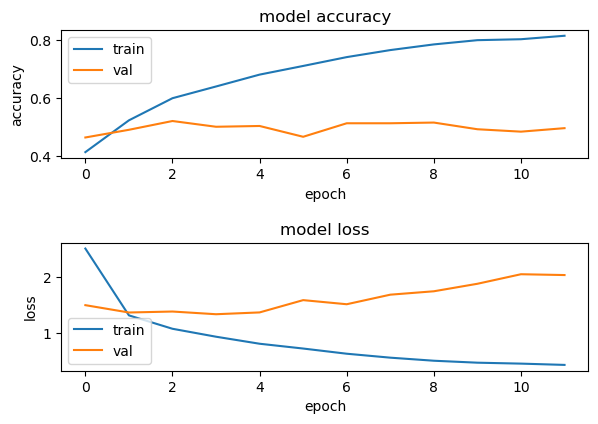

In [74]:
plot_history(history1_MN_age8)

In [75]:
print("Accuracy: ", test_model(tl_model1_MN_age8, test_generator_age8_MN)[1])

73/73 [==============================] - 106s 1s/step - loss: 1.3643 - categorical_accuracy: 0.4844
Accuracy:  0.48436829447746277


***************************************************************************************************************************

In [76]:
tl_model2_MN_age8 = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_age8, 
                                                  dense_layers=(256, ),
                                                  dense_kernel_regularizer=None)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential_2 (Sequential)   (None, 8)                 9439496   
                                                                 
Total params: 12,668,360
Trainable params: 9,439,496
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [77]:
history2_MN_age8 = train_model(train_generator_age8_MN, valid_generator_age8_MN, tl_model2_MN_age8, 
                               es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 437s 2s/step - loss: 2.8125 - categorical_accuracy: 0.4707 - val_loss: 1.2100 - val_categorical_accuracy: 0.5393
Epoch 2/15
234/234 [==============================] - 450s 2s/step - loss: 0.9682 - categorical_accuracy: 0.6190 - val_loss: 1.1637 - val_categorical_accuracy: 0.5385
Epoch 3/15
234/234 [==============================] - 438s 2s/step - loss: 0.7189 - categorical_accuracy: 0.7299 - val_loss: 1.2115 - val_categorical_accuracy: 0.5262
Epoch 4/15
234/234 [==============================] - 440s 2s/step - loss: 0.5518 - categorical_accuracy: 0.7931 - val_loss: 1.2732 - val_categorical_accuracy: 0.5415
Epoch 5/15
234/234 [==============================] - 443s 2s/step - loss: 0.3684 - categorical_accuracy: 0.8712 - val_loss: 1.4975 - val_categorical_accuracy: 0.5361
Epoch 6/15
234/234 [==============================] - 443s 2s/step - loss: 0.2487 - categorical_accuracy: 0.9204 - val_loss: 1.7784 - val_categorical_accuracy: 0.549

In [78]:
 tl_model2_MN_age8.save(" tl_model2_MN_age8.h5")

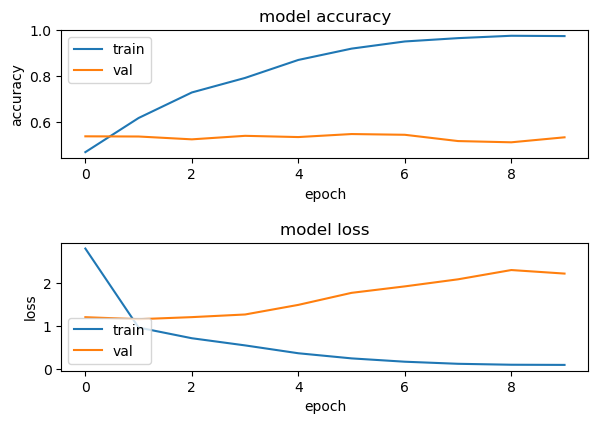

In [79]:
plot_history(history2_MN_age8)

In [80]:
print("Accuracy: ", test_model(tl_model2_MN_age8, test_generator_age8_MN)[1])

73/73 [==============================] - 93s 1s/step - loss: 1.1486 - categorical_accuracy: 0.5456
Accuracy:  0.545610249042511


***************************************************************************************************************************

In [81]:
tl_model3_MN_age8 = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_age8, 
                                                  dense_layers=(512, ),
                                                  dense_kernel_regularizer=None)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential_4 (Sequential)   (None, 8)                 18878984  
                                                                 
Total params: 22,107,848
Trainable params: 18,878,984
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [82]:
history3_MN_age8 = train_model(train_generator_age8_MN, valid_generator_age8_MN, tl_model3_MN_age8, 
                               es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 401s 2s/step - loss: 2.8725 - categorical_accuracy: 0.4805 - val_loss: 1.1428 - val_categorical_accuracy: 0.5501
Epoch 2/15
234/234 [==============================] - 400s 2s/step - loss: 0.8551 - categorical_accuracy: 0.6678 - val_loss: 1.1650 - val_categorical_accuracy: 0.5557
Epoch 3/15
234/234 [==============================] - 396s 2s/step - loss: 0.5936 - categorical_accuracy: 0.7825 - val_loss: 1.2823 - val_categorical_accuracy: 0.5128
Epoch 4/15
234/234 [==============================] - 396s 2s/step - loss: 0.3993 - categorical_accuracy: 0.8578 - val_loss: 1.4699 - val_categorical_accuracy: 0.5099
Epoch 5/15
234/234 [==============================] - 393s 2s/step - loss: 0.2442 - categorical_accuracy: 0.9225 - val_loss: 1.6107 - val_categorical_accuracy: 0.5361
Epoch 6/15
234/234 [==============================] - 386s 2s/step - loss: 0.1642 - categorical_accuracy: 0.9528 - val_loss: 1.8772 - val_categorical_accuracy: 0.519

In [83]:
 tl_model3_MN_age8.save(" tl_model3_MN_age8.h5")

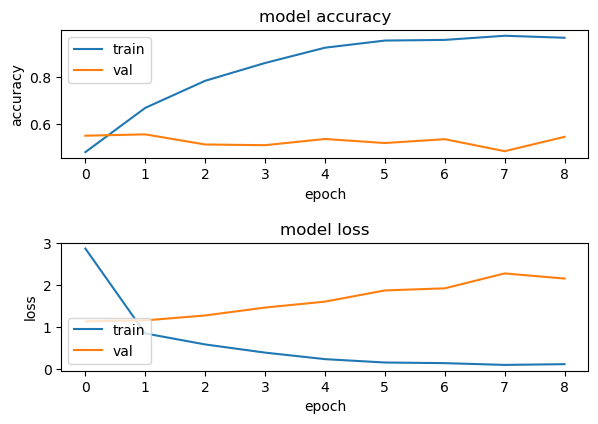

In [84]:
plot_history(history3_MN_age8)

In [85]:
print("Accuracy: ", test_model(tl_model3_MN_age8, test_generator_age8_MN)[1])

73/73 [==============================] - 92s 1s/step - loss: 1.1500 - categorical_accuracy: 0.5452
Accuracy:  0.5451819896697998


***************************************************************************************************************************

In [86]:
tl_model4_MN_age8 = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_age8, 
                                                  dense_layers=(1024, ),
                                                  dense_kernel_regularizer=None)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential_6 (Sequential)   (None, 8)                 37757960  
                                                                 
Total params: 40,986,824
Trainable params: 37,757,960
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [87]:
history4_MN_age8 = train_model(train_generator_age8_MN, valid_generator_age8_MN, tl_model4_MN_age8, 
                               es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 481s 2s/step - loss: 4.4215 - categorical_accuracy: 0.4878 - val_loss: 1.1585 - val_categorical_accuracy: 0.5319
Epoch 2/15
234/234 [==============================] - 470s 2s/step - loss: 0.9047 - categorical_accuracy: 0.6518 - val_loss: 1.1543 - val_categorical_accuracy: 0.5533
Epoch 3/15
234/234 [==============================] - 471s 2s/step - loss: 0.6600 - categorical_accuracy: 0.7554 - val_loss: 1.2644 - val_categorical_accuracy: 0.5551
Epoch 4/15
234/234 [==============================] - 473s 2s/step - loss: 0.4644 - categorical_accuracy: 0.8336 - val_loss: 1.3956 - val_categorical_accuracy: 0.5605
Epoch 5/15
234/234 [==============================] - 473s 2s/step - loss: 0.2879 - categorical_accuracy: 0.9109 - val_loss: 1.5953 - val_categorical_accuracy: 0.5399
Epoch 6/15
234/234 [==============================] - 471s 2s/step - loss: 0.1923 - categorical_accuracy: 0.9455 - val_loss: 1.7384 - val_categorical_accuracy: 0.532

In [88]:
 tl_model4_MN_age8.save(" tl_model4_MN_age8.h5")

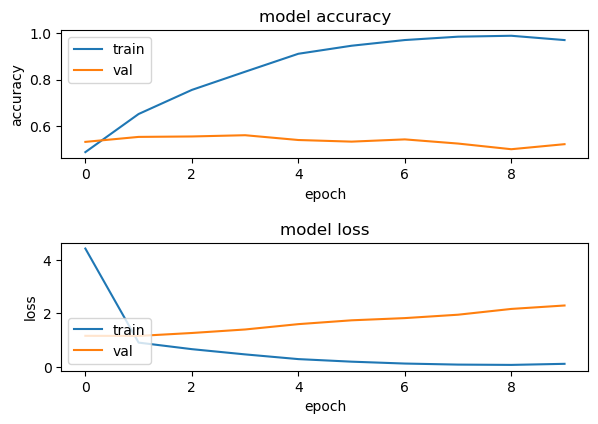

In [89]:
plot_history(history4_MN_age8)

In [90]:
print("Accuracy: ", test_model(tl_model4_MN_age8, test_generator_age8_MN)[1])

73/73 [==============================] - 113s 2s/step - loss: 1.1328 - categorical_accuracy: 0.5555
Accuracy:  0.5554603934288025


***************************************************************************************************************************

In [76]:
tl_model5_MN_age8 = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_age8, 
                                                  dense_layers=(1024, ),
                                                  dense_kernel_regularizer='l2')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential (Sequential)     (None, 8)                 37757960  
                                                                 
Total params: 40,986,824
Trainable params: 37,757,960
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [77]:
history5_MN_age8 = train_model(train_generator_age8_MN, valid_generator_age8_MN, tl_model5_MN_age8, 
                               es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 442s 2s/step - loss: 11.8395 - categorical_accuracy: 0.4924 - val_loss: 3.0095 - val_categorical_accuracy: 0.5493
Epoch 2/15
234/234 [==============================] - 438s 2s/step - loss: 2.1211 - categorical_accuracy: 0.5913 - val_loss: 1.7593 - val_categorical_accuracy: 0.5490
Epoch 3/15
234/234 [==============================] - 440s 2s/step - loss: 1.4764 - categorical_accuracy: 0.6104 - val_loss: 1.5059 - val_categorical_accuracy: 0.5463
Epoch 4/15
234/234 [==============================] - 435s 2s/step - loss: 1.2864 - categorical_accuracy: 0.6269 - val_loss: 1.5336 - val_categorical_accuracy: 0.5286
Epoch 5/15
234/234 [==============================] - 439s 2s/step - loss: 1.2661 - categorical_accuracy: 0.6194 - val_loss: 1.3864 - val_categorical_accuracy: 0.5717
Epoch 6/15
234/234 [==============================] - 435s 2s/step - loss: 1.2326 - categorical_accuracy: 0.6222 - val_loss: 1.5096 - val_categorical_accuracy: 0.55

In [78]:
 tl_model5_MN_age8.save(" tl_model5_MN_age8.h5")

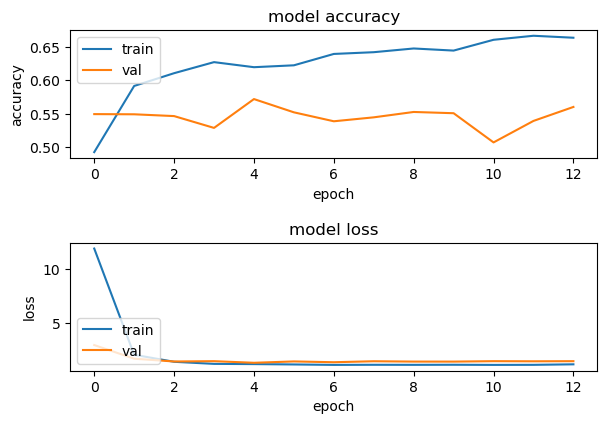

In [79]:
plot_history(history5_MN_age8)

In [80]:
print("Accuracy: ", test_model(tl_model5_MN_age8, test_generator_age8_MN)[1])

73/73 [==============================] - 98s 1s/step - loss: 1.3827 - categorical_accuracy: 0.5647
Accuracy:  0.5646681189537048


***************************************************************************************************************************

In [81]:
tl_model6_MN_age8 = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_age8, 
                                                  dense_layers=(1024, ),
                                                  dense_kernel_regularizer='l2',
                                                  learning_rate=1e-5)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential_2 (Sequential)   (None, 8)                 37757960  
                                                                 
Total params: 40,986,824
Trainable params: 37,757,960
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [82]:
history6_MN_age8 = train_model(train_generator_age8_MN, valid_generator_age8_MN, tl_model6_MN_age8, 
                               es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 432s 2s/step - loss: 20.6520 - categorical_accuracy: 0.4580 - val_loss: 19.6526 - val_categorical_accuracy: 0.5120
Epoch 2/15
234/234 [==============================] - 435s 2s/step - loss: 18.5420 - categorical_accuracy: 0.6538 - val_loss: 18.1622 - val_categorical_accuracy: 0.5356
Epoch 3/15
234/234 [==============================] - 426s 2s/step - loss: 16.8393 - categorical_accuracy: 0.7860 - val_loss: 16.7716 - val_categorical_accuracy: 0.5348
Epoch 4/15
234/234 [==============================] - 426s 2s/step - loss: 15.3347 - categorical_accuracy: 0.8785 - val_loss: 15.5307 - val_categorical_accuracy: 0.5426
Epoch 5/15
234/234 [==============================] - 426s 2s/step - loss: 13.9865 - categorical_accuracy: 0.9413 - val_loss: 14.3854 - val_categorical_accuracy: 0.5319
Epoch 6/15
234/234 [==============================] - 437s 2s/step - loss: 12.7667 - categorical_accuracy: 0.9700 - val_loss: 13.2616 - val_categorical_acc

In [83]:
 tl_model6_MN_age8.save(" tl_model6_MN_age8.h5")

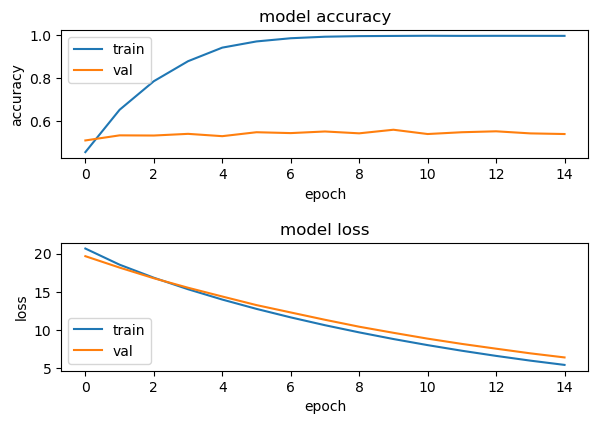

In [84]:
plot_history(history6_MN_age8)

In [85]:
print("Accuracy: ", test_model(tl_model6_MN_age8, test_generator_age8_MN)[1])

73/73 [==============================] - 138s 2s/step - loss: 6.4185 - categorical_accuracy: 0.5501
Accuracy:  0.5501070618629456


***************************************************************************************************************************

### Results - MobileNet eight age groups

In [27]:
results_df[(results_df['category'] == 'age8') & (results_df['conv_layers'] == 'MobileNet')].sort_values('Accuracy', ascending=False)

model category conv_layers Dropout BatchNormalization  \
62  tl_model5_MN_age8     age8   MobileNet       -               None   
61  tl_model4_MN_age8     age8   MobileNet       -               None   
63  tl_model6_MN_age8     age8   MobileNet       -               None   
59  tl_model2_MN_age8     age8   MobileNet       -               None   
60  tl_model3_MN_age8     age8   MobileNet       -               None   
58  tl_model1_MN_age8     age8   MobileNet       -               None   

   Dense layers sizes Dense kernel reg  Accuracy             Remarks  
62           (1024, )               l2    0.5647                 NaN  
61           (1024, )             None    0.5555                 NaN  
63           (1024, )               l2    0.5501  learning rate 1e-5  
59            (256, )             None    0.5456                 NaN  
60            (512, )             None    0.5452                 NaN  
58            (128, )             None    0.4844                 NaN

***************************************************************************************************************************

<a id="44"></a> 
### Gender
[back to the top](#0)

In [71]:
tl_model1_MN_gender = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                    n_classes=1, 
                                                    dense_layers=(128, ), 
                                                    dense_kernel_regularizer=None, 
                                                    output_fun="sigmoid", 
                                                    loss="binary_crossentropy", 
                                                    metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential (Sequential)     (None, 1)                 4718849   
                                                                 
Total params: 7,947,713
Trainable params: 4,718,849
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [72]:
history1_MN_gender = train_model(train_generator_gend_MN, valid_generator_gend_MN, tl_model1_MN_gender, 
                               es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 386s 2s/step - loss: 0.4414 - accuracy: 0.8525 - val_loss: 0.3574 - val_accuracy: 0.8440
Epoch 2/15
234/234 [==============================] - 374s 2s/step - loss: 0.1805 - accuracy: 0.9267 - val_loss: 0.2618 - val_accuracy: 0.8961
Epoch 3/15
234/234 [==============================] - 360s 2s/step - loss: 0.1174 - accuracy: 0.9556 - val_loss: 0.3272 - val_accuracy: 0.8865
Epoch 4/15
234/234 [==============================] - 356s 2s/step - loss: 0.0789 - accuracy: 0.9735 - val_loss: 0.3114 - val_accuracy: 0.8908
Epoch 5/15
234/234 [==============================] - 355s 2s/step - loss: 0.0404 - accuracy: 0.9882 - val_loss: 0.3803 - val_accuracy: 0.8887
Epoch 6/15
234/234 [==============================] - 355s 2s/step - loss: 0.0270 - accuracy: 0.9924 - val_loss: 0.3925 - val_accuracy: 0.8911
Epoch 7/15
234/234 [==============================] - 355s 2s/step - loss: 0.0244 - accuracy: 0.9925 - val_loss: 0.4716 - val_accuracy: 0.8833

In [73]:
 tl_model1_MN_gender.save(" tl_model1_MN_gender.h5")

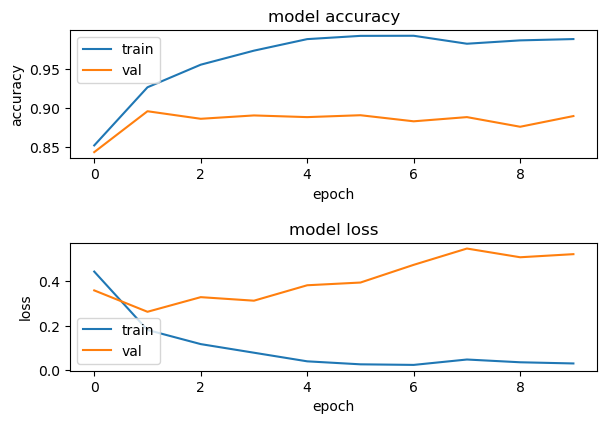

In [74]:
plot_history(history1_MN_gender)

In [75]:
print("Accuracy: ", test_model(tl_model1_MN_gender, test_generator_gend_MN)[1])

73/73 [==============================] - 88s 1s/step - loss: 0.2586 - accuracy: 0.8934
Accuracy:  0.8933618664741516


***************************************************************************************************************************

In [72]:
tl_model2_MN_gender = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                    n_classes=1, 
                                                    dense_layers=(512, ), 
                                                    dense_kernel_regularizer=None, 
                                                    output_fun="sigmoid", 
                                                    loss="binary_crossentropy", 
                                                    metrics=["accuracy"])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential_2 (Sequential)   (None, 1)                 18875393  
                                                                 
Total params: 22,104,257
Trainable params: 18,875,393
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [73]:
history2_MN_gender = train_model(train_generator_gend_MN, valid_generator_gend_MN, tl_model2_MN_gender, 
                               es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 492s 2s/step - loss: 1.0824 - accuracy: 0.8371 - val_loss: 0.3564 - val_accuracy: 0.8801
Epoch 2/15
234/234 [==============================] - 531s 2s/step - loss: 0.1926 - accuracy: 0.9318 - val_loss: 0.3359 - val_accuracy: 0.8884
Epoch 3/15
234/234 [==============================] - 539s 2s/step - loss: 0.1045 - accuracy: 0.9620 - val_loss: 0.3743 - val_accuracy: 0.8806
Epoch 4/15
234/234 [==============================] - 543s 2s/step - loss: 0.0707 - accuracy: 0.9750 - val_loss: 0.3997 - val_accuracy: 0.8873
Epoch 5/15
234/234 [==============================] - 525s 2s/step - loss: 0.0463 - accuracy: 0.9858 - val_loss: 0.5066 - val_accuracy: 0.8777
Epoch 6/15
234/234 [==============================] - 491s 2s/step - loss: 0.0432 - accuracy: 0.9872 - val_loss: 0.5461 - val_accuracy: 0.8758
Epoch 7/15
234/234 [==============================] - 478s 2s/step - loss: 0.0656 - accuracy: 0.9770 - val_loss: 0.5217 - val_accuracy: 0.8822

In [74]:
 tl_model2_MN_gender.save(" tl_model2_MN_gender.h5")

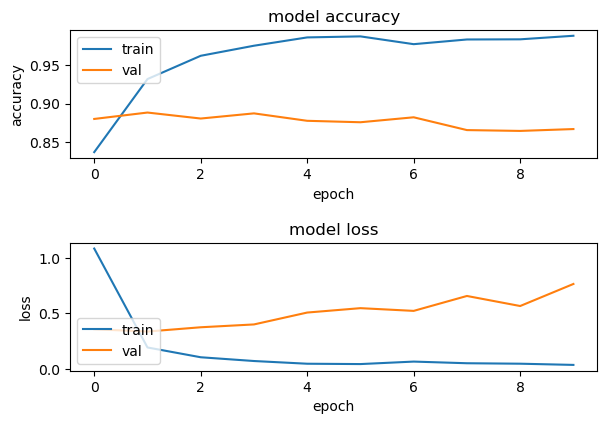

In [75]:
plot_history(history2_MN_gender)

In [76]:
print("Accuracy: ", test_model(tl_model2_MN_gender, test_generator_gend_MN)[1])

73/73 [==============================] - 105s 1s/step - loss: 0.3529 - accuracy: 0.8788
Accuracy:  0.8788008689880371


***************************************************************************************************************************

In [77]:
tl_model3_MN_gender = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                    n_classes=1, 
                                                    dense_layers=(1024, ), 
                                                    dense_kernel_regularizer=None, 
                                                    output_fun="sigmoid", 
                                                    loss="binary_crossentropy", 
                                                    metrics=["accuracy"])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential_4 (Sequential)   (None, 1)                 37750785  
                                                                 
Total params: 40,979,649
Trainable params: 37,750,785
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [78]:
history3_MN_gender = train_model(train_generator_gend_MN, valid_generator_gend_MN, tl_model3_MN_gender, 
                               es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 426s 2s/step - loss: 1.0573 - accuracy: 0.8401 - val_loss: 0.2825 - val_accuracy: 0.8790
Epoch 2/15
234/234 [==============================] - 431s 2s/step - loss: 0.1778 - accuracy: 0.9303 - val_loss: 0.2704 - val_accuracy: 0.8956
Epoch 3/15
234/234 [==============================] - 473s 2s/step - loss: 0.1093 - accuracy: 0.9618 - val_loss: 0.3178 - val_accuracy: 0.8937
Epoch 4/15
234/234 [==============================] - 580s 2s/step - loss: 0.0713 - accuracy: 0.9761 - val_loss: 0.3788 - val_accuracy: 0.8833
Epoch 5/15
234/234 [==============================] - 573s 2s/step - loss: 0.0466 - accuracy: 0.9843 - val_loss: 0.4324 - val_accuracy: 0.8801
Epoch 6/15
234/234 [==============================] - 581s 2s/step - loss: 0.0481 - accuracy: 0.9844 - val_loss: 0.4601 - val_accuracy: 0.8830
Epoch 7/15
234/234 [==============================] - 560s 2s/step - loss: 0.0476 - accuracy: 0.9843 - val_loss: 0.4829 - val_accuracy: 0.8817

In [79]:
 tl_model3_MN_gender.save(" tl_model3_MN_gender.h5")

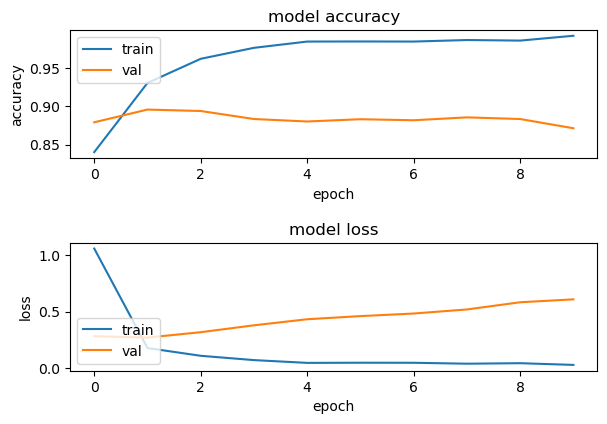

In [80]:
plot_history(history3_MN_gender)

In [81]:
print("Accuracy: ", test_model(tl_model3_MN_gender, test_generator_gend_MN)[1])

73/73 [==============================] - 139s 2s/step - loss: 0.2899 - accuracy: 0.8863
Accuracy:  0.88629549741745


***************************************************************************************************************************

In [84]:
tl_model4_MN_gender = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                    n_classes=1, 
                                                    dense_layers=(128, ), 
                                                    dense_kernel_regularizer='l2', 
                                                    output_fun="sigmoid", 
                                                    loss="binary_crossentropy", 
                                                    metrics=["accuracy"])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential_8 (Sequential)   (None, 1)                 4718849   
                                                                 
Total params: 7,947,713
Trainable params: 4,718,849
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [85]:
history4_MN_gender = train_model(train_generator_gend_MN, valid_generator_gend_MN, tl_model4_MN_gender, 
                               es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 507s 2s/step - loss: 1.7185 - accuracy: 0.7626 - val_loss: 0.6151 - val_accuracy: 0.8804
Epoch 2/15
234/234 [==============================] - 517s 2s/step - loss: 0.4972 - accuracy: 0.8808 - val_loss: 0.4389 - val_accuracy: 0.8731
Epoch 3/15
234/234 [==============================] - 517s 2s/step - loss: 0.3795 - accuracy: 0.8948 - val_loss: 0.3714 - val_accuracy: 0.8857
Epoch 4/15
234/234 [==============================] - 512s 2s/step - loss: 0.3379 - accuracy: 0.9040 - val_loss: 0.3767 - val_accuracy: 0.8801
Epoch 5/15
234/234 [==============================] - 517s 2s/step - loss: 0.3220 - accuracy: 0.9087 - val_loss: 0.3557 - val_accuracy: 0.8932
Epoch 6/15
234/234 [==============================] - 483s 2s/step - loss: 0.3060 - accuracy: 0.9173 - val_loss: 0.3724 - val_accuracy: 0.8838
Epoch 7/15
234/234 [==============================] - 465s 2s/step - loss: 0.3072 - accuracy: 0.9173 - val_loss: 0.3828 - val_accuracy: 0.8860

In [86]:
 tl_model4_MN_gender.save(" tl_model4_MN_gender.h5")

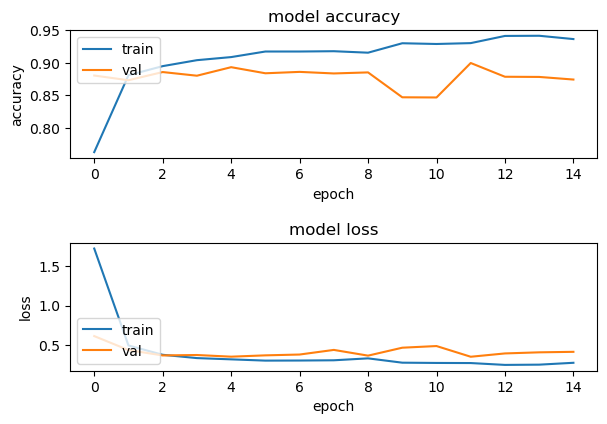

In [87]:
plot_history(history4_MN_gender)

In [89]:
print("Accuracy: ", test_model(tl_model4_MN_gender, test_generator_gend_MN)[1])

73/73 [==============================] - 126s 2s/step - loss: 0.4286 - accuracy: 0.8737
Accuracy:  0.8736616969108582


***************************************************************************************************************************

### Results - MobileNet gender

In [28]:
results_df[(results_df['category'] == 'gender') & (results_df['conv_layers'] == 'MobileNet')].sort_values('Accuracy', ascending=False)

model category conv_layers Dropout BatchNormalization  \
64  tl_model1_MN_gender   gender   MobileNet       -               None   
66  tl_model3_MN_gender   gender   MobileNet       -               None   
65  tl_model2_MN_gender   gender   MobileNet       -               None   
67  tl_model4_MN_gender   gender   MobileNet       -               None   

   Dense layers sizes Dense kernel reg  Accuracy Remarks  
64            (128, )             None    0.8934     NaN  
66           (1024, )             None    0.8863     NaN  
65            (512, )             None    0.8788     NaN  
67            (128, )               l2    0.8737     NaN

***************************************************************************************************************************

<a id="60"></a> 
### Race
[back to the top](#0)

In [73]:
tl_model1_MN_race = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_race, 
                                                  dense_layers=(128, ),
                                                  dense_kernel_regularizer=None)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential_2 (Sequential)   (None, 5)                 4719365   
                                                                 
Total params: 7,948,229
Trainable params: 4,719,365
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [74]:
history1_MN_race = train_model(train_generator_race_MN, valid_generator_race_MN, tl_model1_MN_race, 
                               es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 396s 2s/step - loss: 1.8155 - categorical_accuracy: 0.6649 - val_loss: 0.8138 - val_categorical_accuracy: 0.7187
Epoch 2/15
234/234 [==============================] - 380s 2s/step - loss: 0.5297 - categorical_accuracy: 0.8173 - val_loss: 0.7992 - val_categorical_accuracy: 0.7358
Epoch 3/15
234/234 [==============================] - 376s 2s/step - loss: 0.3572 - categorical_accuracy: 0.8783 - val_loss: 0.8058 - val_categorical_accuracy: 0.7452
Epoch 4/15
234/234 [==============================] - 372s 2s/step - loss: 0.2590 - categorical_accuracy: 0.9148 - val_loss: 0.9202 - val_categorical_accuracy: 0.7454
Epoch 5/15
234/234 [==============================] - 373s 2s/step - loss: 0.2010 - categorical_accuracy: 0.9329 - val_loss: 1.0021 - val_categorical_accuracy: 0.7219
Epoch 6/15
234/234 [==============================] - 372s 2s/step - loss: 0.1569 - categorical_accuracy: 0.9509 - val_loss: 1.2713 - val_categorical_accuracy: 0.713

In [75]:
 tl_model1_MN_race.save(" tl_model1_MN_race.h5")

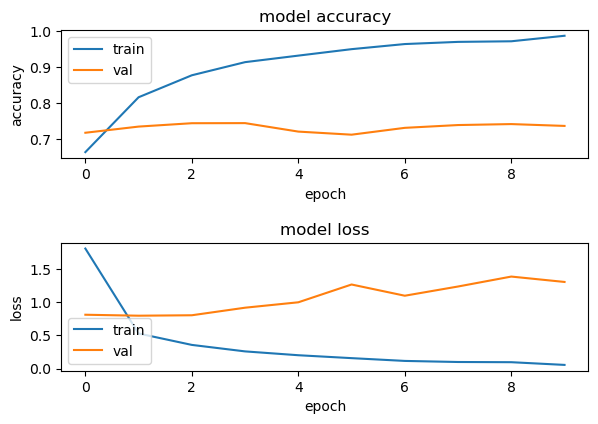

In [76]:
plot_history(history1_MN_race)

In [77]:
print("Accuracy: ", test_model(tl_model1_MN_race, test_generator_race_MN)[1])

73/73 [==============================] - 92s 1s/step - loss: 0.8548 - categorical_accuracy: 0.7169
Accuracy:  0.7169165015220642


***************************************************************************************************************************

In [78]:
tl_model2_MN_race = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_race, 
                                                  dense_layers=(512, ),
                                                  dense_kernel_regularizer=None)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential_4 (Sequential)   (None, 5)                 18877445  
                                                                 
Total params: 22,106,309
Trainable params: 18,877,445
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [79]:
history2_MN_race = train_model(train_generator_race_MN, valid_generator_race_MN, tl_model2_MN_race, 
                               es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 395s 2s/step - loss: 2.6095 - categorical_accuracy: 0.6465 - val_loss: 0.7678 - val_categorical_accuracy: 0.7377
Epoch 2/15
234/234 [==============================] - 393s 2s/step - loss: 0.5200 - categorical_accuracy: 0.8200 - val_loss: 0.7018 - val_categorical_accuracy: 0.7639
Epoch 3/15
234/234 [==============================] - 393s 2s/step - loss: 0.3246 - categorical_accuracy: 0.8963 - val_loss: 0.7459 - val_categorical_accuracy: 0.7532
Epoch 4/15
234/234 [==============================] - 392s 2s/step - loss: 0.1834 - categorical_accuracy: 0.9489 - val_loss: 0.7790 - val_categorical_accuracy: 0.7599
Epoch 5/15
234/234 [==============================] - 392s 2s/step - loss: 0.1150 - categorical_accuracy: 0.9710 - val_loss: 0.8992 - val_categorical_accuracy: 0.7567
Epoch 6/15
234/234 [==============================] - 392s 2s/step - loss: 0.0749 - categorical_accuracy: 0.9844 - val_loss: 0.9636 - val_categorical_accuracy: 0.760

In [80]:
 tl_model2_MN_race.save(" tl_model2_MN_race.h5")

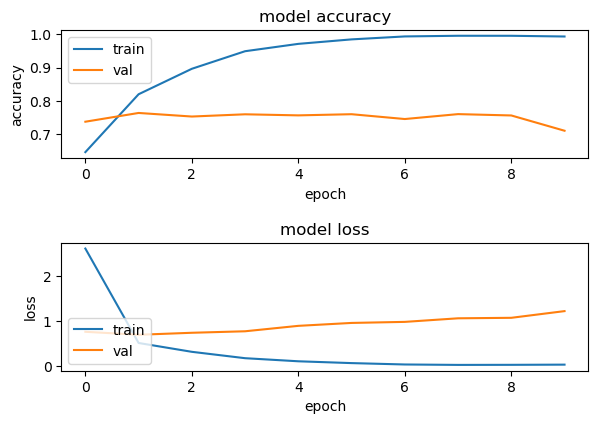

In [81]:
plot_history(history2_MN_race)

In [82]:
print("Accuracy: ", test_model(tl_model2_MN_race, test_generator_race_MN)[1])

73/73 [==============================] - 93s 1s/step - loss: 0.7289 - categorical_accuracy: 0.7460
Accuracy:  0.746038556098938


***************************************************************************************************************************

In [83]:
tl_model3_MN_race = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_race, 
                                                  dense_layers=(1024, ),
                                                  dense_kernel_regularizer=None)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential_6 (Sequential)   (None, 5)                 37754885  
                                                                 
Total params: 40,983,749
Trainable params: 37,754,885
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [84]:
history3_MN_race = train_model(train_generator_race_MN, valid_generator_race_MN, tl_model3_MN_race, 
                               es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 418s 2s/step - loss: 2.7151 - categorical_accuracy: 0.6504 - val_loss: 0.7486 - val_categorical_accuracy: 0.7412
Epoch 2/15
234/234 [==============================] - 415s 2s/step - loss: 0.4604 - categorical_accuracy: 0.8383 - val_loss: 0.7764 - val_categorical_accuracy: 0.7380
Epoch 3/15
234/234 [==============================] - 415s 2s/step - loss: 0.2689 - categorical_accuracy: 0.9119 - val_loss: 0.8362 - val_categorical_accuracy: 0.7479
Epoch 4/15
234/234 [==============================] - 415s 2s/step - loss: 0.1559 - categorical_accuracy: 0.9547 - val_loss: 0.9256 - val_categorical_accuracy: 0.7497
Epoch 5/15
234/234 [==============================] - 415s 2s/step - loss: 0.1145 - categorical_accuracy: 0.9685 - val_loss: 1.0959 - val_categorical_accuracy: 0.7554
Epoch 6/15
234/234 [==============================] - 416s 2s/step - loss: 0.0901 - categorical_accuracy: 0.9757 - val_loss: 1.1292 - val_categorical_accuracy: 0.725

In [85]:
 tl_model3_MN_race.save(" tl_model3_MN_race.h5")

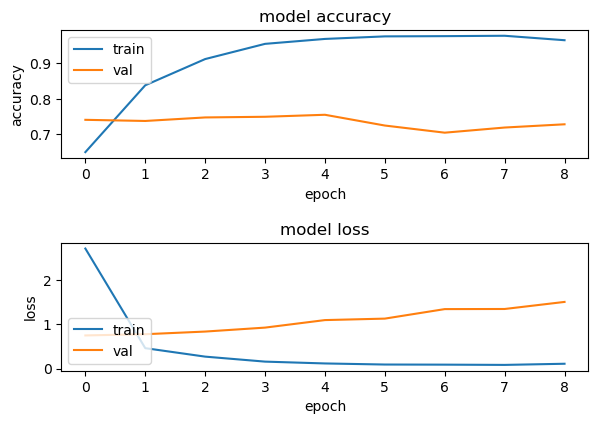

In [86]:
plot_history(history3_MN_race)

In [87]:
print("Accuracy: ", test_model(tl_model3_MN_race, test_generator_race_MN)[1])

73/73 [==============================] - 103s 1s/step - loss: 0.7924 - categorical_accuracy: 0.7306
Accuracy:  0.7306209802627563


***************************************************************************************************************************

In [70]:
tl_model4_MN_race = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_race, 
                                                  dense_layers=(1024, ),
                                                  dense_kernel_regularizer='l2',
                                                  learning_rate=1e-4)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential (Sequential)     (None, 5)                 37754885  
                                                                 
Total params: 40,983,749
Trainable params: 37,754,885
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [71]:
history4_MN_race = train_model(train_generator_race_MN, valid_generator_race_MN, tl_model4_MN_race, 
                               es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 452s 2s/step - loss: 12.7057 - categorical_accuracy: 0.6649 - val_loss: 7.6645 - val_categorical_accuracy: 0.7355
Epoch 2/15
234/234 [==============================] - 439s 2s/step - loss: 5.5902 - categorical_accuracy: 0.8104 - val_loss: 4.4195 - val_categorical_accuracy: 0.7500
Epoch 3/15
234/234 [==============================] - 435s 2s/step - loss: 3.2847 - categorical_accuracy: 0.8782 - val_loss: 3.0587 - val_categorical_accuracy: 0.7508
Epoch 4/15
234/234 [==============================] - 434s 2s/step - loss: 2.1892 - categorical_accuracy: 0.9117 - val_loss: 2.4511 - val_categorical_accuracy: 0.7313
Epoch 5/15
234/234 [==============================] - 435s 2s/step - loss: 1.5785 - categorical_accuracy: 0.9368 - val_loss: 1.9698 - val_categorical_accuracy: 0.7454
Epoch 6/15
234/234 [==============================] - 427s 2s/step - loss: 1.1961 - categorical_accuracy: 0.9498 - val_loss: 1.7562 - val_categorical_accuracy: 0.71

In [72]:
 tl_model4_MN_race.save(" tl_model4_MN_race.h5")

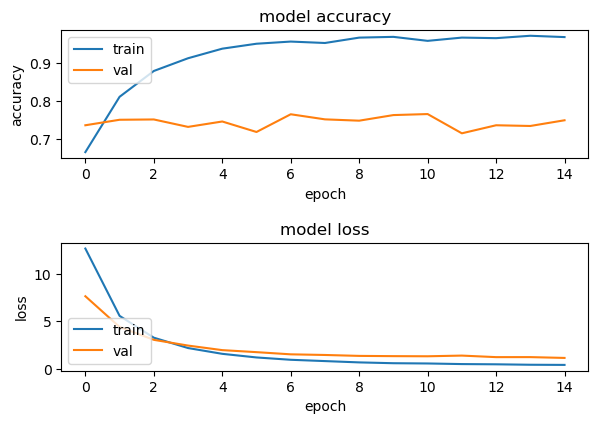

In [73]:
plot_history(history4_MN_race)

In [74]:
print("Accuracy: ", test_model(tl_model4_MN_race, test_generator_race_MN)[1])

73/73 [==============================] - 95s 1s/step - loss: 1.1539 - categorical_accuracy: 0.7490
Accuracy:  0.749036431312561


***************************************************************************************************************************

In [75]:
tl_model5_MN_race = create_transfer_learning_model(trans_model=transfer_model_MN, 
                                                  n_classes=n_classes_race, 
                                                  dense_layers=(512, ),
                                                  dense_kernel_regularizer='l2',
                                                  learning_rate=1e-4)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 6, 6, 1024)       3228864   
 nal)                                                            
                                                                 
 sequential_2 (Sequential)   (None, 5)                 18877445  
                                                                 
Total params: 22,106,309
Trainable params: 18,877,445
Non-trainable params: 3,228,864
_________________________________________________________________
None


In [76]:
history5_MN_race = train_model(train_generator_race_MN, valid_generator_race_MN, tl_model5_MN_race, 
                               es_patience=8, epochs=15)

Epoch 1/15
234/234 [==============================] - 396s 2s/step - loss: 7.3794 - categorical_accuracy: 0.6737 - val_loss: 4.9153 - val_categorical_accuracy: 0.7414
Epoch 2/15
234/234 [==============================] - 409s 2s/step - loss: 3.7150 - categorical_accuracy: 0.8159 - val_loss: 3.1374 - val_categorical_accuracy: 0.7604
Epoch 3/15
234/234 [==============================] - 408s 2s/step - loss: 2.3388 - categorical_accuracy: 0.8800 - val_loss: 2.3360 - val_categorical_accuracy: 0.7543
Epoch 4/15
234/234 [==============================] - 398s 2s/step - loss: 1.6343 - categorical_accuracy: 0.9204 - val_loss: 1.9528 - val_categorical_accuracy: 0.7449
Epoch 5/15
234/234 [==============================] - 397s 2s/step - loss: 1.2155 - categorical_accuracy: 0.9437 - val_loss: 1.6932 - val_categorical_accuracy: 0.7527
Epoch 6/15
234/234 [==============================] - 394s 2s/step - loss: 0.9635 - categorical_accuracy: 0.9556 - val_loss: 1.4606 - val_categorical_accuracy: 0.769

In [77]:
 tl_model5_MN_race.save(" tl_model5_MN_race.h5")

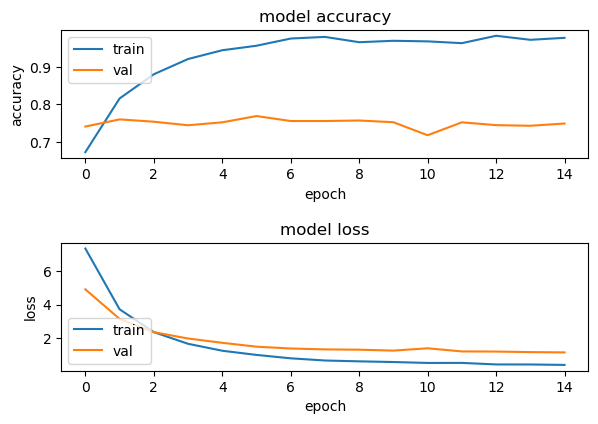

In [78]:
plot_history(history5_MN_race)

In [79]:
print("Accuracy: ", test_model(tl_model5_MN_race, test_generator_race_MN)[1])

73/73 [==============================] - 97s 1s/step - loss: 1.1375 - categorical_accuracy: 0.7518
Accuracy:  0.7518201470375061


***************************************************************************************************************************

### Results - MobileNet race

In [29]:
results_df[(results_df['category'] == 'race') & (results_df['conv_layers'] == 'MobileNet')].sort_values('Accuracy', ascending=False)

model category conv_layers Dropout BatchNormalization  \
72  tl_model5_MN_race     race   MobileNet       -               None   
71  tl_model4_MN_race     race   MobileNet       -               None   
69  tl_model2_MN_race     race   MobileNet       -               None   
70  tl_model3_MN_race     race   MobileNet       -               None   
68  tl_model1_MN_race     race   MobileNet       -               None   

   Dense layers sizes Dense kernel reg  Accuracy             Remarks  
72            (512, )               l2    0.7518  learning rate 1e-4  
71           (1024, )               l2    0.7490                 NaN  
69            (512, )             None    0.7460                 NaN  
70           (1024, )             None    0.7306                 NaN  
68            (128, )             None    0.7169                 NaN

***************************************************************************************************************************

<a id="52"></a>
### 9.2.2 VGG16 model
[back to the top](#0)

<a id="53"></a> 
### Preprocess data for transfer learning
[back to the top](#0)

In [62]:
h, w = 200, 200
batch_size = 64

#### Three Age Groups

In [63]:
train_generator_age3_VGG16, valid_generator_age3_VGG16, test_generator_age3_VGG16 = create_dataflow_from_dataframe(
                                    train_dataframe=df_train_age3,
                                    test_dataframe=df_test_age3,
                                    target_size=(h, w),
                                    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
                                    validation_split=0.2,
                                    directory="./new_data/images")

Found 14944 validated image filenames belonging to 3 classes.
Found 3736 validated image filenames belonging to 3 classes.
Found 4670 validated image filenames belonging to 3 classes.


#### Seven Age Groups

In [64]:
train_generator_age7_VGG16, valid_generator_age7_VGG16, test_generator_age7_VGG16 = create_dataflow_from_dataframe(
                                    train_dataframe=df_train_age7,
                                    test_dataframe=df_test_age7,
                                    target_size=(h, w),
                                    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
                                    validation_split=0.2,
                                    directory="./new_data/images")

Found 14944 validated image filenames belonging to 7 classes.
Found 3736 validated image filenames belonging to 7 classes.
Found 4670 validated image filenames belonging to 7 classes.


#### Eight Age Groups

In [65]:
train_generator_age8_VGG16, valid_generator_age8_VGG16, test_generator_age8_VGG16 = create_dataflow_from_dataframe(
                                    train_dataframe=df_train_age8,
                                    test_dataframe=df_test_age8,
                                    target_size=(h, w),
                                    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
                                    validation_split=0.2,
                                    directory="./new_data/images")

Found 14944 validated image filenames belonging to 8 classes.
Found 3736 validated image filenames belonging to 8 classes.
Found 4670 validated image filenames belonging to 8 classes.


#### Gender

In [66]:
train_generator_gend_VGG16, valid_generator_gend_VGG16, test_generator_gend_VGG16 = create_dataflow_from_dataframe(
                                    train_dataframe=df_train_gend,
                                    test_dataframe=df_test_gend,
                                    target_size=(h, w),
                                    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
                                    validation_split=0.2,
                                    class_mode="binary",
                                    directory="./new_data/images")

Found 14944 validated image filenames belonging to 2 classes.
Found 3736 validated image filenames belonging to 2 classes.
Found 4670 validated image filenames belonging to 2 classes.


#### Race

In [67]:
train_generator_race_VGG16, valid_generator_race_VGG16, test_generator_race_VGG16 = create_dataflow_from_dataframe(
                                    train_dataframe=df_train_race,
                                    test_dataframe=df_test_race,
                                    target_size=(h, w),
                                    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
                                    validation_split=0.2,
                                    directory="./new_data/images")

Found 14944 validated image filenames belonging to 5 classes.
Found 3736 validated image filenames belonging to 5 classes.
Found 4670 validated image filenames belonging to 5 classes.


<a id="54"></a> 
### Import VGG16 model
[back to the top](#0)

In [68]:
transfer_model_VGG16 = VGG16(weights="imagenet", 
                       include_top=None, 
                       input_shape=(200, 200, 3))
transfer_model_VGG16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [69]:
n_classes_age3 = 3
n_classes_age7 = 7
n_classes_age8 = 8
n_classes_race = 5

<a id="55"></a> 
### Three Age groups
[back to the top](#0)

In [78]:
tl_model1_vgg16_age3 = create_transfer_learning_model(trans_model=transfer_model_VGG16, 
                                                  n_classes=n_classes_age3, 
                                                  dense_layers=(1024, ),
                                                  dense_kernel_regularizer='l2')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 sequential (Sequential)     (None, 3)                 18878467  
                                                                 
Total params: 33,593,155
Trainable params: 18,878,467
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [79]:
history1_vgg16_age3 = train_model(train_generator_age3_VGG16, valid_generator_age3_VGG16, tl_model1_vgg16_age3, epochs=5)

Epoch 1/5
234/234 [==============================] - 5324s 23s/step - loss: 7.4363 - categorical_accuracy: 0.8492 - val_loss: 2.0240 - val_categorical_accuracy: 0.8745
Epoch 2/5
234/234 [==============================] - 5088s 22s/step - loss: 1.2176 - categorical_accuracy: 0.9148 - val_loss: 0.9091 - val_categorical_accuracy: 0.8873
Epoch 3/5
234/234 [==============================] - 5132s 22s/step - loss: 0.6869 - categorical_accuracy: 0.9202 - val_loss: 0.7876 - val_categorical_accuracy: 0.8820
Epoch 4/5
234/234 [==============================] - 5246s 22s/step - loss: 0.5530 - categorical_accuracy: 0.9210 - val_loss: 0.6647 - val_categorical_accuracy: 0.8822
Epoch 5/5
234/234 [==============================] - 4987s 21s/step - loss: 0.4717 - categorical_accuracy: 0.9236 - val_loss: 0.7050 - val_categorical_accuracy: 0.8678


In [80]:
 tl_model1_vgg16_age3.save(" tl_model1_vgg16_age3.h5")

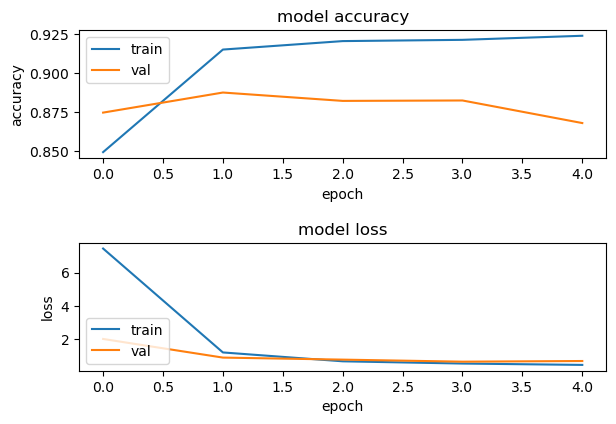

In [81]:
plot_history(history1_vgg16_age3)

In [82]:
print("Accuracy: ", test_model(tl_model1_vgg16_age3, test_generator_age3_VGG16)[1])

73/73 [==============================] - 1335s 18s/step - loss: 0.7079 - categorical_accuracy: 0.8719
Accuracy:  0.8719485998153687


<a id="56"></a> 
### Seven Age groups
[back to the top](#0)

In [79]:
tl_model1_vgg16_age7 = create_transfer_learning_model(trans_model=transfer_model_VGG16, 
                                                  n_classes=n_classes_age7, 
                                                  dense_layers=(1024, ),
                                                  dense_kernel_regularizer='l2')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 sequential_4 (Sequential)   (None, 7)                 18882567  
                                                                 
Total params: 33,597,255
Trainable params: 18,882,567
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [80]:
history1_vgg16_age7 = train_model(train_generator_age7_VGG16, valid_generator_age7_VGG16, tl_model1_vgg16_age7, epochs=5)

Epoch 1/5
234/234 [==============================] - 4410s 19s/step - loss: 9.7084 - categorical_accuracy: 0.5943 - val_loss: 3.0405 - val_categorical_accuracy: 0.6381
Epoch 2/5
234/234 [==============================] - 4397s 19s/step - loss: 2.0716 - categorical_accuracy: 0.7252 - val_loss: 1.8200 - val_categorical_accuracy: 0.6550
Epoch 3/5
234/234 [==============================] - 4642s 20s/step - loss: 1.3688 - categorical_accuracy: 0.7608 - val_loss: 1.5649 - val_categorical_accuracy: 0.6413
Epoch 4/5
234/234 [==============================] - 4625s 20s/step - loss: 1.1855 - categorical_accuracy: 0.7677 - val_loss: 1.5503 - val_categorical_accuracy: 0.6641
Epoch 5/5
234/234 [==============================] - 4647s 20s/step - loss: 1.1170 - categorical_accuracy: 0.7794 - val_loss: 1.4317 - val_categorical_accuracy: 0.6582


In [81]:
 tl_model1_vgg16_age7.save(" tl_model1_vgg16_age7.h5")

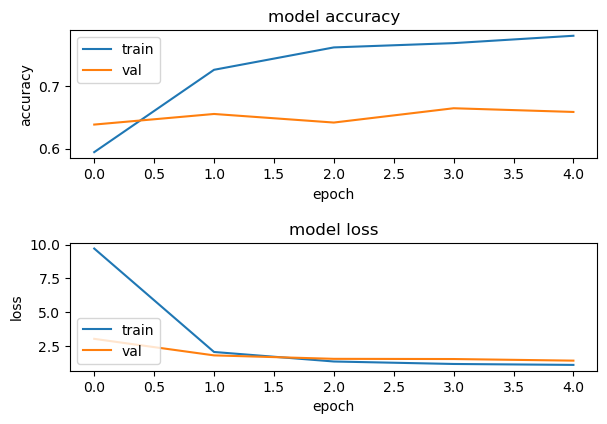

In [82]:
plot_history(history1_vgg16_age7)

In [83]:
print("Accuracy: ", test_model(tl_model1_vgg16_age7, test_generator_age7_VGG16)[1])

73/73 [==============================] - 1153s 16s/step - loss: 1.4382 - categorical_accuracy: 0.6612
Accuracy:  0.6612419486045837


<a id="57"></a> 
### Eight Age groups
[back to the top](#0)

In [77]:
tl_model1_vgg16_age8 = create_transfer_learning_model(trans_model=transfer_model_VGG16, 
                                                  n_classes=n_classes_age8, 
                                                  dense_layers=(1024, ),
                                                  dense_kernel_regularizer='l2')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 sequential_4 (Sequential)   (None, 8)                 18883592  
                                                                 
Total params: 33,598,280
Trainable params: 18,883,592
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [78]:
history1_vgg16_age8 = train_model(train_generator_age8_VGG16, valid_generator_age8_VGG16, tl_model1_vgg16_age8, epochs=5)

Epoch 1/5
234/234 [==============================] - 4360s 19s/step - loss: 8.6318 - categorical_accuracy: 0.4898 - val_loss: 3.1270 - val_categorical_accuracy: 0.5236
Epoch 2/5
234/234 [==============================] - 4388s 19s/step - loss: 2.2526 - categorical_accuracy: 0.5970 - val_loss: 2.0649 - val_categorical_accuracy: 0.5222
Epoch 3/5
234/234 [==============================] - 4390s 19s/step - loss: 1.6066 - categorical_accuracy: 0.6332 - val_loss: 1.8562 - val_categorical_accuracy: 0.5340
Epoch 4/5
234/234 [==============================] - 4374s 19s/step - loss: 1.4467 - categorical_accuracy: 0.6479 - val_loss: 1.8950 - val_categorical_accuracy: 0.5305
Epoch 5/5
234/234 [==============================] - 4390s 19s/step - loss: 1.3991 - categorical_accuracy: 0.6661 - val_loss: 2.1888 - val_categorical_accuracy: 0.5230


In [79]:
 tl_model1_vgg16_age8.save(" tl_model1_vgg16_age8.h5")

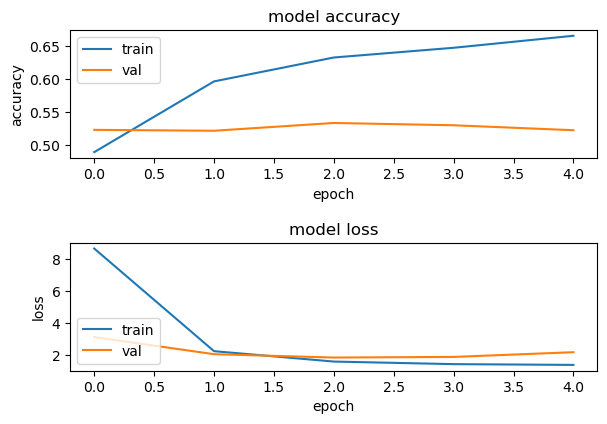

In [80]:
plot_history(history1_vgg16_age8)

In [82]:
print("Accuracy: ", test_model(tl_model1_vgg16_age8, test_generator_age8_VGG16)[1])

73/73 [==============================] - 1094s 15s/step - loss: 2.1939 - categorical_accuracy: 0.5289
Accuracy:  0.5289078950881958


<a id="58"></a> 
### Gender
[back to the top](#0)

In [84]:
tl_model1_vgg16_gender = create_transfer_learning_model(trans_model=transfer_model_VGG16, 
                                                    n_classes=1, 
                                                    dense_layers=(1024, ), 
                                                    dense_kernel_regularizer=None, 
                                                    output_fun="sigmoid", 
                                                    loss="binary_crossentropy", 
                                                    metrics=["accuracy"])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 sequential_6 (Sequential)   (None, 1)                 18876417  
                                                                 
Total params: 33,591,105
Trainable params: 18,876,417
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [85]:
history1_vgg16_gender = train_model(train_generator_gend_VGG16, valid_generator_gend_VGG16, 
                                    tl_model1_vgg16_gender, epochs=5)

Epoch 1/5
234/234 [==============================] - 4921s 21s/step - loss: 0.9511 - accuracy: 0.8542 - val_loss: 0.3340 - val_accuracy: 0.8632
Epoch 2/5
234/234 [==============================] - 4641s 20s/step - loss: 0.1832 - accuracy: 0.9233 - val_loss: 0.3412 - val_accuracy: 0.8737
Epoch 3/5
234/234 [==============================] - 4638s 20s/step - loss: 0.1075 - accuracy: 0.9578 - val_loss: 0.4212 - val_accuracy: 0.8790
Epoch 4/5
234/234 [==============================] - 4627s 20s/step - loss: 0.0683 - accuracy: 0.9771 - val_loss: 0.4543 - val_accuracy: 0.8852
Epoch 5/5
234/234 [==============================] - 5491s 23s/step - loss: 0.0490 - accuracy: 0.9847 - val_loss: 0.5501 - val_accuracy: 0.8613


In [86]:
 tl_model1_vgg16_gender.save(" tl_model1_vgg16_gender.h5")

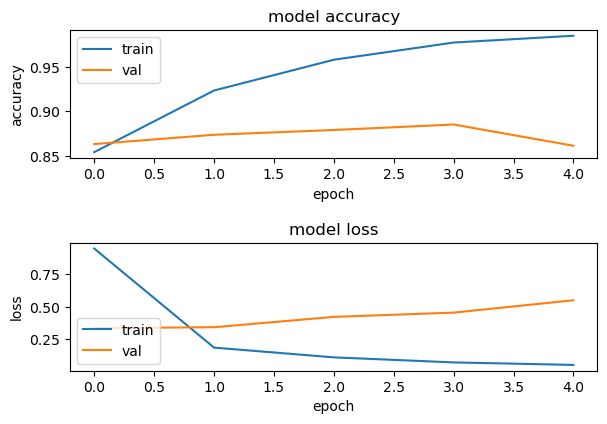

In [87]:
plot_history(history1_vgg16_gender)

In [88]:
print("Accuracy: ", test_model(tl_model1_vgg16_gender, test_generator_gend_VGG16)[1])

73/73 [==============================] - 1164s 16s/step - loss: 0.5192 - accuracy: 0.8679
Accuracy:  0.86788010597229


<a id="59"></a> 
### Race
[back to the top](#0)

In [73]:
tl_model1_vgg16_race = create_transfer_learning_model(trans_model=transfer_model_VGG16, 
                                                  n_classes=n_classes_race, 
                                                  dense_layers=(1024, ),
                                                  dense_kernel_regularizer=None)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 sequential (Sequential)     (None, 5)                 18880517  
                                                                 
Total params: 33,595,205
Trainable params: 18,880,517
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [74]:
history1_vgg16_race = train_model(train_generator_race_VGG16, valid_generator_race_VGG16, tl_model1_vgg16_race, epochs=5)

Epoch 1/5
234/234 [==============================] - 4329s 19s/step - loss: 4.0202 - categorical_accuracy: 0.6273 - val_loss: 0.8115 - val_categorical_accuracy: 0.7190
Epoch 2/5
234/234 [==============================] - 4319s 18s/step - loss: 0.6140 - categorical_accuracy: 0.7919 - val_loss: 0.8136 - val_categorical_accuracy: 0.7307
Epoch 3/5
234/234 [==============================] - 4333s 19s/step - loss: 0.4251 - categorical_accuracy: 0.8542 - val_loss: 0.8830 - val_categorical_accuracy: 0.7149
Epoch 4/5
234/234 [==============================] - 4340s 19s/step - loss: 0.2885 - categorical_accuracy: 0.9065 - val_loss: 1.0196 - val_categorical_accuracy: 0.7117
Epoch 5/5
234/234 [==============================] - 4377s 19s/step - loss: 0.2046 - categorical_accuracy: 0.9340 - val_loss: 1.1852 - val_categorical_accuracy: 0.7024


In [75]:
 tl_model1_vgg16_race.save(" tl_model1_vgg16_race.h5")

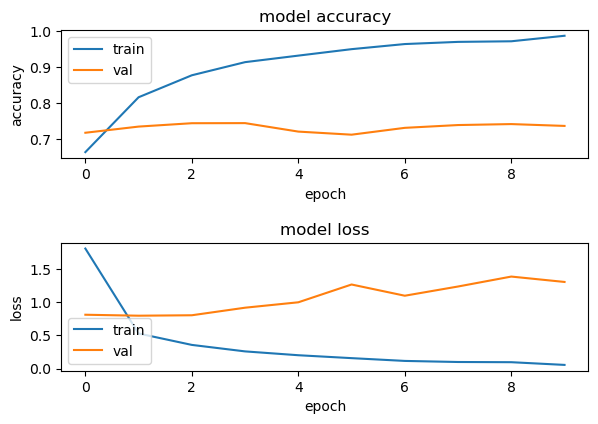

In [76]:
plot_history(history1_vgg16_race)

In [77]:
print("Accuracy: ", test_model(tl_model1_vgg16_race, test_generator_race_VGG16)[1])

73/73 [==============================] - 92s 1s/step - loss: 0.8548 - categorical_accuracy: 0.7169
Accuracy:  0.7169165015220642


<a id="45"></a> 
# 10. Results
[back to the top](#0)

In [40]:
results_df = pd.read_excel('results.xlsx')

<a id="46"></a> 
## 10.1 Three age groups
[back to the top](#0)

In [41]:
results_df_age3 = results_df[results_df['category'] == 'age3'].sort_values('Accuracy', ascending=False)

In [42]:
results_df_age3

model category               conv_layers Dropout  \
26     tuned_model2_age3     age3  (16, 3) (80, 3) (112, 3)     0.3   
3            model4_age3     age3  (32, 3) (64, 3) (128, 3)    0.25   
25     tuned_model1_age3     age3  (16, 3) (80, 3) (112, 3)       0   
4            model5_age3     age3   (64, 3) (32, 3) (16, 3)    0.25   
51     tl_model7_MN_age3     age3                 MobileNet       -   
46     tl_model2_MN_age3     age3                 MobileNet       -   
45     tl_model1_MN_age3     age3                 MobileNet       -   
2            model3_age3     age3  (32, 3) (64, 3) (128, 3)       0   
28     tuned_model4_age3     age3  (16, 3) (80, 3) (112, 3)     0.3   
1            model2_age3     age3   (64, 3) (32, 3) (16, 3)       0   
27     tuned_model3_age3     age3  (16, 3) (80, 3) (112, 3)     0.3   
48     tl_model4_MN_age3     age3                 MobileNet       -   
47     tl_model3_MN_age3     age3                 MobileNet       -   
50     tl_model6_MN_age3     age3                 MobileNet       -   
49     tl_model5_MN_age3     age3                 MobileNet       -   
0            model1_age3     age3           (32, 3) (16, 3)       0   
73  tl_model1_vgg16_age3     age3                     VGG16       -   

   BatchNormalization Dense layers sizes Dense kernel reg  Accuracy Remarks  
26               None             (64, )             None    0.9043     NaN  
3                None             (24, )             None    0.9006     NaN  
25               None             (64, )             None    0.8997     NaN  
4                None             (24, )             None    0.8972     NaN  
51               None            (512, )               l2    0.8951     NaN  
46               None            (128, )             None    0.8949     NaN  
45               None            (128, )               l2    0.8929     NaN  
2                None             (24, )             None    0.8910     NaN  
28               True             (64, )               l2    0.8882     NaN  
1                None             (24, )             None    0.8869     NaN  
27               None             (64, )               l2    0.8859     NaN  
48               None            (32,  )             None    0.8856     NaN  
47               None         (128, 64 )             None    0.8839     NaN  
50               None            (512, )             None    0.8809     NaN  
49               None         (128, 32 )               l2    0.8775     NaN  
0                None             (24, )             None    0.8766     NaN  
73               None           (1024, )               l2    0.8719     NaN

<a id="47"></a> 
## 10.2 Seven age groups
[back to the top](#0)

In [43]:
results_df_age7 = results_df[results_df['category'] == 'age7'].sort_values('Accuracy', ascending=False)

In [44]:
results_df_age7

model category               conv_layers Dropout  \
31     tuned_model3_age7     age7   (48, 3) (80, 3) (96, 3)     0.2   
57     tl_model6_MN_age7     age7                 MobileNet       -   
29     tuned_model1_age7     age7   (48, 3) (80, 3) (96, 3)       0   
8            model4_age7     age7  (32, 3) (64, 3) (128, 3)    0.25   
7            model3_age7     age7   (64, 3) (32, 3) (16, 3)       0   
6            model2_age7     age7  (32, 3) (64, 3) (128, 3)       0   
55     tl_model4_MN_age7     age7                 MobileNet       -   
32     tuned_model4_age7     age7   (48, 3) (80, 3) (96, 3)     0.2   
56     tl_model5_MN_age7     age7                 MobileNet       -   
9            model5_age7     age7   (64, 3) (32, 3) (16, 3)    0.25   
30     tuned_model2_age7     age7   (48, 3) (80, 3) (96, 3)       0   
74  tl_model1_vgg16_age7     age7                     VGG16       -   
52     tl_model1_MN_age7     age7                 MobileNet       -   
53     tl_model2_MN_age7     age7                 MobileNet       -   
5            model1_age7     age7           (32, 3) (64, 3)       0   
54     tl_model3_MN_age7     age7                 MobileNet       -   

   BatchNormalization Dense layers sizes Dense kernel reg  Accuracy Remarks  
31               None             (64, )             None    0.6919     NaN  
57               None           (512,  )               l2    0.6876     NaN  
29               None             (64, )             None    0.6875     NaN  
8                None             (24, )             None    0.6846     NaN  
7                None             (24, )             None    0.6792     NaN  
6                None             (24, )             None    0.6773     NaN  
55               None           (256,  )             None    0.6749     NaN  
32               None             (64, )               l2    0.6732     NaN  
56               None           (512,  )             None    0.6728     NaN  
9                None             (24, )             None    0.6726     NaN  
30               None             (64, )               l2    0.6694     NaN  
74               None           (1024, )               l2    0.6612     NaN  
52               None            (128, )             None    0.6589     NaN  
53               None         (128, 64 )             None    0.6460     NaN  
5                None             (24, )             None    0.6456     NaN  
54               None            (64,  )             None    0.6158     NaN

<a id="48"></a> 
## 10.3 Eight age groups
[back to the top](#0)

In [45]:
results_df_age8 = results_df[results_df['category'] == 'age8'].sort_values('Accuracy', ascending=False)

In [46]:
results_df_age8

model category               conv_layers Dropout  \
14           model5_age8     age8   (64, 3) (32, 3) (16, 3)    0.25   
33     tuned_model1_age8     age8  (48, 3) (96, 3) (160, 3)       0   
62     tl_model5_MN_age8     age8                 MobileNet       -   
34     tuned_model2_age8     age8  (48, 3) (96, 3) (160, 3)       0   
11           model1_age8     age8  (32, 3) (64, 3) (128, 3)       0   
61     tl_model4_MN_age8     age8                 MobileNet       -   
12           model3_age8     age8   (64, 3) (32, 3) (16, 3)       0   
63     tl_model6_MN_age8     age8                 MobileNet       -   
59     tl_model2_MN_age8     age8                 MobileNet       -   
60     tl_model3_MN_age8     age8                 MobileNet       -   
13           model4_age8     age8  (32, 3) (64, 3) (128, 3)    0.25   
35     tuned_model3_age8     age8  (48, 3) (96, 3) (160, 3)    0.25   
36     tuned_model4_age8     age8  (48, 3) (96, 3) (160, 3)    0.25   
10           model2_age8     age8           (32, 3) (64, 3)       0   
75  tl_model1_vgg16_age8     age8                     VGG16       -   
58     tl_model1_MN_age8     age8                 MobileNet       -   

   BatchNormalization Dense layers sizes Dense kernel reg  Accuracy  \
14               None             (24, )             None    0.5704   
33               None            (128, )             None    0.5694   
62               None           (1024, )               l2    0.5647   
34               None            (128, )               l2    0.5602   
11               None             (24, )             None    0.5587   
61               None           (1024, )             None    0.5555   
12               None             (24, )             None    0.5510   
63               None           (1024, )               l2    0.5501   
59               None            (256, )             None    0.5456   
60               None            (512, )             None    0.5452   
13               None             (24, )             None    0.5450   
35               None            (128, )             None    0.5428   
36               None            (128, )               l2    0.5334   
10               None             (24, )             None    0.5298   
75               None           (1024, )               l2    0.5289   
58               None            (128, )             None    0.4844   

               Remarks  
14                 NaN  
33                 NaN  
62                 NaN  
34                 NaN  
11                 NaN  
61                 NaN  
12                 NaN  
63  learning rate 1e-5  
59                 NaN  
60                 NaN  
13                 NaN  
35                 NaN  
36                 NaN  
10                 NaN  
75                 NaN  
58                 NaN

<a id="49"></a> 
## 10.4 Gender
[back to the top](#0)

In [36]:
results_df_gender = results_df[results_df['category'] == 'gender'].sort_values('Accuracy', ascending=False)

In [37]:
results_df_gender

model category                conv_layers Dropout  \
37     tuned_model1_gender   gender  (32, 3) (112, 3) (112, 3)       0   
64     tl_model1_MN_gender   gender                  MobileNet       -   
16           model2_gender   gender   (32, 3) (64, 3) (128, 3)       0   
66     tl_model3_MN_gender   gender                  MobileNet       -   
39     tuned_model3_gender   gender  (32, 3) (112, 3) (112, 3)    0.25   
40     tuned_model4_gender   gender  (32, 3) (112, 3) (112, 3)    0.25   
19           model5_gender   gender    (64, 3) (32, 3) (16, 3)    0.25   
15           model1_gender   gender            (32, 3) (64, 3)       0   
65     tl_model2_MN_gender   gender                  MobileNet       -   
18           model4_gender   gender   (32, 3) (64, 3) (128, 3)    0.25   
17           model3_gender   gender    (64, 3) (32, 3) (16, 3)       0   
38     tuned_model2_gender   gender  (32, 3) (112, 3) (112, 3)       0   
67     tl_model4_MN_gender   gender                  MobileNet       -   
76  tl_model1_vgg16_gender   gender                      VGG16       -   

   BatchNormalization Dense layers sizes Dense kernel reg  Accuracy Remarks  
37               None             (64, )             None    0.8978     NaN  
64               None            (128, )             None    0.8934     NaN  
16               None             (24, )             None    0.8910     NaN  
66               None           (1024, )             None    0.8863     NaN  
39               None             (64, )             None    0.8854     NaN  
40               None             (64, )               l2    0.8854     NaN  
19               None             (24, )             None    0.8818     NaN  
15               None             (24, )             None    0.8809     NaN  
65               None            (512, )             None    0.8788     NaN  
18               None             (24, )             None    0.8758     NaN  
17               None             (24, )             None    0.8741     NaN  
38               None             (64, )               l2    0.8737     NaN  
67               None            (128, )               l2    0.8737     NaN  
76               None           (1024, )             None    0.8679     NaN

<a id="50"></a> 
## 10.5 Race
[back to the top](#0)

In [38]:
results_df_race = results_df[results_df['category'] == 'race'].sort_values('Accuracy', ascending=False)

In [39]:
results_df_race

model category               conv_layers Dropout  \
41     tuned_model1_race     race  (16, 3) (16, 3) (128, 3)       0   
42     tuned_model2_race     race  (16, 3) (16, 3) (128, 3)       0   
21           model2_race     race  (32, 3) (64, 3) (128, 3)       0   
22           model3_race     race   (64, 3) (32, 3) (16, 3)       0   
23           model4_race     race  (32, 3) (64, 3) (128, 3)    0.25   
44     tuned_model4_race     race  (16, 3) (16, 3) (128, 3)    0.25   
20           model1_race     race           (32, 3) (64, 3)       0   
24           model5_race     race   (64, 3) (32, 3) (16, 3)    0.25   
72     tl_model5_MN_race     race                 MobileNet       -   
71     tl_model4_MN_race     race                 MobileNet       -   
69     tl_model2_MN_race     race                 MobileNet       -   
43     tuned_model3_race     race  (16, 3) (16, 3) (128, 3)    0.25   
70     tl_model3_MN_race     race                 MobileNet       -   
68     tl_model1_MN_race     race                 MobileNet       -   
77  tl_model1_vgg16_race     race                     VGG16       -   

   BatchNormalization Dense layers sizes Dense kernel reg  Accuracy  \
41               None             (32, )             None    0.7777   
42               None             (32, )               l2    0.7751   
21               None             (24, )             None    0.7739   
22               None             (24, )             None    0.7709   
23               None             (24, )             None    0.7694   
44               None             (32, )               l2    0.7694   
20               None             (24, )             None    0.7638   
24               None             (24, )             None    0.7606   
72               None            (512, )               l2    0.7518   
71               None           (1024, )               l2    0.7490   
69               None            (512, )             None    0.7460   
43               None             (32, )             None    0.7445   
70               None           (1024, )             None    0.7306   
68               None            (128, )             None    0.7169   
77               None           (1024, )             None    0.7169   

               Remarks  
41                 NaN  
42                 NaN  
21                 NaN  
22                 NaN  
23                 NaN  
44                 NaN  
20                 NaN  
24                 NaN  
72  learning rate 1e-4  
71                 NaN  
69                 NaN  
43                 NaN  
70                 NaN  
68                 NaN  
77                 NaN

<a id="51"></a> 
# 11. Streamlit app
[back to the top](#0)

I created simple app using Streamlit that can load the face image and recognize age group, gender and race.

Open app:
1) open command prompt and move to folder containing app
2) install requirements using "pip install -r requirements.txt" command
2) run "streamlit run app.py" command
3) app will open in your default browser

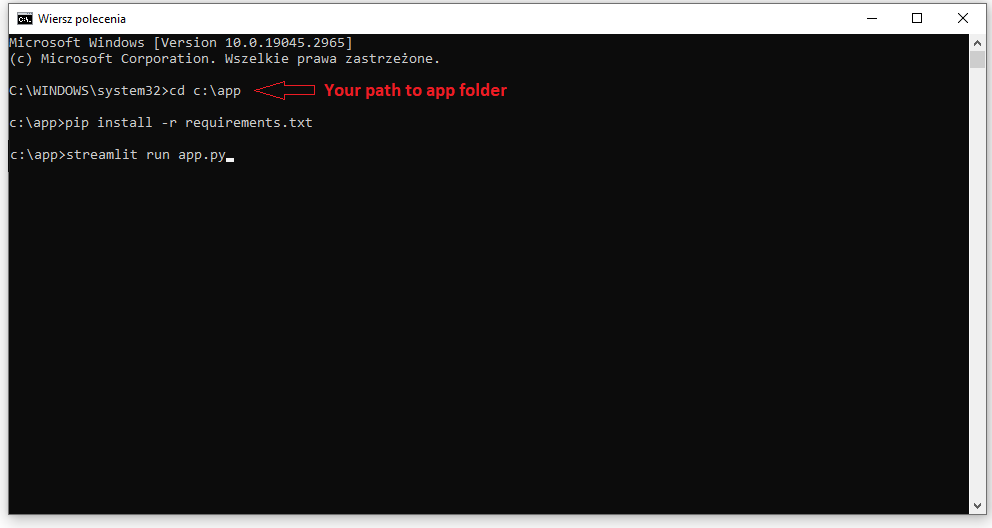

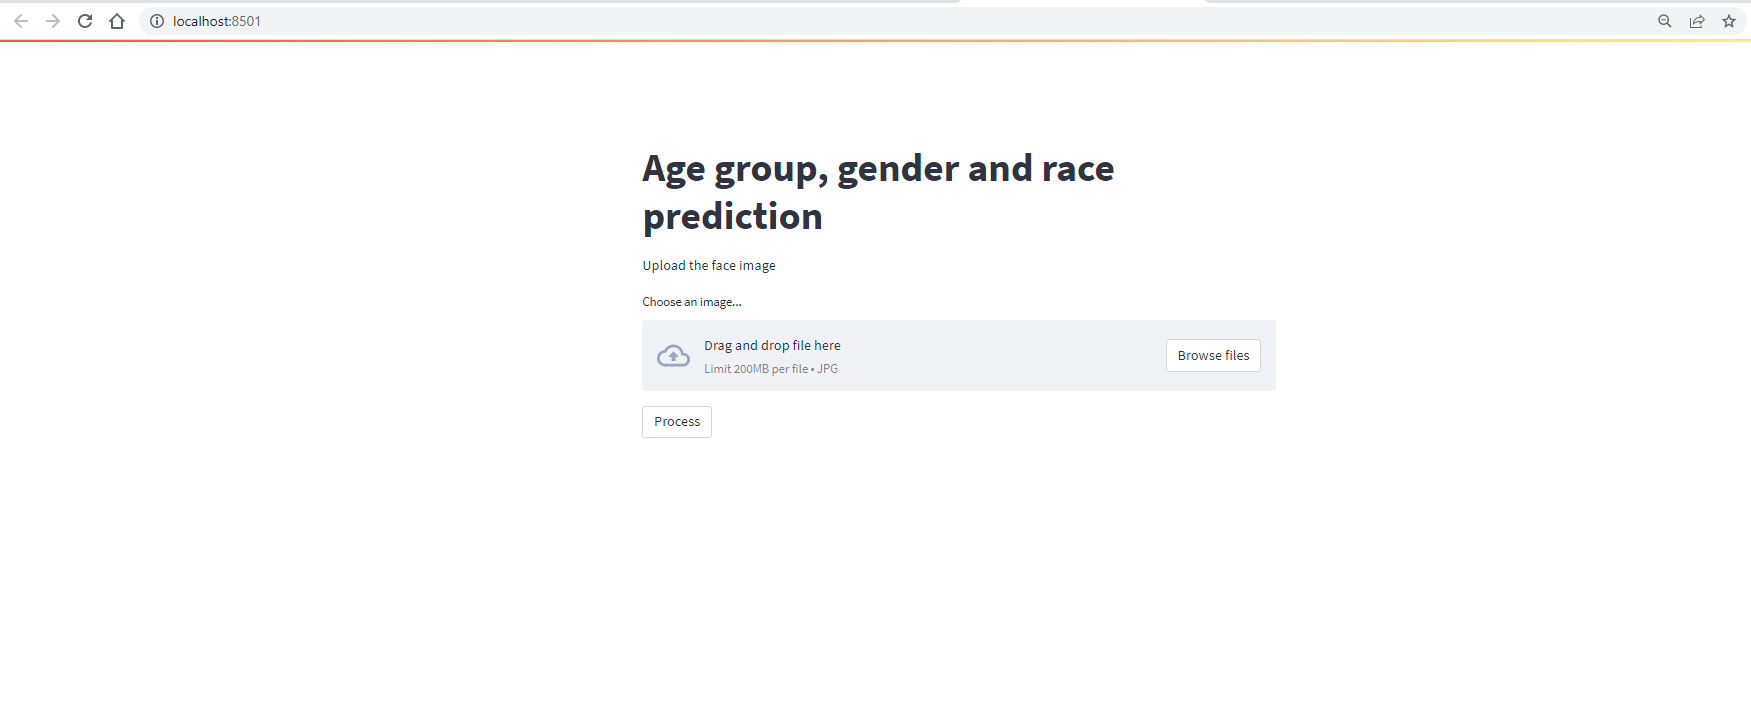

Choose face image from your disk

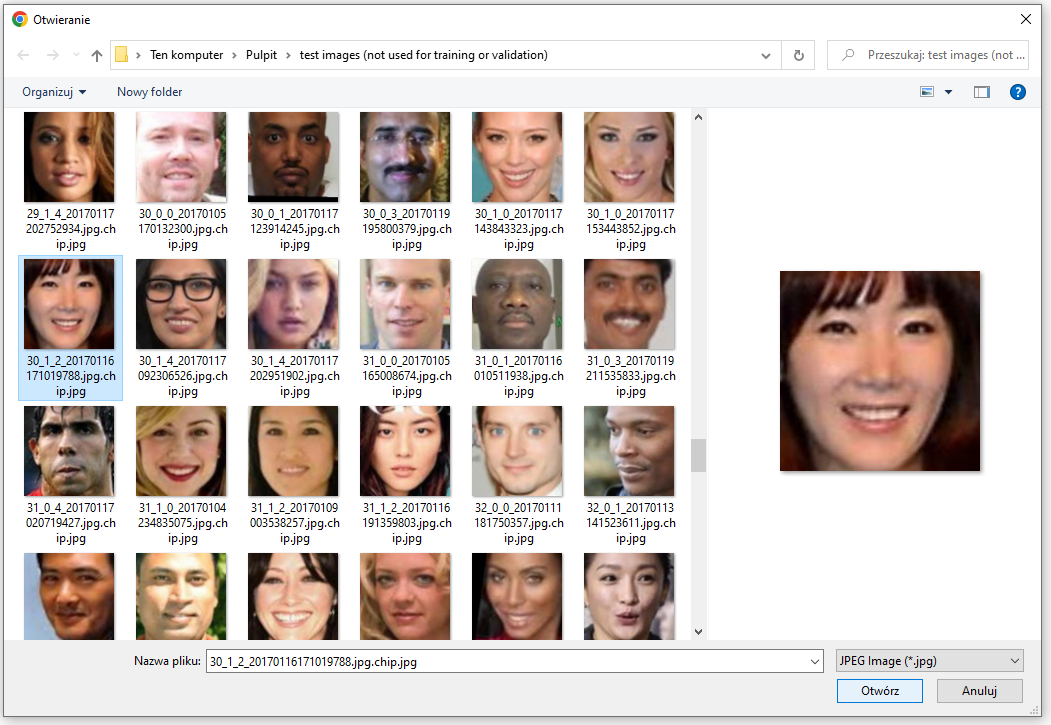

Click "Process" button to show the image and see the results:

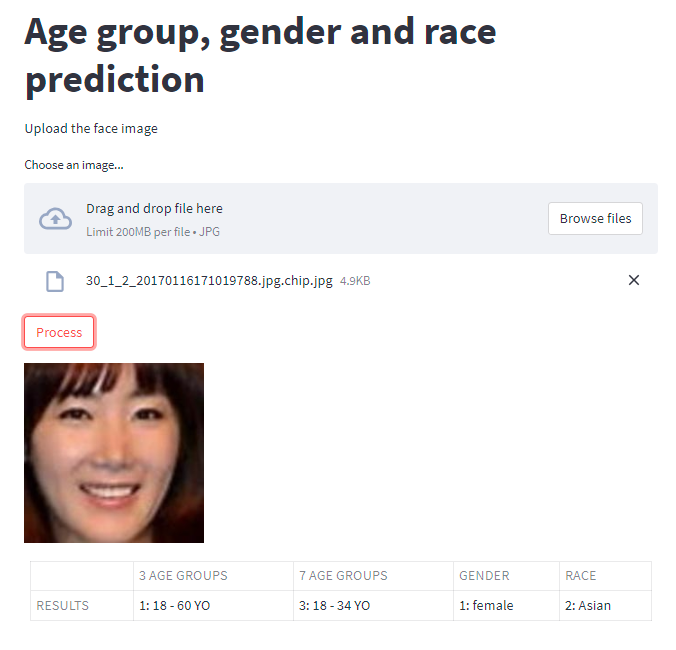